In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast, re, unicodedata
import pandas as pd
import scipy.stats as stats

In [119]:
def readDataframe(csv_file):
    df = pd.read_csv(csv_file)
    try:
        df.drop(columns=['Unnamed: 0'],inplace=True)
    except:
        pass

    for column in df.columns:
        def safe_literal_eval(x):
            if isinstance(x, str) and pd.notna(x):
                try:    
                    return ast.literal_eval(x) if pd.notna(x) else x
                except (ValueError, SyntaxError):
                    return x  # Return empty list for problematic entries
            return x  # Return empty list for None or non-string entries
        df[column] = df[column].apply(safe_literal_eval)
    return df

In [120]:
labeled_sample = readDataframe('../../Data/labeled_sample.csv')
labeled_sample

Main Video Details Main Video ID  \
0     {'Url': 'https://www.youtube.com/watch?v=5qbXf...   5qbXfXgYE9A   
1     {'Url': 'https://www.youtube.com/watch?v=Bus61...   Bus61F7HX-0   
2     {'Url': 'https://www.youtube.com/watch?v=h-bRc...   h-bRcxyd-Pw   
3     {'Url': 'https://www.youtube.com/watch?v=3NPbQ...   3NPbQVkG6ro   
4     {'Url': 'https://www.youtube.com/watch?v=iw37d...   iw37dCwQCzs   
...                                                 ...           ...   
5606  {'Url': 'https://www.youtube.com/watch?v=oPL2O...   oPL2O9nTi5o   
5607  {'Url': 'https://www.youtube.com/watch?v=UifW2...   UifW2vcjmc4   
5608  {'Url': 'https://www.youtube.com/watch?v=WGCKP...   WGCKPZ-JaVM   
5609  {'Url': 'https://www.youtube.com/watch?v=9CLGK...   9CLGKkmLyBc   
5610  {'Url': 'https://www.youtube.com/watch?v=Cobdl...   CobdlUmEj7k   

      Country                                          Video Ads        Ad ID  \
0     Algeria  {'ad_id': 'nRdXPJcvf2M ', 'Count': 1, 'Skippab...  nRdXPJcvf2M   
1     Algeria  {'ad_id': 'TuDtCzL99GY ', 'Count': 1, 'Skippab...  TuDtCzL99GY   
2     Algeria  {'ad_id': 'vGmQrRVEvJ8 ', 'Count': 1, 'Skippab...  vGmQrRVEvJ8   
3     Algeria  {'ad_id': '71t7O89Bjw8 ', 'Count': 1, 'Skippab...  71t7O89Bjw8   
4     Algeria  {'ad_id': 'b7C4HWjfBFM ', 'Count': 1, 'Skippab...  b7C4HWjfBFM   
...       ...                                                ...          ...   
5606  Vietnam  {'ad_id': 'gsdmVlFze9E ', 'Count': 1, 'Skippab...  gsdmVlFze9E   
5607  Vietnam  {'ad_id': 'g-sIEhjy4W4 ', 'Count': 1, 'Skippab...  g-sIEhjy4W4   
5608  Vietnam  {'ad_id': '8o8Qre5Trf0 ', 'Count': 1, 'Skippab...  8o8Qre5Trf0   
5609  Vietnam  {'ad_id': 'ciajaKOUbWQ ', 'Count': 1, 'Skippab...  ciajaKOUbWQ   
5610  Vietnam  {'ad_id': 'UUmWBFGC3TA ', 'Count': 1, 'Skippab...  UUmWBFGC3TA   

      Skippable SkipDuration                Advertiser Name  \
0             1         3:26            EVO ALU & STEEL LTD   
1             1         3:53     Latisol Production FZE-LLC   
2             1         3:23                     CHBK MUSIC   
3             1         4:59                     Arama S.A.   
4             1         5:29           Manabí Organic Foods   
...         ...          ...                            ...   
5606          1         2:50             ATV MEDIA CO., LTD   
5607          1        50:47                      (주)디엠씨미디어   
5608          1         0:30  Công ty Cổ phần Giấy Hải Tiến   
5609          1         3:48    CÔNG TY TNHH I-DAC VIỆT NAM   
5610          1         1:00          PROFOTOCLASS CO., LTD   

       Advertiser Location  Verified  ad_id_clean main_id_clean  \
0                Mauritius     False  nRdXPJcvf2M   5qbXfXgYE9A   
1     United Arab Emirates     False  TuDtCzL99GY   Bus61F7HX-0   
2                  Lebanon      True  vGmQrRVEvJ8   h-bRcxyd-Pw   
3                  Ecuador     False  71t7O89Bjw8   3NPbQVkG6ro   
4                  Ecuador      True  b7C4HWjfBFM   iw37dCwQCzs   
...                    ...       ...          ...           ...   
5606               Vietnam      True  gsdmVlFze9E   oPL2O9nTi5o   
5607           South Korea      True  g-sIEhjy4W4   UifW2vcjmc4   
5608               Vietnam      True  8o8Qre5Trf0   WGCKPZ-JaVM   
5609               Vietnam      True  ciajaKOUbWQ   9CLGKkmLyBc   
5610              Thailand      True  UUmWBFGC3TA   CobdlUmEj7k   

         primary_tag          secondary_tag  
0      Inappropriate     Suggestive Content  
1      Inappropriate    Sexual and Romantic  
2      Inappropriate    Sexual and Romantic  
3      Inappropriate    Sexual and Romantic  
4      Inappropriate    Sexual and Romantic  
...              ...                    ...  
5606   Inappropriate    Sexual and Romantic  
5607       Ambiguous    Age-sensitive media  
5608  Child-directed  DIY & Arts and Crafts  
5609      Irrelevant    Music & Performance  
5610      Irrelevant              Machinery  

[5611 rows x 14 columns]

In [121]:
labeled_sample['Country'].value_counts()

Country
Algeria          200
Lebanon          200
United States    200
UAE              200
Turkey           200
Sweden           200
Spain            200
South Korea      200
Singapore        200
Netherlands      200
Morocco          200
Austria          200
Lithuania        200
Mexico           200
Latvia           200
Jordan           200
Ireland          200
Ghana            200
Germany          200
France           200
Estonia          200
Bulgaria         200
Belgium          200
Bahrain          200
Vietnam          200
Senegal          196
Bangladesh       136
Taiwan           110
Sri Lanka        102
Pakistan          67
Name: count, dtype: int64

In [122]:
labeled_sample['primary_tag'].value_counts()

primary_tag
Irrelevant        3236
Inappropriate     1659
Child-directed     527
Ambiguous          189
Name: count, dtype: int64

In [123]:
labeled_sample[labeled_sample['primary_tag']=='Ambiguous']['Ad ID'].nunique() ## unique ads removed

74

In [124]:
labeled_sample = labeled_sample[labeled_sample['primary_tag']!='Ambiguous']
labeled_sample['Country'].value_counts()

Country
Ghana            200
Latvia           200
UAE              200
Sweden           200
United States    200
France           199
Bahrain          199
Austria          199
Lithuania        198
Estonia          197
Turkey           197
Ireland          197
Singapore        197
Morocco          196
Mexico           196
Belgium          195
Bulgaria         195
Germany          194
Jordan           193
Netherlands      193
South Korea      193
Spain            192
Vietnam          182
Algeria          179
Lebanon          178
Senegal          163
Bangladesh       134
Sri Lanka        100
Taiwan            95
Pakistan          61
Name: count, dtype: int64

In [125]:
labeled_sample

quartile_A = ['Singapore', 'Taiwan', 'South Korea', 'Germany', 'Spain', 'Canada', 'Sweden', 'United States']
quartile_B = ['UAE', 'France', 'Belgium', 'Vietnam', 'Ireland', 'Mexico', 'Turkey', 'Pakistan']
quartile_C = ['Bahrain', 'Lebanon', 'Lithuania', 'Latvia', 'Netherlands', 'Austria', 'Estonia', 'Morocco']
quartile_D = ['Bulgaria', 'Algeria', 'Jordan', 'Sri Lanka', 'Bangladesh', 'Senegal', 'Ghana', 'Mozambique']

quartile_map = {}
for c in quartile_A: quartile_map[c] = 'A'
for c in quartile_B: quartile_map[c] = 'B'
for c in quartile_C: quartile_map[c] = 'C'
for c in quartile_D: quartile_map[c] = 'D'

labeled_sample['Quartile'] = labeled_sample['Country'].map(quartile_map)
quartiles = [quartile_A, quartile_B, quartile_C, quartile_D]

df = labeled_sample.copy()

/tmp/ipykernel_140585/677294344.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_sample['Quartile'] = labeled_sample['Country'].map(quartile_map)


### Video Verification

In [126]:
inappropriate_ads = df[df['primary_tag'].isin(['Inappropriate'])]
df['is_inappropriate'] = (df['primary_tag'] == 'Inappropriate').astype(int)
proportions = df.groupby('Verified')['is_inappropriate'].mean()
print(proportions)

## At the ad level
contingency = pd.crosstab(df['Verified'], df['is_inappropriate'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-squared:", chi2)
print("p-value:", p)


### At the ad level

advertiser_level = df.groupby('Advertiser Name').agg({
    'Verified': 'first',   # assuming same status for all ads
    'is_inappropriate': 'max'    # 1 if advertiser had at least one inappropriate ad
}).reset_index()
advertiser_level['Verified'] = advertiser_level['Verified'].astype(bool)


# Compare proportions at advertiser level
proportions = advertiser_level.groupby('Verified')['is_inappropriate'].mean()
print(proportions)
contingency = pd.crosstab(advertiser_level['Verified'], advertiser_level['is_inappropriate'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("Chi-squared:", chi2, "p-value:", p)



Verified
False    0.352624
True     0.298568
Name: is_inappropriate, dtype: float64
Chi-squared: 8.570261064886887
p-value: 0.0034169815722908956
Verified
False    0.533898
True     0.312950
Name: is_inappropriate, dtype: float64
Chi-squared: 42.61080307681859 p-value: 6.678948869646647e-11


Verification and Inappropriate ads across regions

In [127]:
df[(df['Advertiser Location'].isin(['Lebanon','Ecuador'])) & (df['primary_tag']=='Inappropriate')]['Verified'].value_counts(normalize=True)

Verified
True     0.847938
False    0.152062
Name: proportion, dtype: float64

In [128]:
import pandas as pd
import scipy.stats as stats

ad_results = []

for q, group in df.groupby('Quartile'):
    contingency = pd.crosstab(group['Verified'], group['is_inappropriate'])
    chi2, p, _, _ = stats.chi2_contingency(contingency)

    proportions = group.groupby('Verified')['is_inappropriate'].mean().to_dict()
    ad_results.append({
        'Quartile': q,
        'Verified Prop': proportions.get(True, float('nan')),
        'Unverified Prop': proportions.get(False, float('nan')),
        'Chi2': chi2,
        'p-value': p
    })

ad_results_df = pd.DataFrame(ad_results)
print(ad_results_df)


  Quartile  Verified Prop  Unverified Prop      Chi2   p-value
0        A       0.152626         0.152672  0.000000  1.000000
1        B       0.225624         0.301075  4.704768  0.030079
2        C       0.305096         0.407407  4.435497  0.035199
3        D       0.532242         0.652406  8.683636  0.003211


--- Increased Rate of Inappropriate Ads from Unverified Advertisers Across Quartiles---
          Difference  CI_95_Margin
Quartile                          
A           0.000045      0.041024
B           0.075451      0.058672
C           0.102311      0.080276
D           0.120165      0.063017




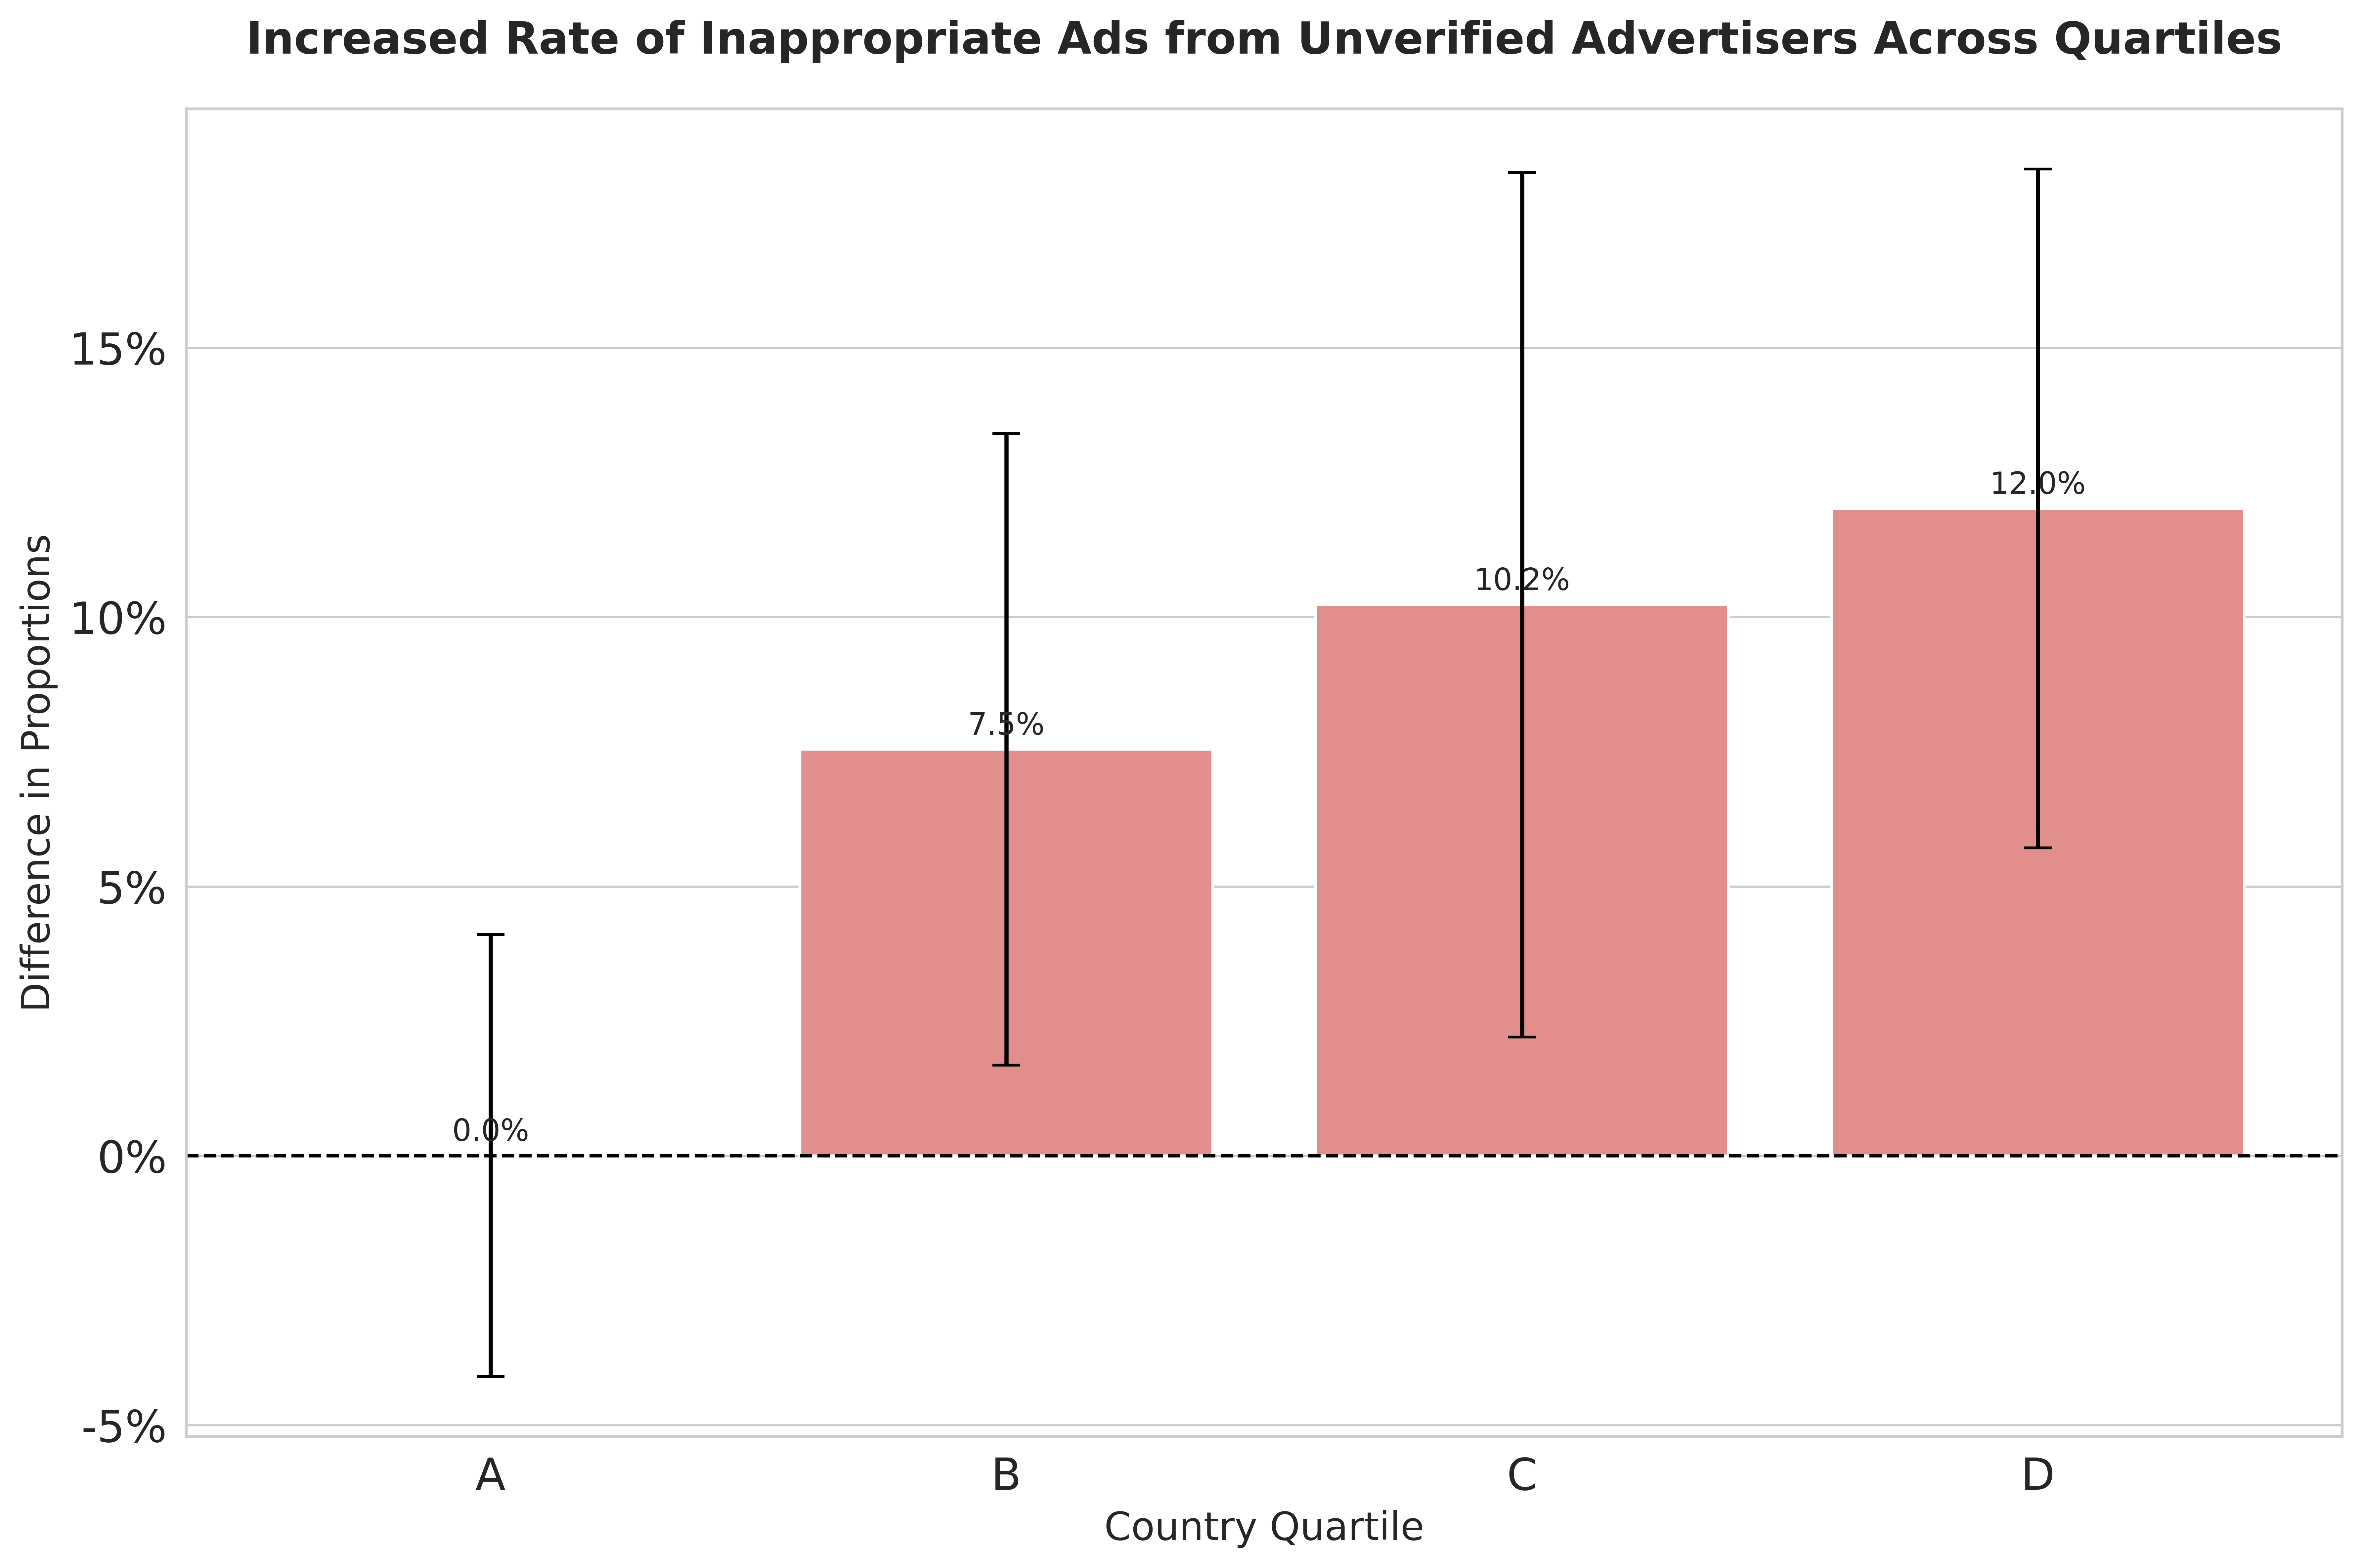

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


summary_counts = df.groupby(['Quartile', 'Verified'])['is_inappropriate'].agg(
    inappropriate_count='sum',
    total_ads='count'
).reset_index()


pivot_df = summary_counts.pivot(index='Quartile', columns='Verified').fillna(0)

# Calculate the proportion for each group
prop_unverified = pivot_df[('inappropriate_count', False)] / pivot_df[('total_ads', False)]
prop_verified = pivot_df[('inappropriate_count', True)] / pivot_df[('total_ads', True)]

# Create the final DataFrame for plotting the difference
diff_df = pd.DataFrame(index=pivot_df.index)
diff_df['Difference'] = prop_unverified - prop_verified

# --- Step 3: Calculate the 95% Confidence Interval for the Difference ---
# Formula for the Standard Error of a difference of proportions:
# SE = sqrt( p1(1-p1)/n1 + p2(1-p2)/n2 )
se_diff = np.sqrt(
    (prop_unverified * (1 - prop_unverified) / pivot_df[('total_ads', False)]) +
    (prop_verified * (1 - prop_verified) / pivot_df[('total_ads', True)])
)

# The margin of error is 1.96 (for 95% CI) times the Standard Error
diff_df['CI_95_Margin'] = 1.645 * se_diff
diff_df = diff_df.fillna(0) # Handle any quartiles that might be missing a group

print("--- Increased Rate of Inappropriate Ads from Unverified Advertisers Across Quartiles---")
print(diff_df)
print("\n" + "="*50 + "\n")


# --- Step 4: Visualize the Difference ---
quartile_order = ['A', 'B', 'C', 'D']
diff_df = diff_df.reindex(quartile_order)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(
    x=diff_df.index,
    y=diff_df['Difference'],
    color='#f0807f' # A single color to represent the "risk difference"
)

# Add the 95% CI error bars
ax.errorbar(
    x=np.arange(len(diff_df)),
    y=diff_df['Difference'],
    yerr=diff_df['CI_95_Margin'],
    fmt='none',
    capsize=5,
    color='black',
    linewidth=1.5
)

# Add a horizontal line at y=0, the point of "no difference"
ax.axhline(0, color='black', linestyle='--', linewidth=1.2)

# Add titles, labels, and annotations
ax.set_title("Increased Rate of Inappropriate Ads from Unverified Advertisers Across Quartiles", fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Country Quartile', fontsize=14)
ax.set_ylabel('Difference in Proportions', fontsize=14)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Add percentage values on top of bars for clarity
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height*100:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

15.262636273538158 15.267175572519085 0.004539298980926532
22.562449637389204 30.107526881720432 7.545077244331228
30.509641873278238 40.74074074074074 10.231098867462503
53.22415557830092 65.24064171122996 12.016486132929032


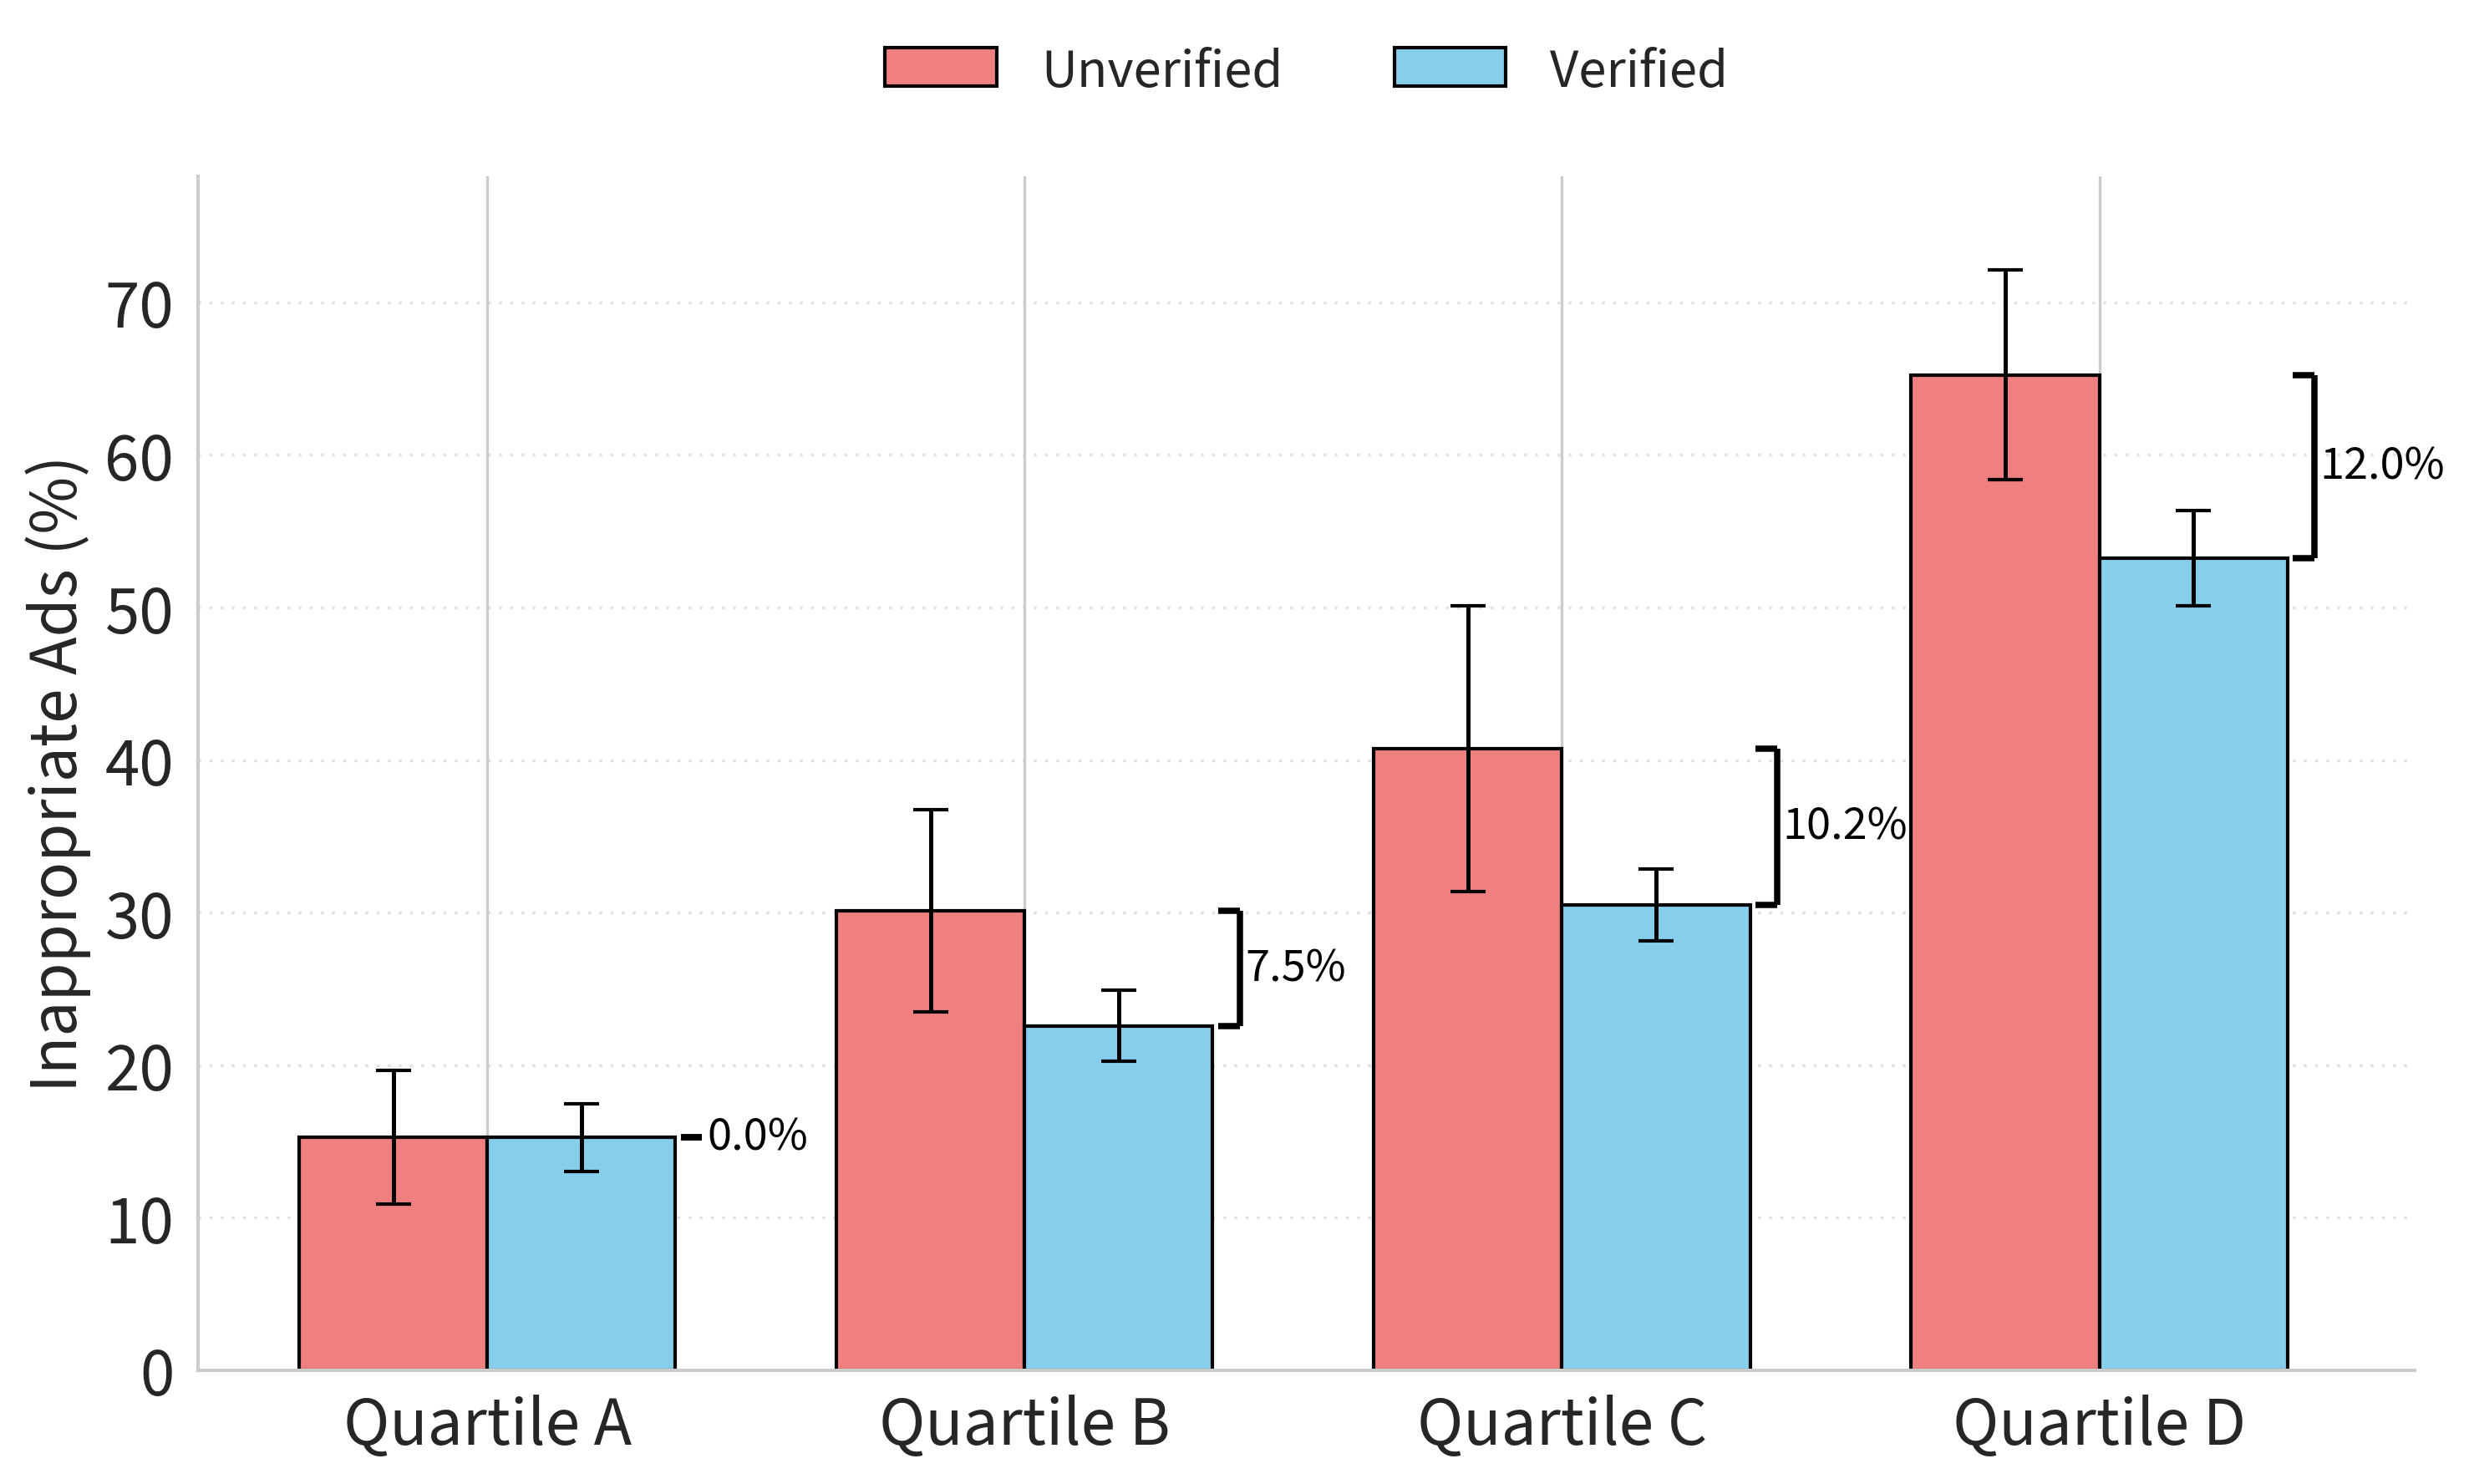

In [130]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats



def plot_inappropriate_by_quartile(
    df: pd.DataFrame,
    quartile_labels=None,
    alpha=0.05,
    save_path=None
):
    """
    Plots a grouped bar chart of inappropriate ad percentages for Verified vs. Unverified
    advertisers for each quartile, with annotations for the difference.

    Arguments:
    - df: DataFrame with 'Quartile', 'Video Verified', and 'is_inappropriate' columns.
    - quartile_labels: Ordered list of labels for the x-axis (e.g., ['A', 'B', 'C', 'D']).
    - alpha: Significance level for confidence intervals.
    - save_path: File path to save the figure (optional).
    """
    if quartile_labels is None:
        quartile_labels = sorted(df['Quartile'].unique())

    verified_percentages = []
    unverified_percentages = []
    ci_margins_verified = []
    ci_margins_unverified = []

    # Calculate percentages and CIs for each group
    for quartile in quartile_labels:
        quartile_df = df[df['Quartile'] == quartile]
        
        # --- Unverified Group ---
        unverified_subset = quartile_df[quartile_df['Verified'] == False]
        n_unverified = len(unverified_subset)
        if n_unverified > 1:
            p_unverified = unverified_subset['is_inappropriate'].mean()
            se_unverified = np.sqrt(p_unverified * (1 - p_unverified) / n_unverified)
            t_crit = stats.t.ppf(1 - alpha / 2, df=n_unverified - 1)
            margin_unverified = t_crit * se_unverified * 100
            unverified_percentages.append(p_unverified * 100)
            ci_margins_unverified.append(margin_unverified)
        else:
            unverified_percentages.append(0)
            ci_margins_unverified.append(0)

        # --- Verified Group ---
        verified_subset = quartile_df[quartile_df['Verified'] == True]
        n_verified = len(verified_subset)
        if n_verified > 1:
            p_verified = verified_subset['is_inappropriate'].mean()
            se_verified = np.sqrt(p_verified * (1 - p_verified) / n_verified)
            t_crit = stats.t.ppf(1 - alpha / 2, df=n_verified - 1)
            margin_verified = t_crit * se_verified * 100
            verified_percentages.append(p_verified * 100)
            ci_margins_verified.append(margin_verified)
        else:
            verified_percentages.append(0)
            ci_margins_verified.append(0)
            
    # --- Plot ---
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    index = np.arange(len(quartile_labels))

    # Plot Unverified bars
    ax.bar(
        index - bar_width / 2, unverified_percentages, bar_width,
        yerr=ci_margins_unverified, label='Unverified', color='lightcoral',
        edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5),
    )

    # Plot Verified bars
    ax.bar(
        index + bar_width / 2, verified_percentages, bar_width,
        yerr=ci_margins_verified, label='Verified', color='skyblue',
        edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5),
    )
    
    # -----------------------------------------------------------------------------
    # ANNOTATION: Bracket marker with percentage difference text
    # -----------------------------------------------------------------------------
    for i, (p_unverified, p_verified) in enumerate(zip(unverified_percentages, verified_percentages)):
        # 1. DEFINE POSITION & COLOR
        # Increased offset to move bracket further to the right
        marker_x_pos = index[i] + bar_width + 0.05
        marker_color = 'black'

        # 2. DRAW THE BRACKET
        cap_width = 0.04
        ax.vlines(x=marker_x_pos, ymin=p_verified, ymax=p_unverified, color=marker_color, lw=1.8)
        ax.hlines(y=p_unverified, xmin=marker_x_pos - cap_width, xmax=marker_x_pos, color=marker_color, lw=1.8)
        ax.hlines(y=p_verified, xmin=marker_x_pos - cap_width, xmax=marker_x_pos, color=marker_color, lw=1.8)
        
        # 3. ANNOTATE THE PERCENTAGE DIFFERENCE
        difference = p_unverified - p_verified
        print(p_verified,p_unverified,difference)
        ax.text(
            x=marker_x_pos + 0.01,  # Position text slightly to the right of the bracket
            y=(p_unverified + p_verified) / 2,  # Vertically centered on the bracket
            s=f'{difference:.1f}%', # Formatted text
            ha='left',      # Horizontal alignment
            va='center',    # Vertical alignment
            fontsize=14,
            color=marker_color
        )

    # --- Style and Finalize ---
    ax.set_ylabel("Inappropriate Ads (%)")
    ax.set_xticks(index)
    ax.set_xticklabels([f"Quartile {q}" for q in quartile_labels])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False)
    
    # Increase top limit slightly to ensure annotations are not cut off
    max_y = max(unverified_percentages) if unverified_percentages else 100
    ax.set_ylim(0, max_y * 1.20) 

    ax.grid(axis='y', linestyle=(0, (1, 3)), linewidth=0.8, alpha=0.6)
    fig.tight_layout()

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)

    plt.show()




# Call the plotting function
plot_inappropriate_by_quartile(
    df=df,
    quartile_labels=['A', 'B', 'C', 'D'],
    save_path='inappropriate_ads_final.pdf'
)

/tmp/ipykernel_140585/2139725578.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quartile_labels_short)


Figure saved to unverified_quartiles_with_brackets.pdf


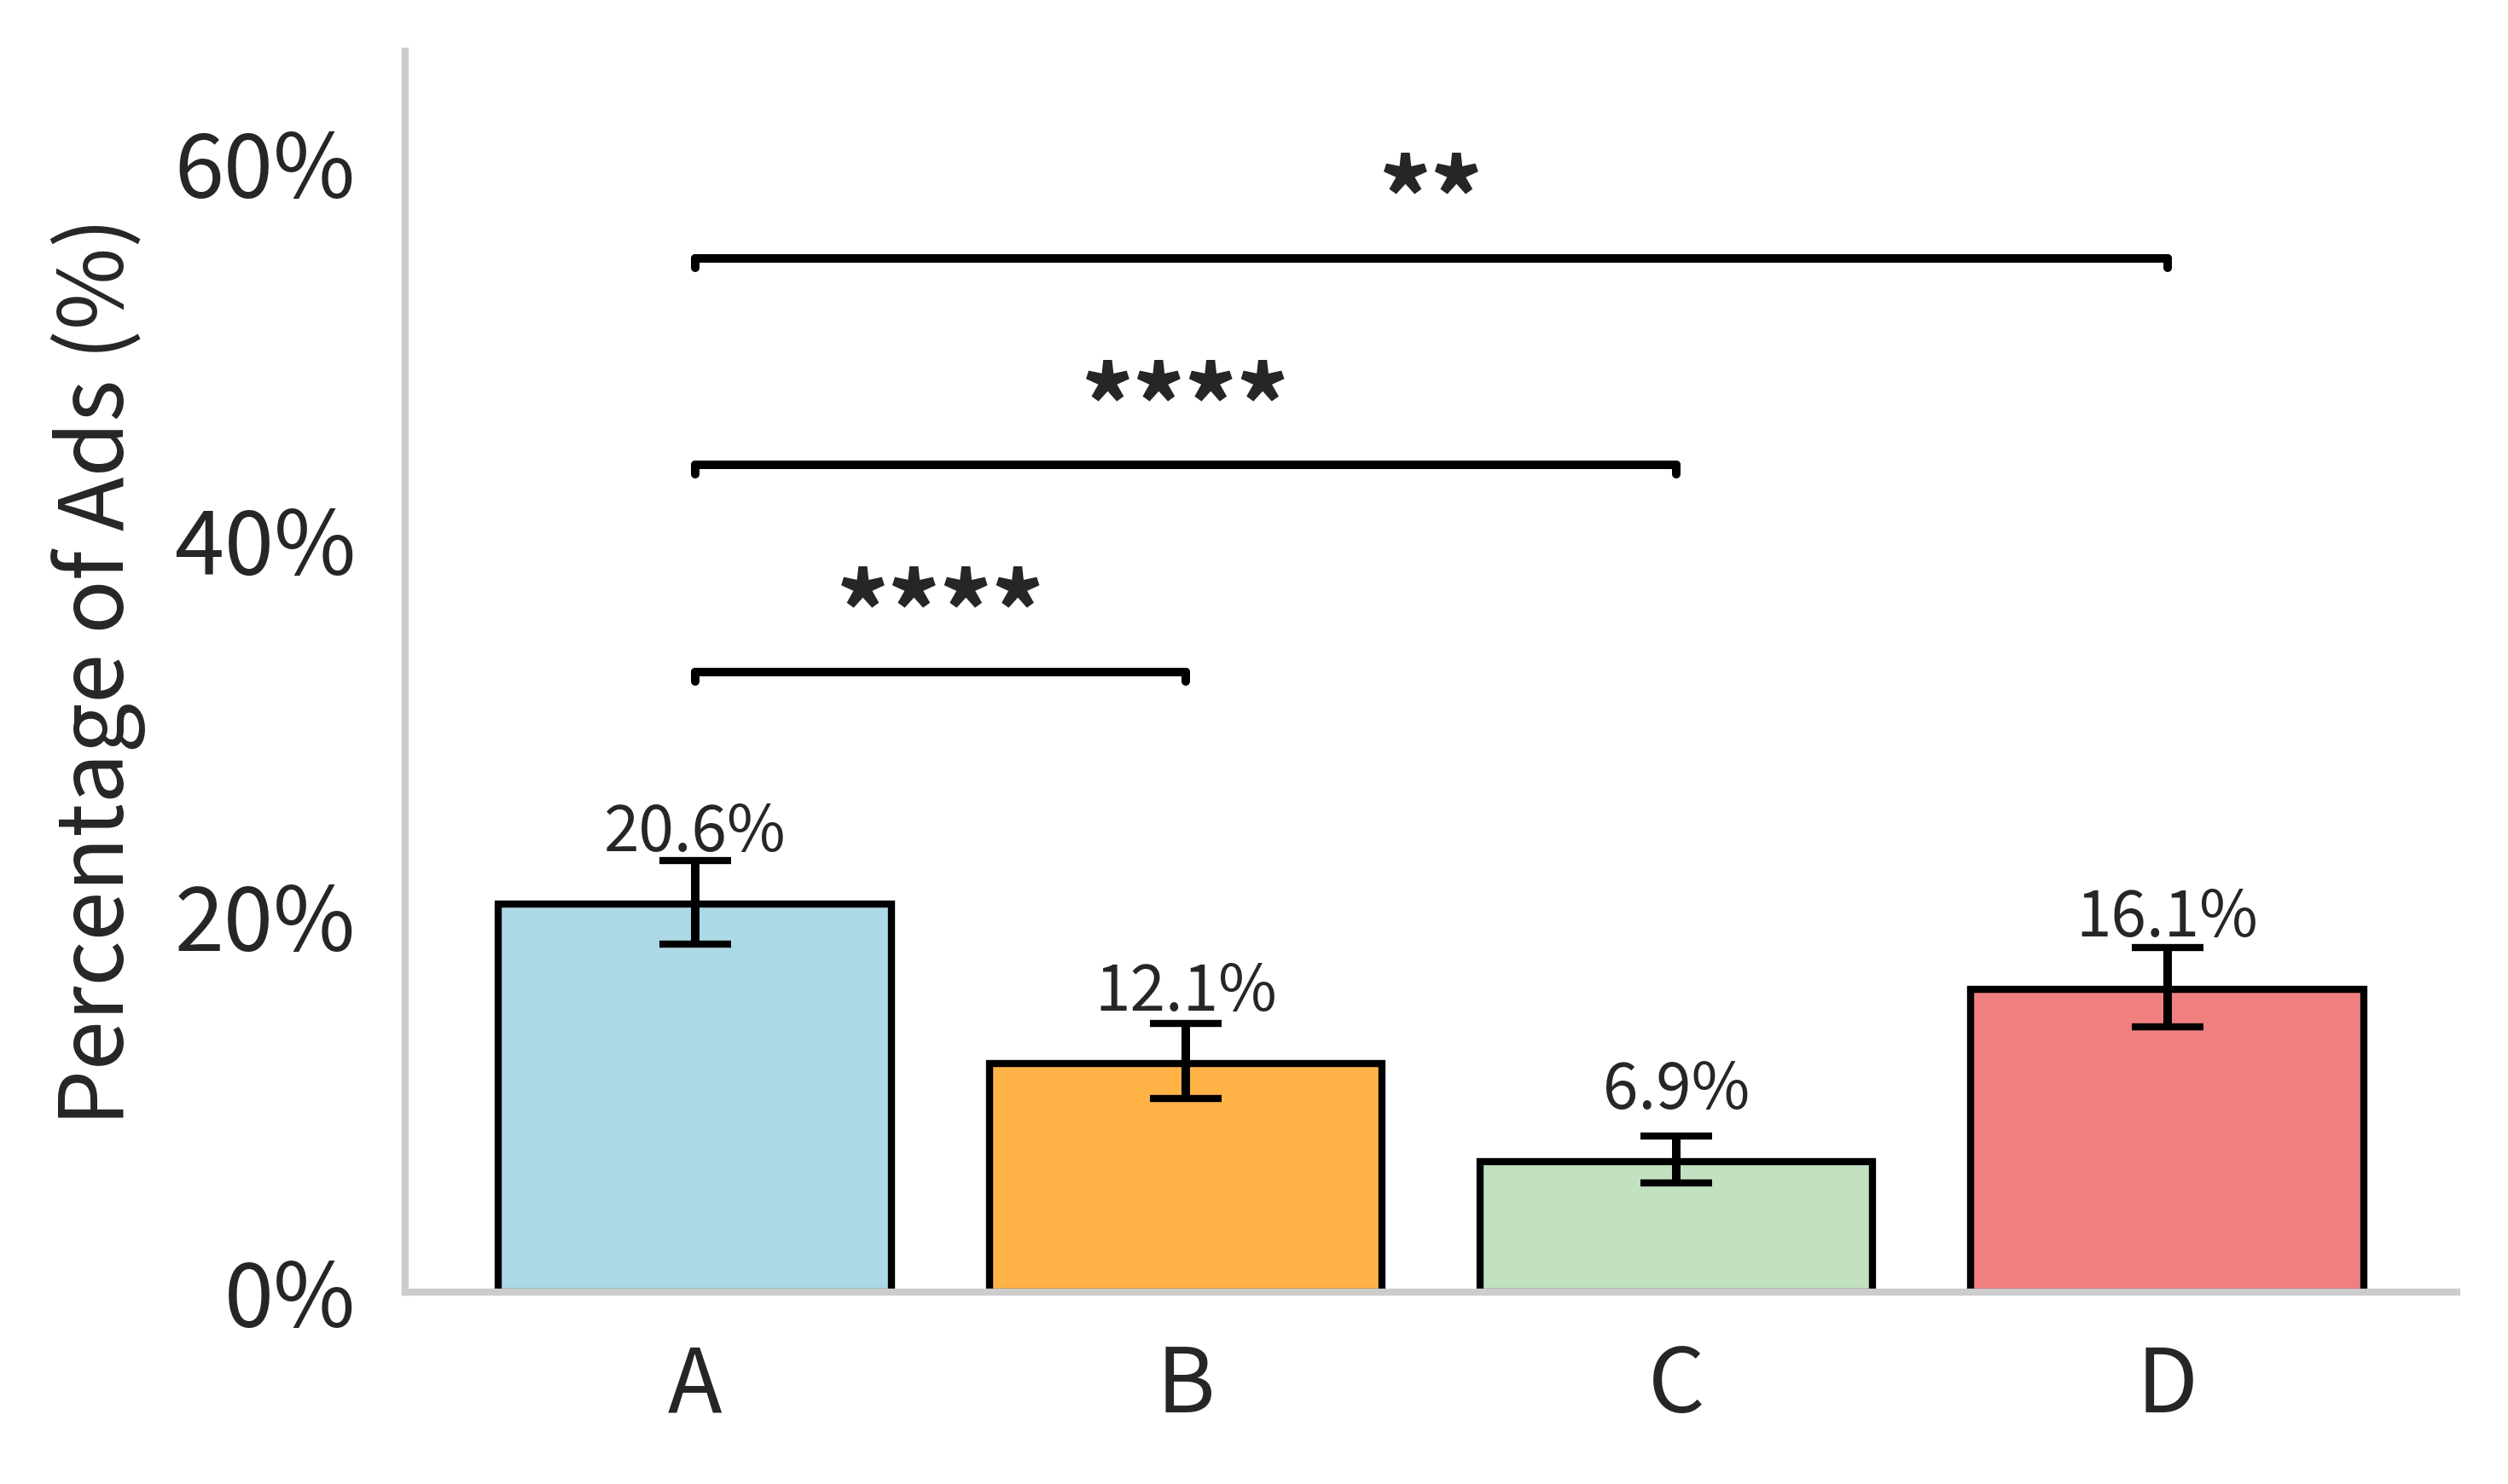

/tmp/ipykernel_140585/2139725578.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quartile_labels_short)


Figure saved to native_quartiles_with_brackets.pdf


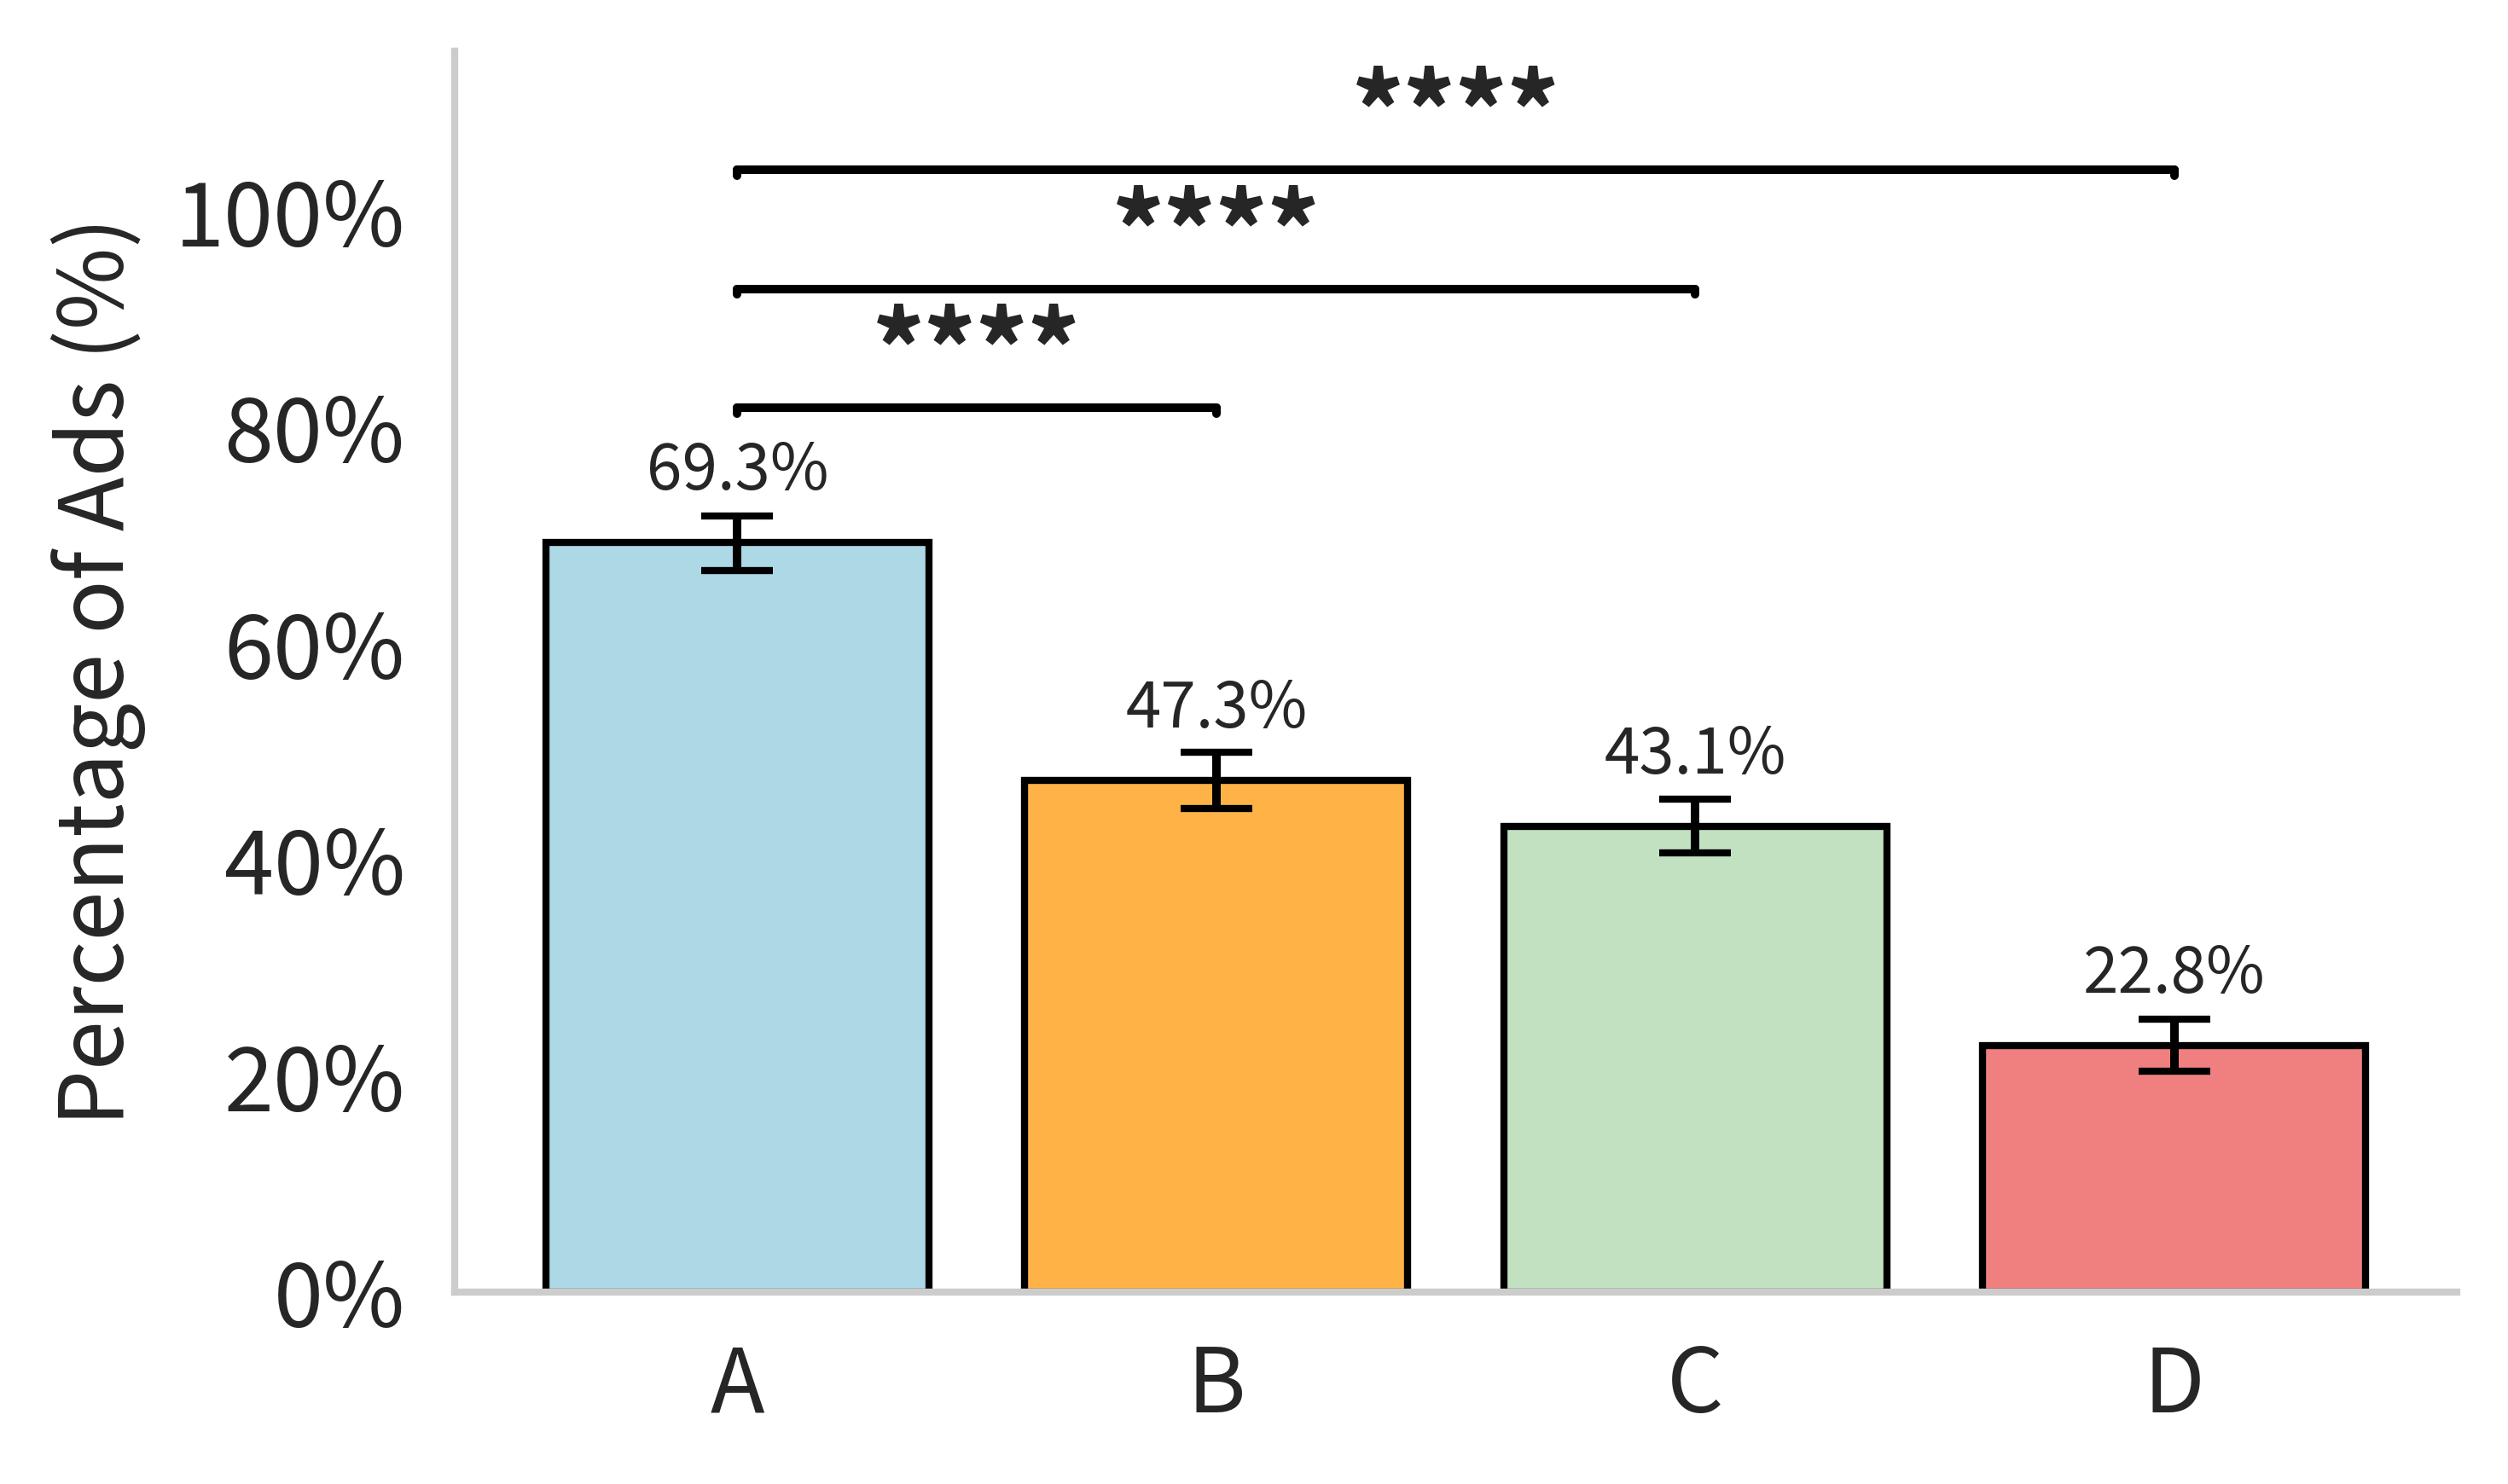

In [131]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.stats.proportion import proportion_confint, proportions_ztest



def draw_sig_bracket(ax, x_start, x_end, y_level, text, tick_height=0.5):
    """
    Draws a significance bracket between two points on the plot.
    """
    ax.plot([x_start, x_end], [y_level, y_level], color='black', lw=1.2)
    ax.plot([x_start, x_start], [y_level, y_level - tick_height], color='black', lw=1.2)
    ax.plot([x_end, x_end], [y_level, y_level - tick_height], color='black', lw=1.2)
    ax.text((x_start + x_end) / 2., y_level + 0.2, text, ha='center', va='bottom', fontsize=16, fontweight='bold')


def plot_quartile_metric(df: pd.DataFrame, column: str, title: str, invert: bool, save_path=None):
    """
    Generates a single bar chart showing a specific metric aggregated by quartile,
    including statistical significance brackets comparing Quartile A to others.
    """
    quartiles = {
        'Quartile A': ['Singapore', 'Taiwan', 'South Korea', 'Germany', 'Spain', 'Sweden', 'United States'],
        'Quartile B': ['United Arab Emirates', 'France', 'Belgium', 'Vietnam', 'Ireland', 'Mexico', 'Türkiye', 'Pakistan'],
        'Quartile C': ['Bahrain', 'Lebanon', 'Lithuania', 'Latvia', 'Netherlands', 'Austria', 'Estonia', 'Morocco'],
        'Quartile D': ['Bulgaria', 'Algeria', 'Jordan', 'Sri Lanka', 'Bangladesh', 'Senegal', 'Ghana']
    }
    country_to_quartile = {country: q for q, countries in quartiles.items() for country in countries}
    quartile_order = ['Quartile A', 'Quartile B', 'Quartile C', 'Quartile D']
    quartile_colors = {'Quartile A': '#add8e6', 'Quartile B': '#ffb347', 'Quartile C': '#c1e1c1', 'Quartile D': '#f08080'}

    df['Quartile'] = df['Country'].map(country_to_quartile)
    df_filtered = df.dropna(subset=['Quartile']).copy()
    
    if invert:
        df_filtered['is_target'] = (~df_filtered[column]).astype(int)
    else:
        df_filtered['is_target'] = df_filtered[column].astype(int)

    # --- 2. Per-Quartile Summary ---
    quartile_summary = df_filtered.groupby('Quartile').agg(
        Total_Ads=('Ad ID', 'count'),
        Target_Ads=('is_target', 'sum')
    ).reindex(quartile_order)
    
    quartile_summary['Percentage'] = (quartile_summary['Target_Ads'] / quartile_summary['Total_Ads']) * 100
    ci_low_q, ci_high_q = proportion_confint(quartile_summary['Target_Ads'], quartile_summary['Total_Ads'], method='wilson')
    y_err_q = [quartile_summary['Percentage'] - ci_low_q * 100, ci_high_q * 100 - quartile_summary['Percentage']]

    # --- 3. Plotting ---
    fig, ax = plt.subplots(figsize=(5, 3)) 

    ax.bar(
        quartile_summary.index, quartile_summary['Percentage'],
        yerr=y_err_q, color=[quartile_colors[q] for q in quartile_order],
        edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5)
    )
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
        

    max_h = (quartile_summary['Percentage'] + pd.Series(y_err_q[1], index=quartile_summary.index)).max()
    y_start = max_h + 10  
    y_increment = 11    
    
    comparisons = [('Quartile A', 'Quartile B'), ('Quartile A', 'Quartile C'), ('Quartile A', 'Quartile D')]
    quartile_x_pos = {q: i for i, q in enumerate(quartile_order)}
    
    for ref_q, comp_q in comparisons:
        if ref_q not in quartile_summary.index or comp_q not in quartile_summary.index: continue
        
        ref_counts = quartile_summary.loc[ref_q]
        comp_counts = quartile_summary.loc[comp_q]

        stat, pval = proportions_ztest([ref_counts['Target_Ads'], comp_counts['Target_Ads']],
                                       [ref_counts['Total_Ads'], comp_counts['Total_Ads']])

        if pval < 0.0001: sig_text = '****'
        elif pval < 0.001: sig_text = '***'
        elif pval < 0.01: sig_text = '**'
        elif pval < 0.05: sig_text = '*'
        else: continue

        draw_sig_bracket(ax, quartile_x_pos[ref_q], quartile_x_pos[comp_q], y_start, sig_text)
        y_start += y_increment
        
    ax.set_ylim(top=y_start) 

    quartile_labels_short = ['A', 'B', 'C', 'D']
    ax.set_xticklabels(quartile_labels_short)
    ax.set_ylabel("Percentage of Ads (%)")
    ax.tick_params(axis='x', rotation=0, labelsize=14)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
    ax.grid(False)

    fig.tight_layout()

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)
        print(f"Figure saved to {save_path}")

    plt.show()



plot_quartile_metric(
    df=df,
    column='Verified',
    title='Unverified Advertisers by Quartile',
    invert=True, # We want the rate of FALSE values
    save_path='unverified_quartiles_with_brackets.pdf'
)

# Plot 2: Native Advertisers by Quartile
df['Country'] = df['Country'].replace({'Turkey':'Türkiye', 'UAE':'United Arab Emirates'})
df['Native Advertiser'] = df.apply(lambda x: x['Advertiser Location'] == x['Country'], axis=1)

plot_quartile_metric(
    df=df,
    column='Native Advertiser',
    title='Native Advertisers by Quartile',
    invert=False, # We want the rate of TRUE values
    save_path='native_quartiles_with_brackets.pdf'
)

In [132]:
quartiles = {
    'Quartile A': ['Singapore', 'Taiwan', 'South Korea', 'Germany', 'Spain', 'Sweden', 'United States'],
    'Quartile B': ['United Arab Emirates', 'France', 'Belgium', 'Vietnam', 'Ireland', 'Mexico', 'Türkiye', 'Pakistan'],
    'Quartile C': ['Bahrain', 'Lebanon', 'Lithuania', 'Latvia', 'Netherlands', 'Austria', 'Estonia', 'Morocco'],
    'Quartile D': ['Bulgaria', 'Algeria', 'Jordan', 'Sri Lanka', 'Bangladesh', 'Senegal', 'Ghana']
}
country_to_quartile = {country: q for q, countries in quartiles.items() for country in countries}
quartile_order = ['Quartile A', 'Quartile B', 'Quartile C', 'Quartile D']
quartile_colors = {'Quartile A': '#add8e6', 'Quartile B': '#ffb347', 'Quartile C': '#c1e1c1', 'Quartile D': '#f08080'}

df['Native Advertiser'] = df.apply(lambda x: x['Advertiser Location'] == x['Country'], axis=1)
df['is_native'] = df['Native Advertiser'].astype(int)
df

Main Video Details Main Video ID  \
0     {'Url': 'https://www.youtube.com/watch?v=5qbXf...   5qbXfXgYE9A   
1     {'Url': 'https://www.youtube.com/watch?v=Bus61...   Bus61F7HX-0   
2     {'Url': 'https://www.youtube.com/watch?v=h-bRc...   h-bRcxyd-Pw   
3     {'Url': 'https://www.youtube.com/watch?v=3NPbQ...   3NPbQVkG6ro   
4     {'Url': 'https://www.youtube.com/watch?v=iw37d...   iw37dCwQCzs   
...                                                 ...           ...   
5605  {'Url': 'https://www.youtube.com/watch?v=BbQeX...   BbQeX6zkLtA   
5606  {'Url': 'https://www.youtube.com/watch?v=oPL2O...   oPL2O9nTi5o   
5608  {'Url': 'https://www.youtube.com/watch?v=WGCKP...   WGCKPZ-JaVM   
5609  {'Url': 'https://www.youtube.com/watch?v=9CLGK...   9CLGKkmLyBc   
5610  {'Url': 'https://www.youtube.com/watch?v=Cobdl...   CobdlUmEj7k   

      Country                                          Video Ads        Ad ID  \
0     Algeria  {'ad_id': 'nRdXPJcvf2M ', 'Count': 1, 'Skippab...  nRdXPJcvf2M   
1     Algeria  {'ad_id': 'TuDtCzL99GY ', 'Count': 1, 'Skippab...  TuDtCzL99GY   
2     Algeria  {'ad_id': 'vGmQrRVEvJ8 ', 'Count': 1, 'Skippab...  vGmQrRVEvJ8   
3     Algeria  {'ad_id': '71t7O89Bjw8 ', 'Count': 1, 'Skippab...  71t7O89Bjw8   
4     Algeria  {'ad_id': 'b7C4HWjfBFM ', 'Count': 1, 'Skippab...  b7C4HWjfBFM   
...       ...                                                ...          ...   
5605  Vietnam  {'ad_id': '8TmlGShuKYo ', 'Count': 1, 'Skippab...  8TmlGShuKYo   
5606  Vietnam  {'ad_id': 'gsdmVlFze9E ', 'Count': 1, 'Skippab...  gsdmVlFze9E   
5608  Vietnam  {'ad_id': '8o8Qre5Trf0 ', 'Count': 1, 'Skippab...  8o8Qre5Trf0   
5609  Vietnam  {'ad_id': 'ciajaKOUbWQ ', 'Count': 1, 'Skippab...  ciajaKOUbWQ   
5610  Vietnam  {'ad_id': 'UUmWBFGC3TA ', 'Count': 1, 'Skippab...  UUmWBFGC3TA   

      Skippable SkipDuration                Advertiser Name  \
0             1         3:26            EVO ALU & STEEL LTD   
1             1         3:53     Latisol Production FZE-LLC   
2             1         3:23                     CHBK MUSIC   
3             1         4:59                     Arama S.A.   
4             1         5:29           Manabí Organic Foods   
...         ...          ...                            ...   
5605          1         2:15                            周耀庭   
5606          1         2:50             ATV MEDIA CO., LTD   
5608          1         0:30  Công ty Cổ phần Giấy Hải Tiến   
5609          1         3:48    CÔNG TY TNHH I-DAC VIỆT NAM   
5610          1         1:00          PROFOTOCLASS CO., LTD   

       Advertiser Location  Verified  ad_id_clean main_id_clean  \
0                Mauritius     False  nRdXPJcvf2M   5qbXfXgYE9A   
1     United Arab Emirates     False  TuDtCzL99GY   Bus61F7HX-0   
2                  Lebanon      True  vGmQrRVEvJ8   h-bRcxyd-Pw   
3                  Ecuador     False  71t7O89Bjw8   3NPbQVkG6ro   
4                  Ecuador      True  b7C4HWjfBFM   iw37dCwQCzs   
...                    ...       ...          ...           ...   
5605                Taiwan      True  8TmlGShuKYo   BbQeX6zkLtA   
5606               Vietnam      True  gsdmVlFze9E   oPL2O9nTi5o   
5608               Vietnam      True  8o8Qre5Trf0   WGCKPZ-JaVM   
5609               Vietnam      True  ciajaKOUbWQ   9CLGKkmLyBc   
5610              Thailand      True  UUmWBFGC3TA   CobdlUmEj7k   

         primary_tag          secondary_tag    Quartile  is_inappropriate  \
0      Inappropriate     Suggestive Content  Quartile D                 1   
1      Inappropriate    Sexual and Romantic  Quartile D                 1   
2      Inappropriate    Sexual and Romantic  Quartile D                 1   
3      Inappropriate    Sexual and Romantic  Quartile D                 1   
4      Inappropriate    Sexual and Romantic  Quartile D                 1   
...              ...                    ...         ...               ...   
5605  Child-directed    Educational Content  Quartile B                 0   
5606   In

16.685584562996596 12.051282051282051 -4.634302511714544
17.77777777777778 28.723404255319153 10.945626477541374
24.25595238095238 36.486486486486484 12.230534105534105
39.24528301886793 59.84427141268076 20.59898839381283


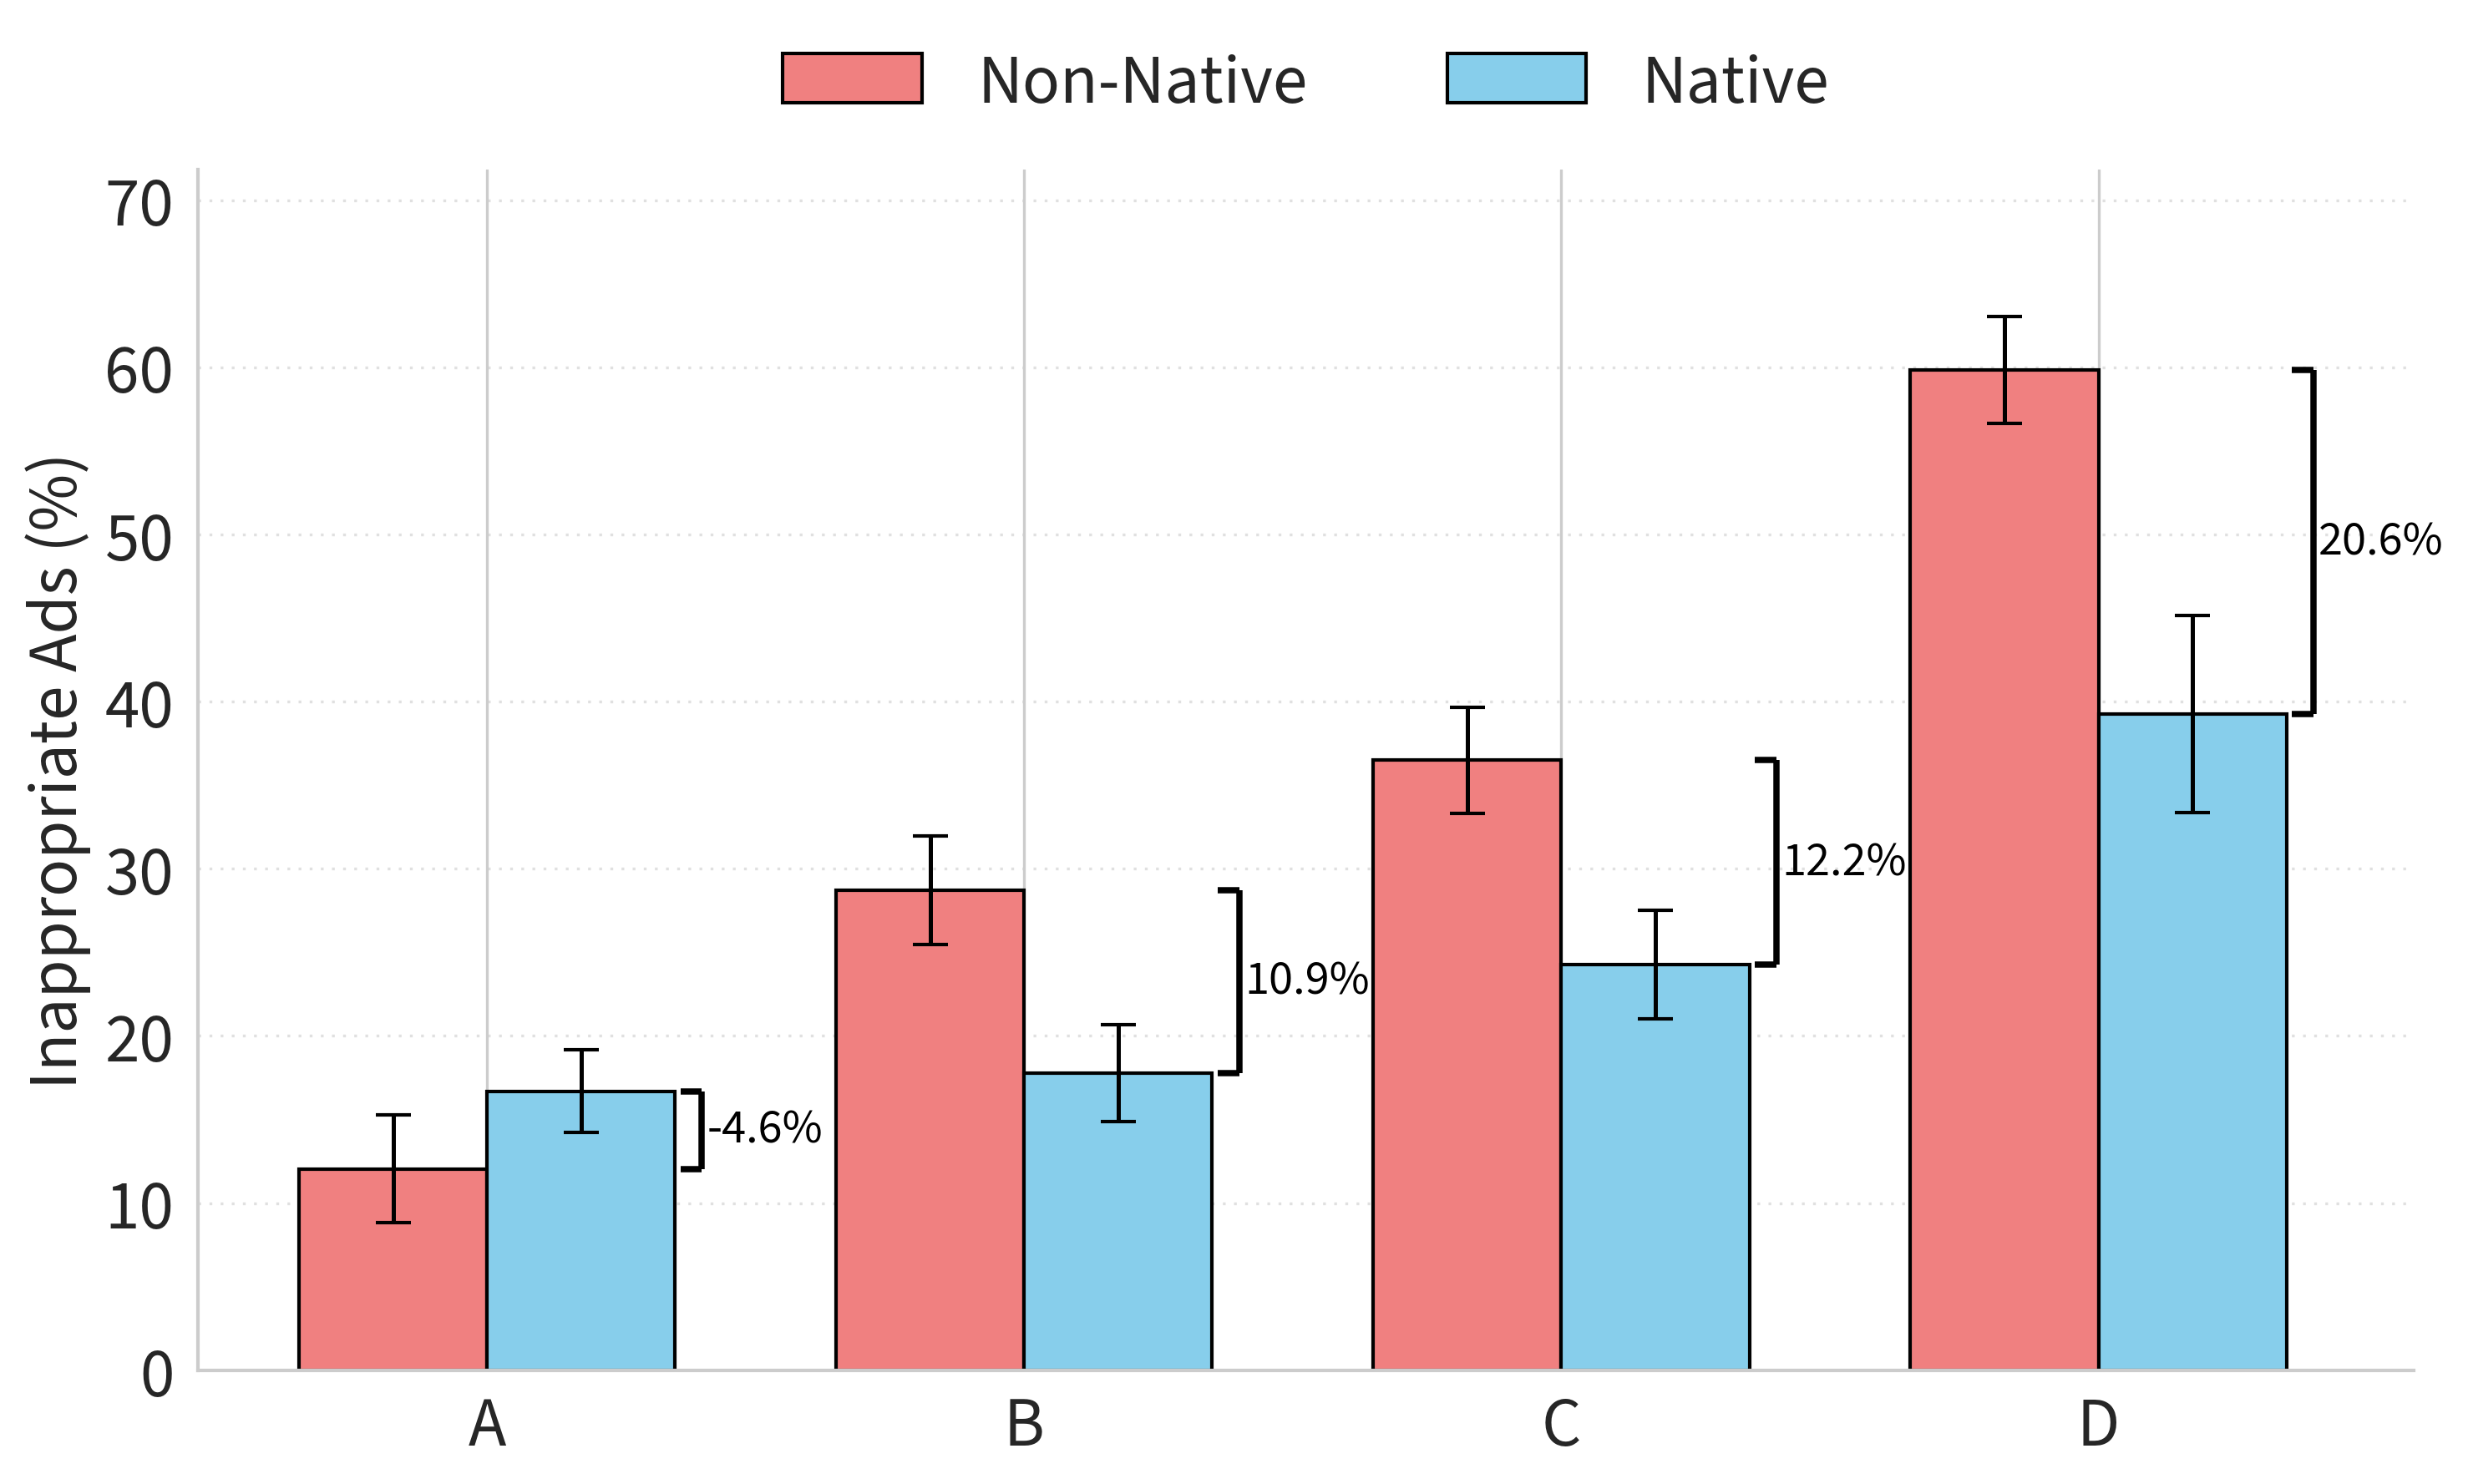

In [133]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats



def plot_inappropriate_by_quartile(
    df: pd.DataFrame,
    quartile_labels=None,
    alpha=0.05,
    save_path=None
):
    """
    Plots a grouped bar chart of inappropriate ad percentages for Verified vs. Unverified
    advertisers for each quartile, with annotations for the difference.

    Arguments:
    - df: DataFrame with 'Quartile', 'Video Verified', and 'is_inappropriate' columns.
    - quartile_labels: Ordered list of labels for the x-axis (e.g., ['A', 'B', 'C', 'D']).
    - alpha: Significance level for confidence intervals.
    - save_path: File path to save the figure (optional).
    """
    if quartile_labels is None:
        quartile_labels = sorted(df['Quartile'].unique())

    verified_percentages = []
    unverified_percentages = []
    ci_margins_verified = []
    ci_margins_unverified = []

    # Calculate percentages and CIs for each group
    for quartile in quartile_labels:
        quartile_df = df[df['Quartile'] == quartile]
        
        # --- Unverified Group ---
        unverified_subset = quartile_df[quartile_df['Native Advertiser'] == False]
        n_unverified = len(unverified_subset)
        if n_unverified > 1:
            p_unverified = unverified_subset['is_inappropriate'].mean()
            se_unverified = np.sqrt(p_unverified * (1 - p_unverified) / n_unverified)
            t_crit = stats.t.ppf(1 - alpha / 2, df=n_unverified - 1)
            margin_unverified = t_crit * se_unverified * 100
            unverified_percentages.append(p_unverified * 100)
            ci_margins_unverified.append(margin_unverified)
        else:
            unverified_percentages.append(0)
            ci_margins_unverified.append(0)

        # --- Verified Group ---
        verified_subset = quartile_df[quartile_df['Native Advertiser'] == True]
        n_verified = len(verified_subset)
        if n_verified > 1:
            p_verified = verified_subset['is_inappropriate'].mean()
            se_verified = np.sqrt(p_verified * (1 - p_verified) / n_verified)
            t_crit = stats.t.ppf(1 - alpha / 2, df=n_verified - 1)
            margin_verified = t_crit * se_verified * 100
            verified_percentages.append(p_verified * 100)
            ci_margins_verified.append(margin_verified)
        else:
            verified_percentages.append(0)
            ci_margins_verified.append(0)
            
    # --- Plot ---
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    index = np.arange(len(quartile_labels))

    # Plot Unverified bars
    ax.bar(
        index - bar_width / 2, unverified_percentages, bar_width,
        yerr=ci_margins_unverified, label='Non-Native', color='lightcoral',
        edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5),
    )

    # Plot Verified bars
    ax.bar(
        index + bar_width / 2, verified_percentages, bar_width,
        yerr=ci_margins_verified, label='Native', color='skyblue',
        edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5),
    )
    
    for i, (p_unverified, p_verified) in enumerate(zip(unverified_percentages, verified_percentages)):
        # 1. DEFINE POSITION & COLOR
        # Increased offset to move bracket further to the right
        marker_x_pos = index[i] + bar_width + 0.05
        marker_color = 'black'

        # 2. DRAW THE BRACKET
        cap_width = 0.04
        ax.vlines(x=marker_x_pos, ymin=p_verified, ymax=p_unverified, color=marker_color, lw=1.8)
        ax.hlines(y=p_unverified, xmin=marker_x_pos - cap_width, xmax=marker_x_pos, color=marker_color, lw=1.8)
        ax.hlines(y=p_verified, xmin=marker_x_pos - cap_width, xmax=marker_x_pos, color=marker_color, lw=1.8)
        
        # 3. ANNOTATE THE PERCENTAGE DIFFERENCE
        difference = p_unverified - p_verified
        print(p_verified,p_unverified,difference)
        ax.text(
            x=marker_x_pos + 0.01,  
            y=(p_unverified + p_verified) / 2, 
            s=f'{difference:.1f}%', # Formatted text
            ha='left',      # Horizontal alignment
            va='center',    # Vertical alignment
            fontsize=14,
            color=marker_color
        )

    # --- Style and Finalize ---
            
    ax.set_ylabel("Inappropriate Ads (%)")
    ax.set_xticks(index)
    ax.set_xticklabels([f"Quartile {q}" for q in quartile_labels])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False, fontsize=20)
    quartile_labels_short = ['A', 'B', 'C', 'D']
    ax.set_xticklabels(quartile_labels_short)
    
    max_y = max(unverified_percentages) if unverified_percentages else 100
    ax.set_ylim(0, max_y * 1.20) 

    ax.grid(axis='y', linestyle=(0, (1, 3)), linewidth=0.8, alpha=0.6)
    fig.tight_layout()

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)

    plt.show()




plot_inappropriate_by_quartile(
    df=df,
    quartile_labels=['Quartile A', 'Quartile B', 'Quartile C', 'Quartile D'],
    save_path='native_analysis.pdf'
)

In [134]:
inappropriate_ads = df[df['primary_tag'].isin(['Inappropriate'])]
df['is_inappropriate'] = (df['primary_tag'] == 'Inappropriate').astype(int)
proportions = df.groupby('Native Advertiser')['is_inappropriate'].mean()
print(proportions)

## At the ad level
contingency = pd.crosstab(df['Native Advertiser'], df['is_inappropriate'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-squared:", chi2)
print("p-value:", p)


### At the ad level

advertiser_level = df.groupby('Advertiser Name').agg({
    'Native Advertiser': 'first',   # assuming same status for all ads
    'is_inappropriate': 'max'    # 1 if advertiser had at least one inappropriate ad
}).reset_index()
advertiser_level['Native Advertiser'] = advertiser_level['Native Advertiser'].astype(bool)


# Compare proportions at advertiser level
proportions = advertiser_level.groupby('Native Advertiser')['is_inappropriate'].mean()
print(proportions)
contingency = pd.crosstab(advertiser_level['Native Advertiser'], advertiser_level['is_inappropriate'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("Chi-squared:", chi2, "p-value:", p)



Native Advertiser
False    0.38409
True     0.21420
Name: is_inappropriate, dtype: float64
Chi-squared: 182.2459405459034
p-value: 1.56695595833412e-41
Native Advertiser
False    0.469248
True     0.199198
Name: is_inappropriate, dtype: float64
Chi-squared: 129.15259094078647 p-value: 6.280002289361372e-30


In [135]:
df[(df['primary_tag']=='Inappropriate')]['Advertiser Location'].value_counts().head(20)

Advertiser Location
Lebanon                 230
United States           182
Ecuador                 158
South Korea             154
United Arab Emirates     71
Türkiye                  62
Ghana                    59
Singapore                54
United Kingdom           53
Bulgaria                 39
India                    36
Spain                    35
Egypt                    34
Mauritius                33
Germany                  32
Morocco                  27
France                   25
Lithuania                25
Belgium                  24
Netherlands              22
Name: count, dtype: int64

### Linguistic Analysis

In [138]:
metadata_file = pd.read_csv('../../Data/ad_metadata.csv')
labeled_sample = df.merge(metadata_file, left_on='Ad ID', right_on='Ad ID', how='left')

In [139]:
df[df['Advertiser Location']=='South Korea']['is_native'].value_counts(normalize=True)

is_native
1    0.513846
0    0.486154
Name: proportion, dtype: float64

In [140]:
df[df['Advertiser Location']=='South Korea']

Main Video Details Main Video ID  \
20    {'Url': 'https://www.youtube.com/watch?v=7jPqX...   7jPqXhNoROM   
33    {'Url': 'https://www.youtube.com/watch?v=091PY...   091PYx-raiY   
38    {'Url': 'https://www.youtube.com/watch?v=_MwnF...   _MwnF1qwpgA   
74    {'Url': 'https://www.youtube.com/watch?v=FenPP...   FenPPb8dMdQ   
79    {'Url': 'https://www.youtube.com/watch?v=KBxVo...   KBxVoZQ55Bo   
...                                                 ...           ...   
5564  {'Url': 'https://www.youtube.com/watch?v=p62KK...   p62KKKdDaHU   
5570  {'Url': 'https://www.youtube.com/watch?v=Y4jx7...   Y4jx7uY4qks   
5596  {'Url': 'https://www.youtube.com/watch?v=VbzZs...   VbzZsSiBE34   
5597  {'Url': 'https://www.youtube.com/watch?v=nOb6h...   nOb6hvwgUJ4   
5602  {'Url': 'https://www.youtube.com/watch?v=w0V8Q...   w0V8Q6CVc7g   

      Country                                          Video Ads        Ad ID  \
20    Algeria  {'ad_id': '3mq2kr5UR2k ', 'Count': 1, 'Skippab...  3mq2kr5UR2k   
33    Algeria  {'ad_id': 'kJwRqml7bPE ', 'Count': 1, 'Skippab...  kJwRqml7bPE   
38    Algeria  {'ad_id': 'kJwRqml7bPE ', 'Count': 1, 'Skippab...  kJwRqml7bPE   
74    Algeria  {'ad_id': 'kJwRqml7bPE ', 'Count': 1, 'Skippab...  kJwRqml7bPE   
79    Algeria  {'ad_id': 'kJwRqml7bPE ', 'Count': 1, 'Skippab...  kJwRqml7bPE   
...       ...                                                ...          ...   
5564  Vietnam  {'ad_id': 'xn8mQqz2xmM ', 'Count': 1, 'Skippab...  xn8mQqz2xmM   
5570  Vietnam  {'ad_id': 'F0veX7ix4x4 ', 'Count': 1, 'Skippab...  F0veX7ix4x4   
5596  Vietnam  {'ad_id': 'XFQMxLo0H2c ', 'Count': 1, 'Skippab...  XFQMxLo0H2c   
5597  Vietnam  {'ad_id': 'WH_hpIOBmZo ', 'Count': 1, 'Skippab...  WH_hpIOBmZo   
5602  Vietnam  {'ad_id': 'JpIOtRwlmqE ', 'Count': 1, 'Skippab...  JpIOtRwlmqE   

      Skippable SkipDuration   Advertiser Name Advertiser Location  Verified  \
20            1        32:45       주식회사 씨제이이엔엠         South Korea      True   
33            1         2:44        한소닉 서울 영업소         South Korea     False   
38            1         2:44        한소닉 서울 영업소         South Korea     False   
74            1         2:44        한소닉 서울 영업소         South Korea     False   
79            1         2:44        한소닉 서울 영업소         South Korea     False   
...         ...          ...               ...                 ...       ...   
5564          0         2:35         YG 엔터테인먼트         South Korea      True   
5570          0           -1  SM Entertainment         South Korea      True   
5596          1        18:09            UNCORE         South Korea      True   
5597          1         1:51      (주) 디엔텍세븐컨설팅         South Korea      True   
5602          1         3:20    주식회사 빅플래닛메이드엔터         South Korea      True   

      ad_id_clean main_id_clean     primary_tag             secondary_tag  \
20    3mq2kr5UR2k   7jPqXhNoROM   Inappropriate       Age-sensitive media   
33    kJwRqml7bPE   091PYx-raiY   Inappropriate       Age-sensitive media   
38    kJwRqml7bPE   _MwnF1qwpgA   Inappropriate       Age-sensitive media   
74    kJwRqml7bPE   FenPPb8dMdQ   Inappropriate       Age-sensitive media   
79    kJwRqml7bPE   KBxVoZQ55Bo   Inappropriate       Age-sensitive media   
...           ...           ...             ...                       ...   
5564  xn8mQqz2xmM   p62KKKdDaHU   Inappropriate    Inappropriate Clothing   
5570  F0veX7ix4x4   Y4jx7uY4qks   Inappropriate  Drinking, drugs, smoking   
5596  XFQMxLo0H2c   VbzZsSiBE34   Inappropriate       Sexual and Romantic   
5597  WH_hpIOBmZo   nOb6hvwgUJ4  Child-directed    Nursery Rhymes & Music   
5602  JpIOtRwlmqE   w0V8Q6CVc7g   Inappropriate       Sexual and Romantic   

        Quartile  is_inappropriate  Native Advertiser  is_native  
20    Quartile D                 1              False          0  
33    Quartile D                 1              False          0  
38    Quartile D                 1              False          0  
74    Quartile D                 

In [141]:
labeled_sample['secondary_tag'].unique()

array(['Suggestive Content', 'Sexual and Romantic',
       'Sensitive or controversial', 'Music & Performance',
       'Age-sensitive media', 'Autos & Vehicles', 'Technology & Gadgets',
       'Inappropriate Clothing', 'Violent, scary, or crude',
       'Travel & Adventure', 'Software', 'Scariness', '18+ Interests',
       'Play and Adventure', 'Business & Entrepreneurship',
       'Home & Office', 'Machinery', 'Nature & Environment',
       'Social Issues & Activism', 'Kid’s Fashion', 'Finance & Legal',
       'Dangerous products or services', 'Fashion', 'Cartoons',
       'Family friendly gaming', 'Education & Learning', 'Toys',
       'Health & Wellness', 'Personal Development', 'Health and beauty',
       nan, 'Storytelling', 'Educational Content',
       'Explicit Sexual Content', 'Drinking, drugs, smoking',
       'Sports & Athletics', 'Movies', 'Stereotypes', 'Gambling',
       'Financial', 'Parenting & Family', 'Health & Hygiene',
       'Nursery Rhymes & Music', 'Privacy, safe

/tmp/ipykernel_140585/3843333197.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['A', 'B', 'C', 'D'])


Figure saved to unverified_analysis.pdf


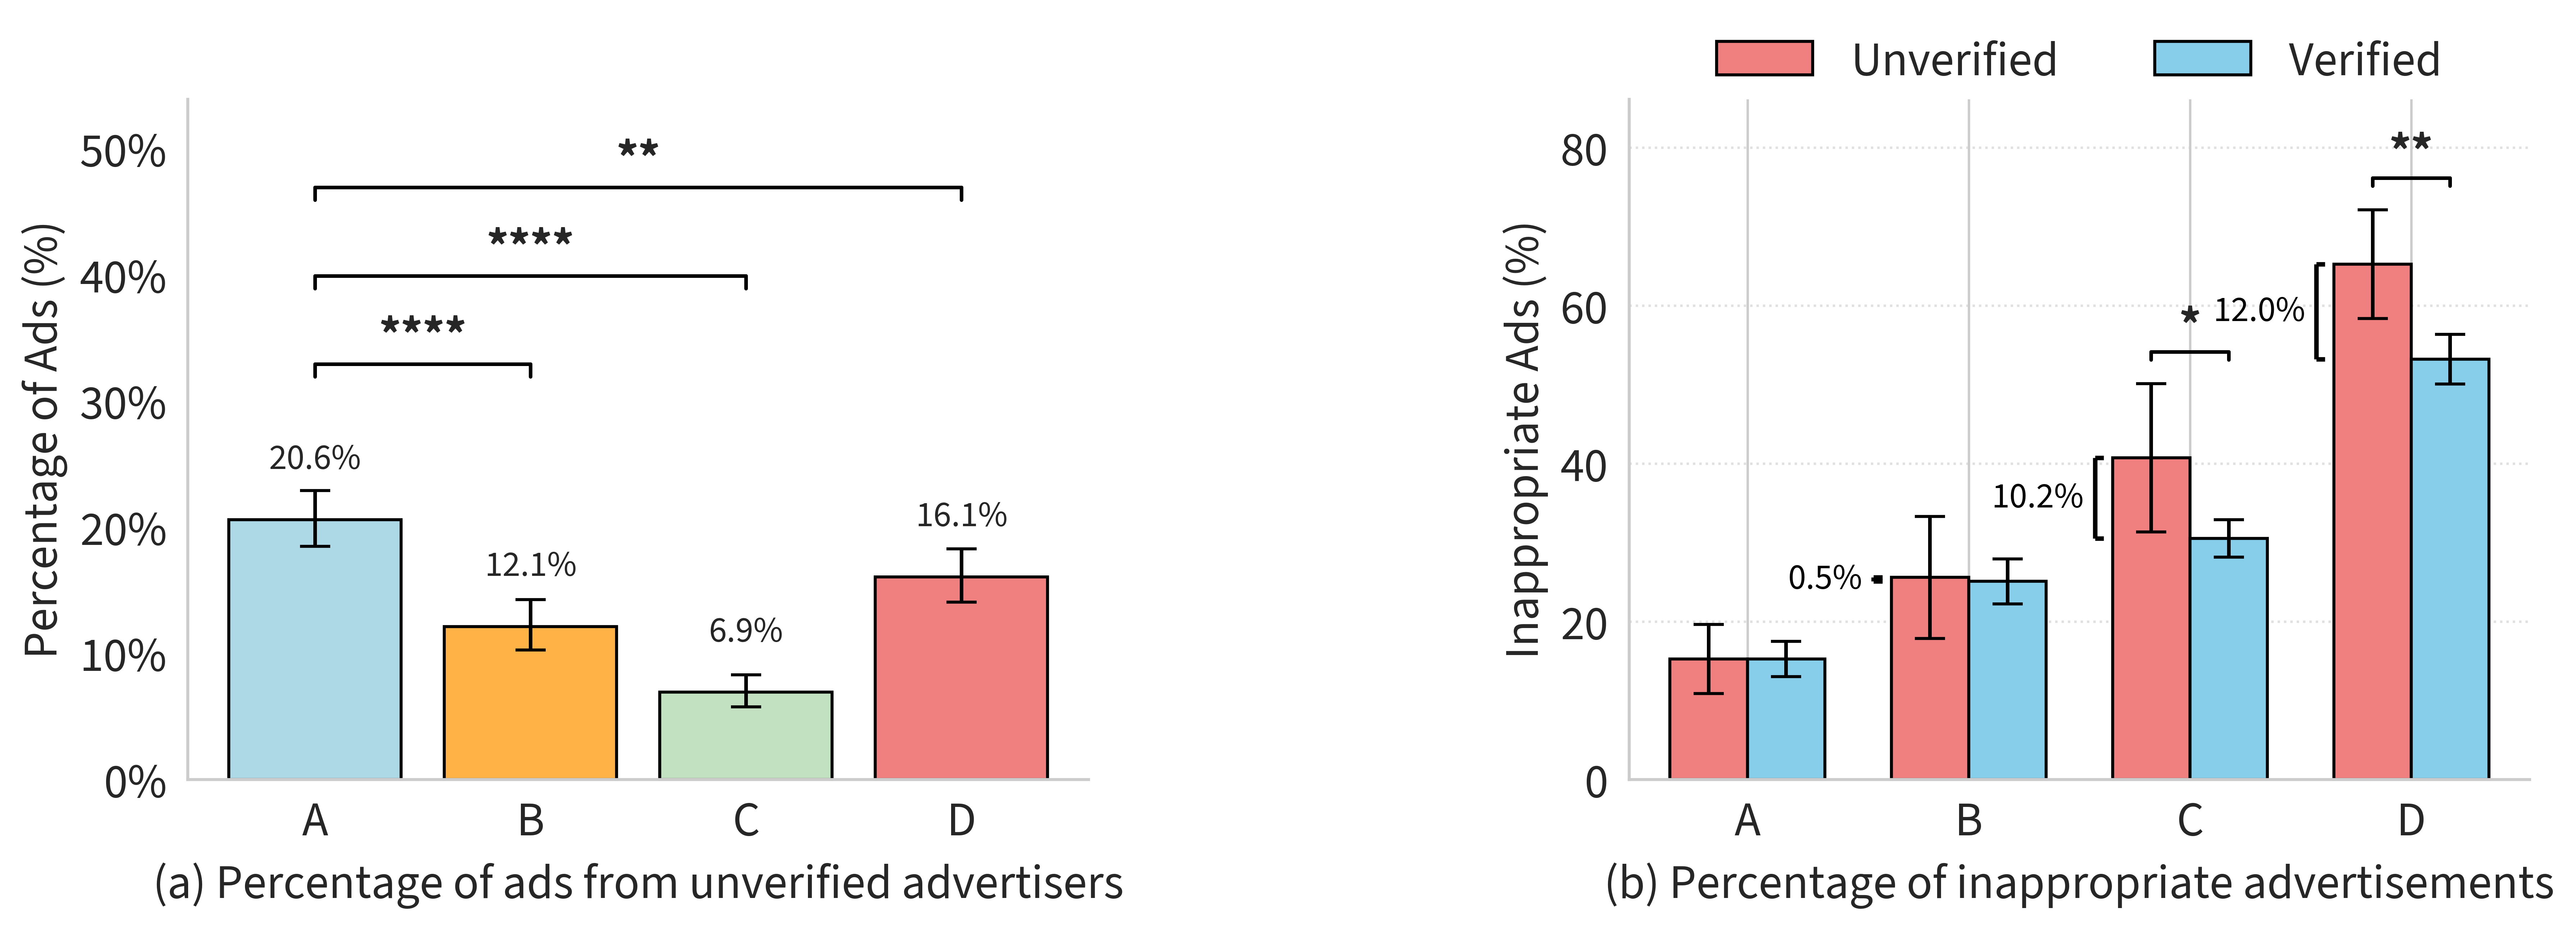

In [142]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
from scipy import stats



def draw_sig_bracket(ax, x_start, x_end, y_level, text, tick_height=1.5):
    """
    Draws a significance bracket between two points on the plot.
    """
    ax.plot([x_start, x_end], [y_level, y_level], color='black', lw=1.2)
    ax.plot([x_start, x_start], [y_level, y_level - tick_height], color='black', lw=1.2)
    ax.plot([x_end, x_end], [y_level, y_level - tick_height], color='black', lw=1.2)
    ax.text((x_start + x_end) / 2., y_level + 0.5, text, ha='center', va='bottom', fontsize=16, fontweight='bold')

def create_combined_verification_plots(df: pd.DataFrame, save_path=None):
    """
    Generates a single figure with two side-by-side plots with all annotations.
    """
    # --- Common Data Preparation ---
    quartiles = {
        'Quartile A': ['Singapore', 'Taiwan', 'South Korea', 'Germany', 'Spain', 'Sweden', 'United States'],
        'Quartile B': ['UAE', 'France', 'Belgium', 'Vietnam', 'Ireland', 'Mexico', 'Turkey', 'Pakistan'],
        'Quartile C': ['Bahrain', 'Lebanon', 'Lithuania', 'Latvia', 'Netherlands', 'Austria', 'Estonia', 'Morocco'],
        'Quartile D': ['Bulgaria', 'Algeria', 'Jordan', 'Sri Lanka', 'Bangladesh', 'Senegal', 'Ghana']
    }
    country_to_quartile = {country: q for q, countries in quartiles.items() for country in countries}
    df['Quartile'] = df['Country'].map(country_to_quartile)
    df_filtered = df.dropna(subset=['Quartile']).copy()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) # Adjusted height

    quartile_order = ['Quartile A', 'Quartile B', 'Quartile C', 'Quartile D']
    quartile_colors = {'Quartile A': '#add8e6', 'Quartile B': '#ffb347', 'Quartile C': '#c1e1c1', 'Quartile D': '#f08080'}
    df_filtered['is_unverified'] = (~df_filtered['Verified']).astype(int)
    quartile_summary = df_filtered.groupby('Quartile').agg(Total_Ads=('Ad ID', 'count'), Target_Ads=('is_unverified', 'sum')).reindex(quartile_order)
    quartile_summary['Percentage'] = (quartile_summary['Target_Ads'] / quartile_summary['Total_Ads']) * 100
    ci_low_q, ci_high_q = proportion_confint(quartile_summary['Target_Ads'], quartile_summary['Total_Ads'], method='wilson')
    y_err_q = [quartile_summary['Percentage'] - ci_low_q * 100, ci_high_q * 100 - quartile_summary['Percentage']]

    ax1.bar(quartile_summary.index, quartile_summary['Percentage'], yerr=y_err_q, color=[quartile_colors[q] for q in quartile_order],
            edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5))
    for p in ax1.patches:
        height = p.get_height()
        ax1.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=12)

    max_h = (quartile_summary['Percentage'] + pd.Series(y_err_q[1], index=quartile_summary.index)).max()
    y_start = max_h + 10
    y_increment = 7
    comparisons = [('Quartile A', 'Quartile B'), ('Quartile A', 'Quartile C'), ('Quartile A', 'Quartile D')]
    quartile_x_pos = {q: i for i, q in enumerate(quartile_order)}
    
    for ref_q, comp_q in comparisons:
        if ref_q not in quartile_summary.index or comp_q not in quartile_summary.index: continue
        ref_counts = quartile_summary.loc[ref_q]
        comp_counts = quartile_summary.loc[comp_q]
        stat, pval = proportions_ztest([ref_counts['Target_Ads'], comp_counts['Target_Ads']],
                                       [ref_counts['Total_Ads'], comp_counts['Total_Ads']])
        if pval < 0.0001: sig_text = '****';
        elif pval < 0.001: sig_text = '***';
        elif pval < 0.01: sig_text = '**';
        elif pval < 0.05: sig_text = '*';
        else: continue
        draw_sig_bracket(ax1, quartile_x_pos[ref_q], quartile_x_pos[comp_q], y_start, sig_text, tick_height=1.0)
        y_start += y_increment
        
    ax1.set_ylim(top=y_start)
    ax1.set_ylabel("Percentage of Ads (%)")
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
    ax1.grid(False)
    ax1.set_title('(a) Percentage of ads from unverified advertisers', y=-0.20, fontsize=16)
    ax1.set_xticklabels(['A', 'B', 'C', 'D'])
    ax1.tick_params(axis='x', rotation=0)

    quartile_labels_short = ['A', 'B', 'C', 'D']
    verified_percentages, unverified_percentages = [], []
    ci_margins_verified, ci_margins_unverified = [], []
    p_values_intra_quartile = [] # Store p-values for within-quartile tests
    alpha = 0.05

    for quartile in quartile_order:
        quartile_df = df_filtered[df_filtered['Quartile'] == quartile]
        # Unverified
        unverified_subset = quartile_df[~quartile_df['Verified']]
        n_unverified = len(unverified_subset); count_unverified = unverified_subset['is_inappropriate'].sum()
        if n_unverified > 1:
            p = count_unverified / n_unverified
            margin = stats.t.ppf(1-alpha/2, df=n_unverified-1) * np.sqrt(p*(1-p)/n_unverified)
            unverified_percentages.append(p * 100); ci_margins_unverified.append(margin * 100)
        else: unverified_percentages.append(0); ci_margins_unverified.append(0)
        # Verified
        verified_subset = quartile_df[quartile_df['Verified']]
        n_verified = len(verified_subset); count_verified = verified_subset['is_inappropriate'].sum()
        if n_verified > 1:
            p = count_verified / n_verified
            margin = stats.t.ppf(1-alpha/2, df=n_verified-1) * np.sqrt(p*(1-p)/n_verified)
            verified_percentages.append(p * 100); ci_margins_verified.append(margin * 100)
        else: verified_percentages.append(0); ci_margins_verified.append(0)
        
        # Perform z-test for difference within the quartile
        if n_unverified > 0 and n_verified > 0:
            stat, pval = proportions_ztest([count_unverified, count_verified], [n_unverified, n_verified])
            p_values_intra_quartile.append(pval)
        else: p_values_intra_quartile.append(1.0)

    # --- Plotting on ax2 ---
    bar_width = 0.35
    index = np.arange(len(quartile_labels_short))
    ax2.bar(index - bar_width / 2, unverified_percentages, bar_width, yerr=ci_margins_unverified, label='Unverified', color='lightcoral', edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5))
    ax2.bar(index + bar_width / 2, verified_percentages, bar_width, yerr=ci_margins_verified, label='Verified', color='skyblue', edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5))

    # --- ANNOTATION 1: Percentage difference brackets on the LEFT ---
    for i, (p_unverified, p_verified) in enumerate(zip(unverified_percentages, verified_percentages)):
        difference = p_unverified - p_verified
        if difference >= 0.1:
            marker_x_pos = index[i] - bar_width - 0.08
            cap_width = 0.04; marker_color = 'black'
            ax2.vlines(x=marker_x_pos, ymin=p_verified, ymax=p_unverified, color=marker_color, lw=1.5)
            ax2.hlines(y=p_unverified, xmin=marker_x_pos, xmax=marker_x_pos + cap_width, color=marker_color, lw=1.5)
            ax2.hlines(y=p_verified, xmin=marker_x_pos, xmax=marker_x_pos + cap_width, color=marker_color, lw=1.5)
            ax2.text(x=marker_x_pos - 0.05, y=(p_unverified + p_verified) / 2, s=f'{difference:.1f}%',
                     ha='right', va='center', fontsize=12, color=marker_color)

    # --- ANNOTATION 2: Statistical significance brackets ABOVE ---
    y_max_for_brackets = 0
    for i, pval in enumerate(p_values_intra_quartile):
        if pval < 0.0001: sig_text = '****';
        elif pval < 0.001: sig_text = '***';
        elif pval < 0.01: sig_text = '**';
        elif pval < 0.05: sig_text = '*';
        else: continue
        
        y_top_unverified = unverified_percentages[i] + ci_margins_unverified[i]
        y_top_verified = verified_percentages[i] + ci_margins_verified[i]
        y_level = max(y_top_unverified, y_top_verified) + 4
        
        draw_sig_bracket(ax2, index[i] - bar_width / 2, index[i] + bar_width / 2, y_level, sig_text, tick_height=1.0)
        if y_level > y_max_for_brackets: y_max_for_brackets = y_level

    # --- Styling and Layout ---
    ax2.set_ylabel("Inappropriate Ads (%)")
    ax2.set_xticks(index)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False)
    max_y_data = max(unverified_percentages + verified_percentages) if unverified_percentages else 100
    ax2.set_ylim(0, max(max_y_data * 1.1, y_max_for_brackets + 10))
    ax2.grid(axis='y', linestyle=':', linewidth=0.8, alpha=0.6)
    ax2.set_title('(b) Percentage of inappropriate advertisements', y=-0.20, fontsize=16)
    ax2.set_xticklabels(quartile_labels_short)
    ax2.tick_params(axis='x', rotation=0)
    
    plt.subplots_adjust(bottom=0.25, wspace=0.6)
    
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)
        print(f"Figure saved to {save_path}")

    plt.show()


# --- Generate the combined plot ---
create_combined_verification_plots(df=df, save_path='unverified_analysis.pdf')

Source Sans 3 font loaded successfully.
Plot saved to: inappropriate_ads_distribution_by_category.pdf


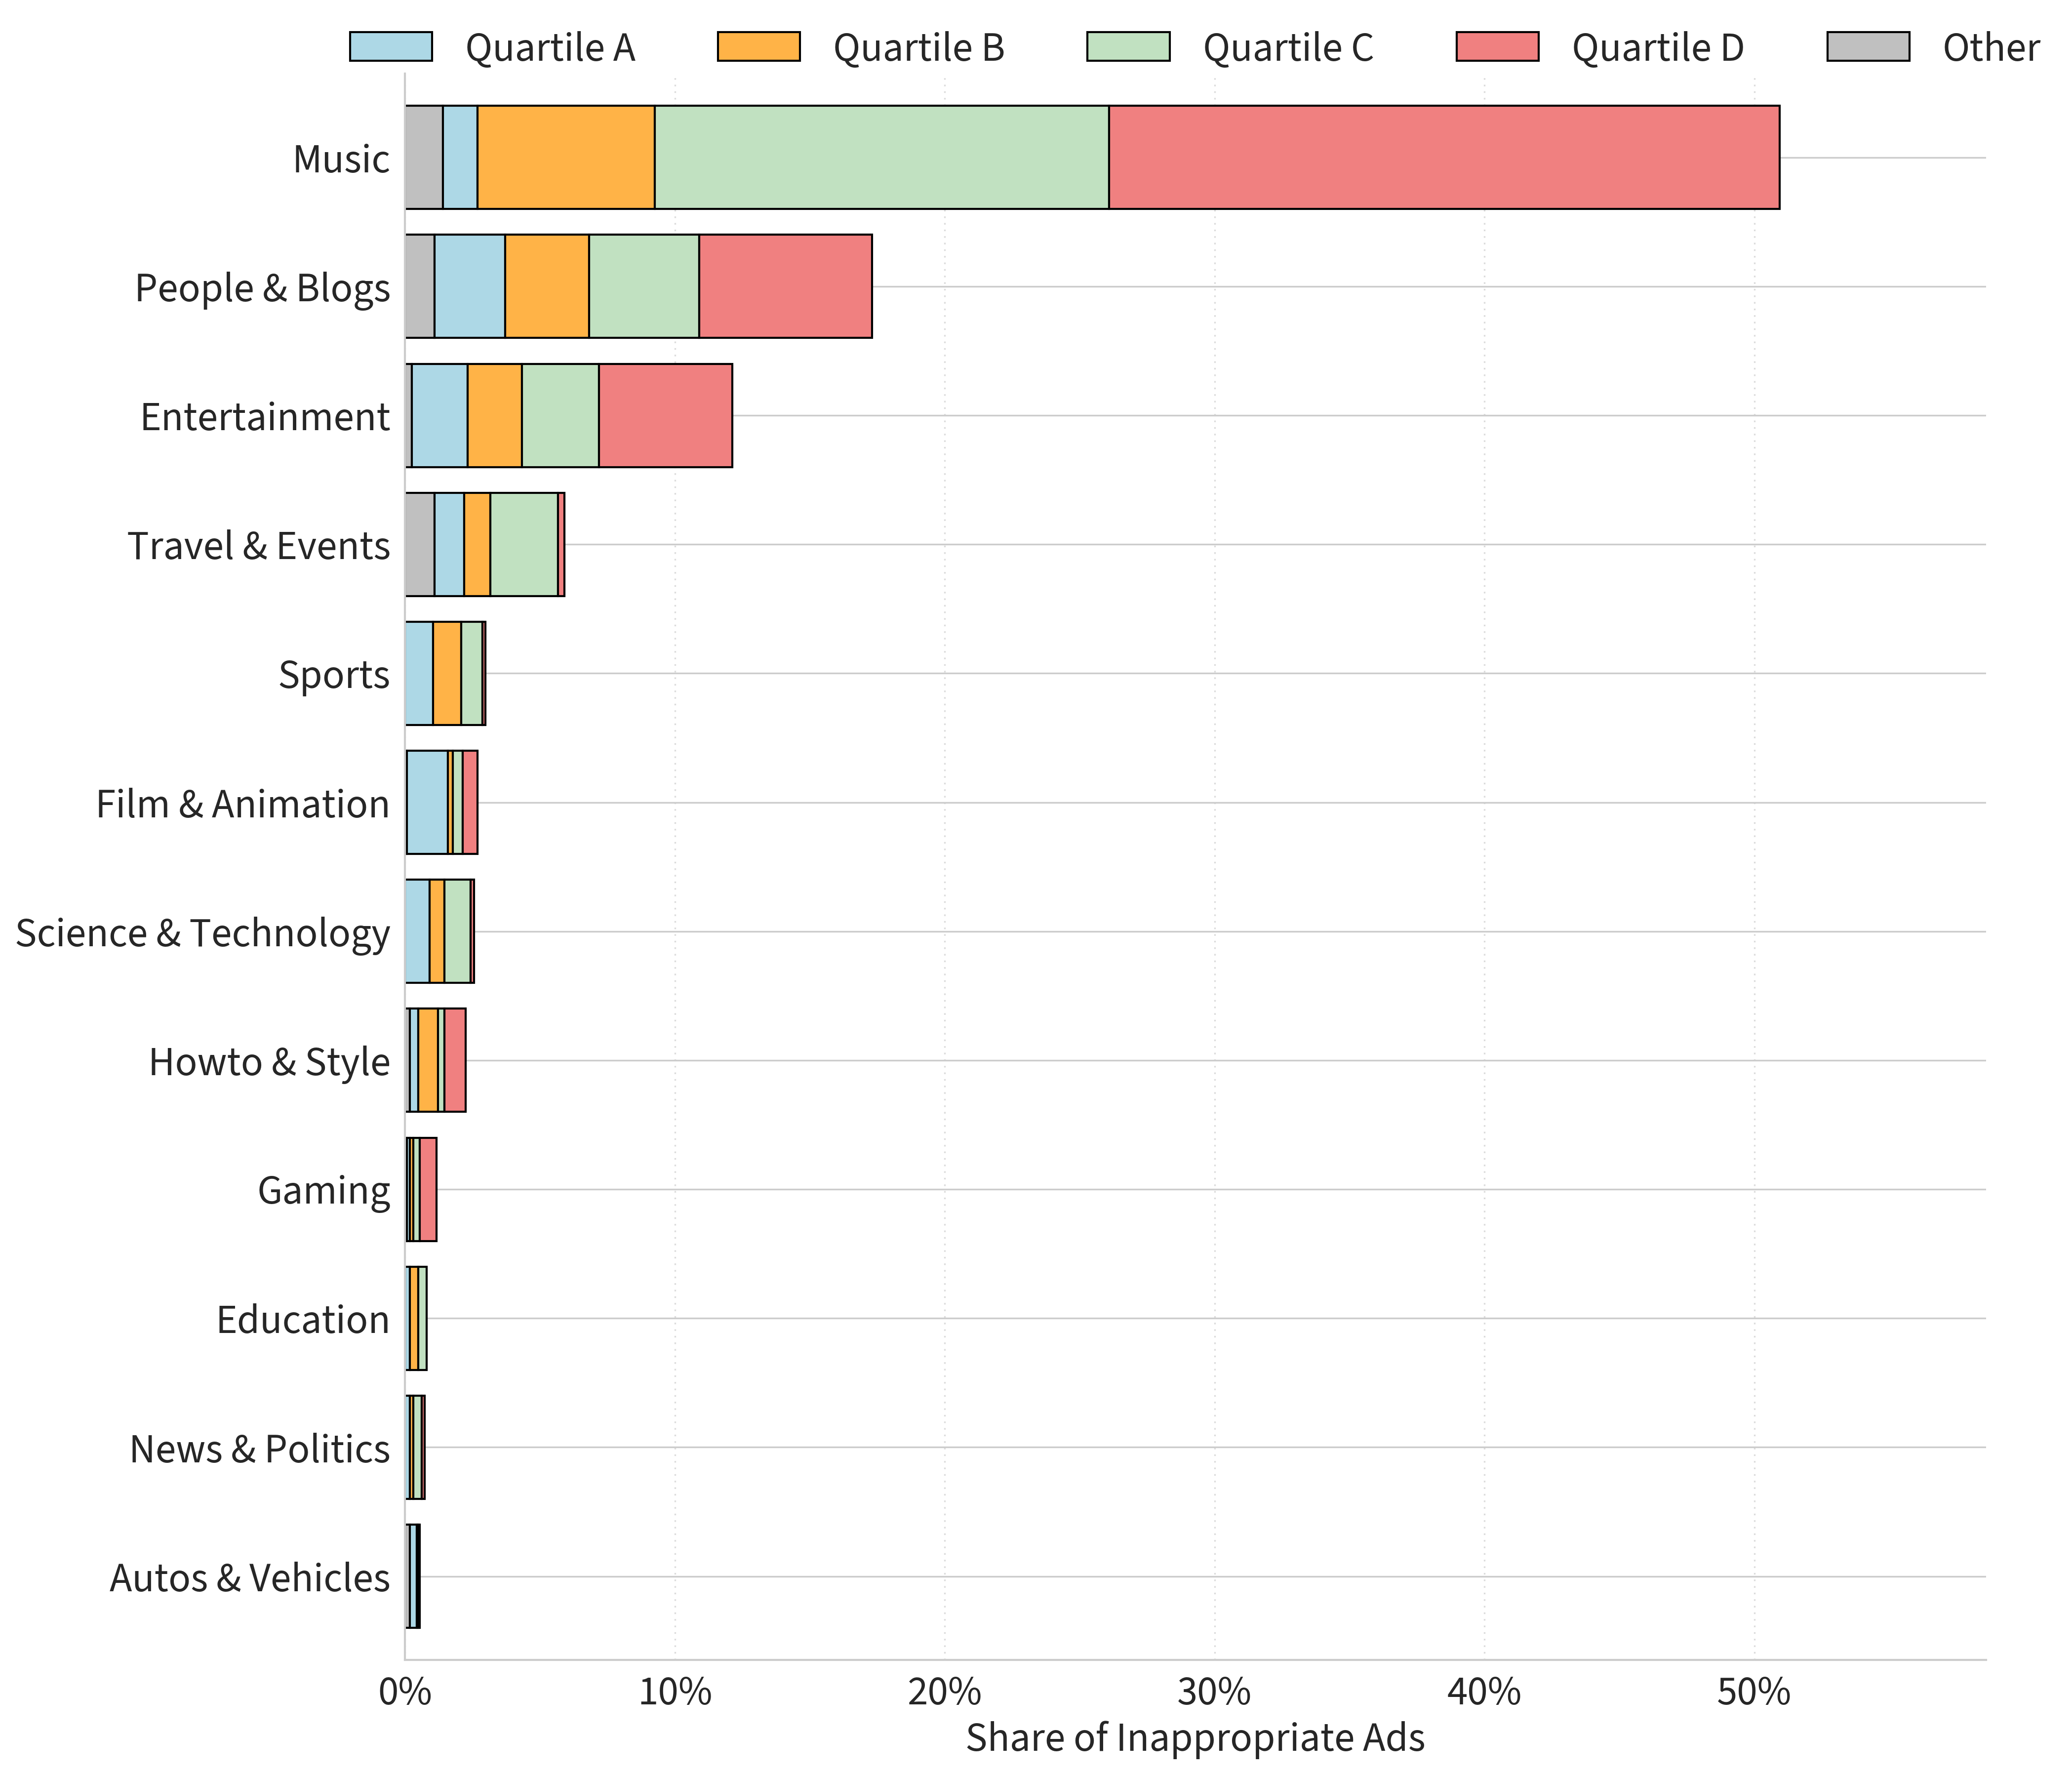

In [144]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


def plot_inappropriate_distribution_by_category(df: pd.DataFrame, country_col: str, min_sample_size: int = 50, save_path: str = None):
    """
    Analyzes and plots the distribution of inappropriate ads across categories,
    with each category's bar stacked by country quartile.
    The sum of all bars represents 100% of inappropriate ads.
    """
    # --- 1. Preprocessing and Quartile Mapping ---
    df_processed = df.copy()
    df_processed['Category Name'] = df_processed['Category Name'].fillna('Uncategorized').replace({'': 'Uncategorized'})
    
    quartiles = {
        'Quartile A': ['Singapore', 'Taiwan', 'South Korea', 'Germany', 'Spain', 'Canada', 'Sweden', 'United States'],
        'Quartile B': ['UAE', 'France', 'Belgium', 'Vietnam', 'Ireland', 'Mexico', 'Turkey', 'Pakistan'],
        'Quartile C': ['Bahrain', 'Lebanon', 'Lithuania', 'Latvia', 'Netherlands', 'Austria', 'Estonia', 'Morocco'],
        'Quartile D': ['Bulgaria', 'Algeria', 'Jordan', 'Sri Lanka', 'Bangladesh', 'Senegal', 'Ghana', 'Mozambique']
    }
    country_to_quartile = {country: q for q, countries in quartiles.items() for country in countries}
    df_processed['Quartile'] = df_processed[country_col].map(country_to_quartile).fillna('Other')

    # --- 2. Identify Valid Categories ---
    category_counts = df_processed['Category Name'].value_counts()
    valid_categories = category_counts[category_counts > min_sample_size].index
    
    if len(valid_categories) == 0:
        print(f"No categories found with more than {min_sample_size} total ads. Cannot generate plot.")
        return

    # --- 3. Calculate Distribution ---
    df_inappropriate = df_processed[
        df_processed['is_inappropriate'] & df_processed['Category Name'].isin(valid_categories)
    ].copy()

    total_inappropriate_ads = len(df_inappropriate)
    if total_inappropriate_ads == 0:
        print("No inappropriate ads found in the valid categories. Cannot generate plot.")
        return

    # --- 4. Prepare Data for Stacking ---
    quartile_counts = pd.crosstab(df_inappropriate['Category Name'], df_inappropriate['Quartile'])
    quartile_proportions = quartile_counts / total_inappropriate_ads
    quartile_proportions['total_proportion'] = quartile_proportions.sum(axis=1)
    quartile_proportions = quartile_proportions.sort_values('total_proportion', ascending=True)
    plot_data = quartile_proportions.drop(columns='total_proportion')
    
    # --- CHANGE 1: Using the same color palette as the previous chart ---
    quartile_colors = {
        'Quartile A': '#add8e6',    # Light Blue
        'Quartile B': '#ffb347',    # Orange
        'Quartile C': '#c1e1c1',    # Light Green
        'Quartile D': '#f08080',    # Light Coral
        'Other': 'silver'
    }
    plot_colors = [quartile_colors.get(q, 'grey') for q in plot_data.columns]

    # --- 5. Plotting ---
    fig, ax = plt.subplots(figsize=(14, 12))
    plot_data.plot(kind='barh', stacked=True, ax=ax, color=plot_colors, edgecolor='black', width=0.8)

    # --- 6. Style and Finalize ---
    ax.set_xlabel("Share of Inappropriate Ads")
    ax.set_ylabel("")
    ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0))
    ax.set_xlim(0, plot_data.sum(axis=1).max() * 1.15)
    ax.grid(axis='x', linestyle=(0, (1, 3)), linewidth=0.8, alpha=0.7)
    
    handles, labels = ax.get_legend_handles_labels()
    ordered_labels = [q for q in ['Quartile A', 'Quartile B', 'Quartile C', 'Quartile D', 'Other'] if q in plot_data.columns]
    label_map = dict(zip(labels, handles))
    ordered_handles = [label_map[label] for label in ordered_labels]
    
    ax.legend(
        ordered_handles, 
        ordered_labels, 
        loc='upper center',             
        bbox_to_anchor=(0.5, 1.05),    
        ncol=len(ordered_labels),       
        frameon=False,                  
        fontsize=20, 

    )
    
    # --- CHANGE 3: Adjust layout to prevent overlap ---
    fig.tight_layout()

    # --- 7. Save Figure ---
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)
        print(f"Plot saved to: {save_path}")

    plt.show()

plot_inappropriate_distribution_by_category(
    df=labeled_sample,
    country_col='Country',
    min_sample_size=50,
    save_path='inappropriate_ads_distribution_by_category.pdf'
)

Source Sans 3 font loaded successfully.
Plot saved to: categorical_proportions_horizontal.pdf


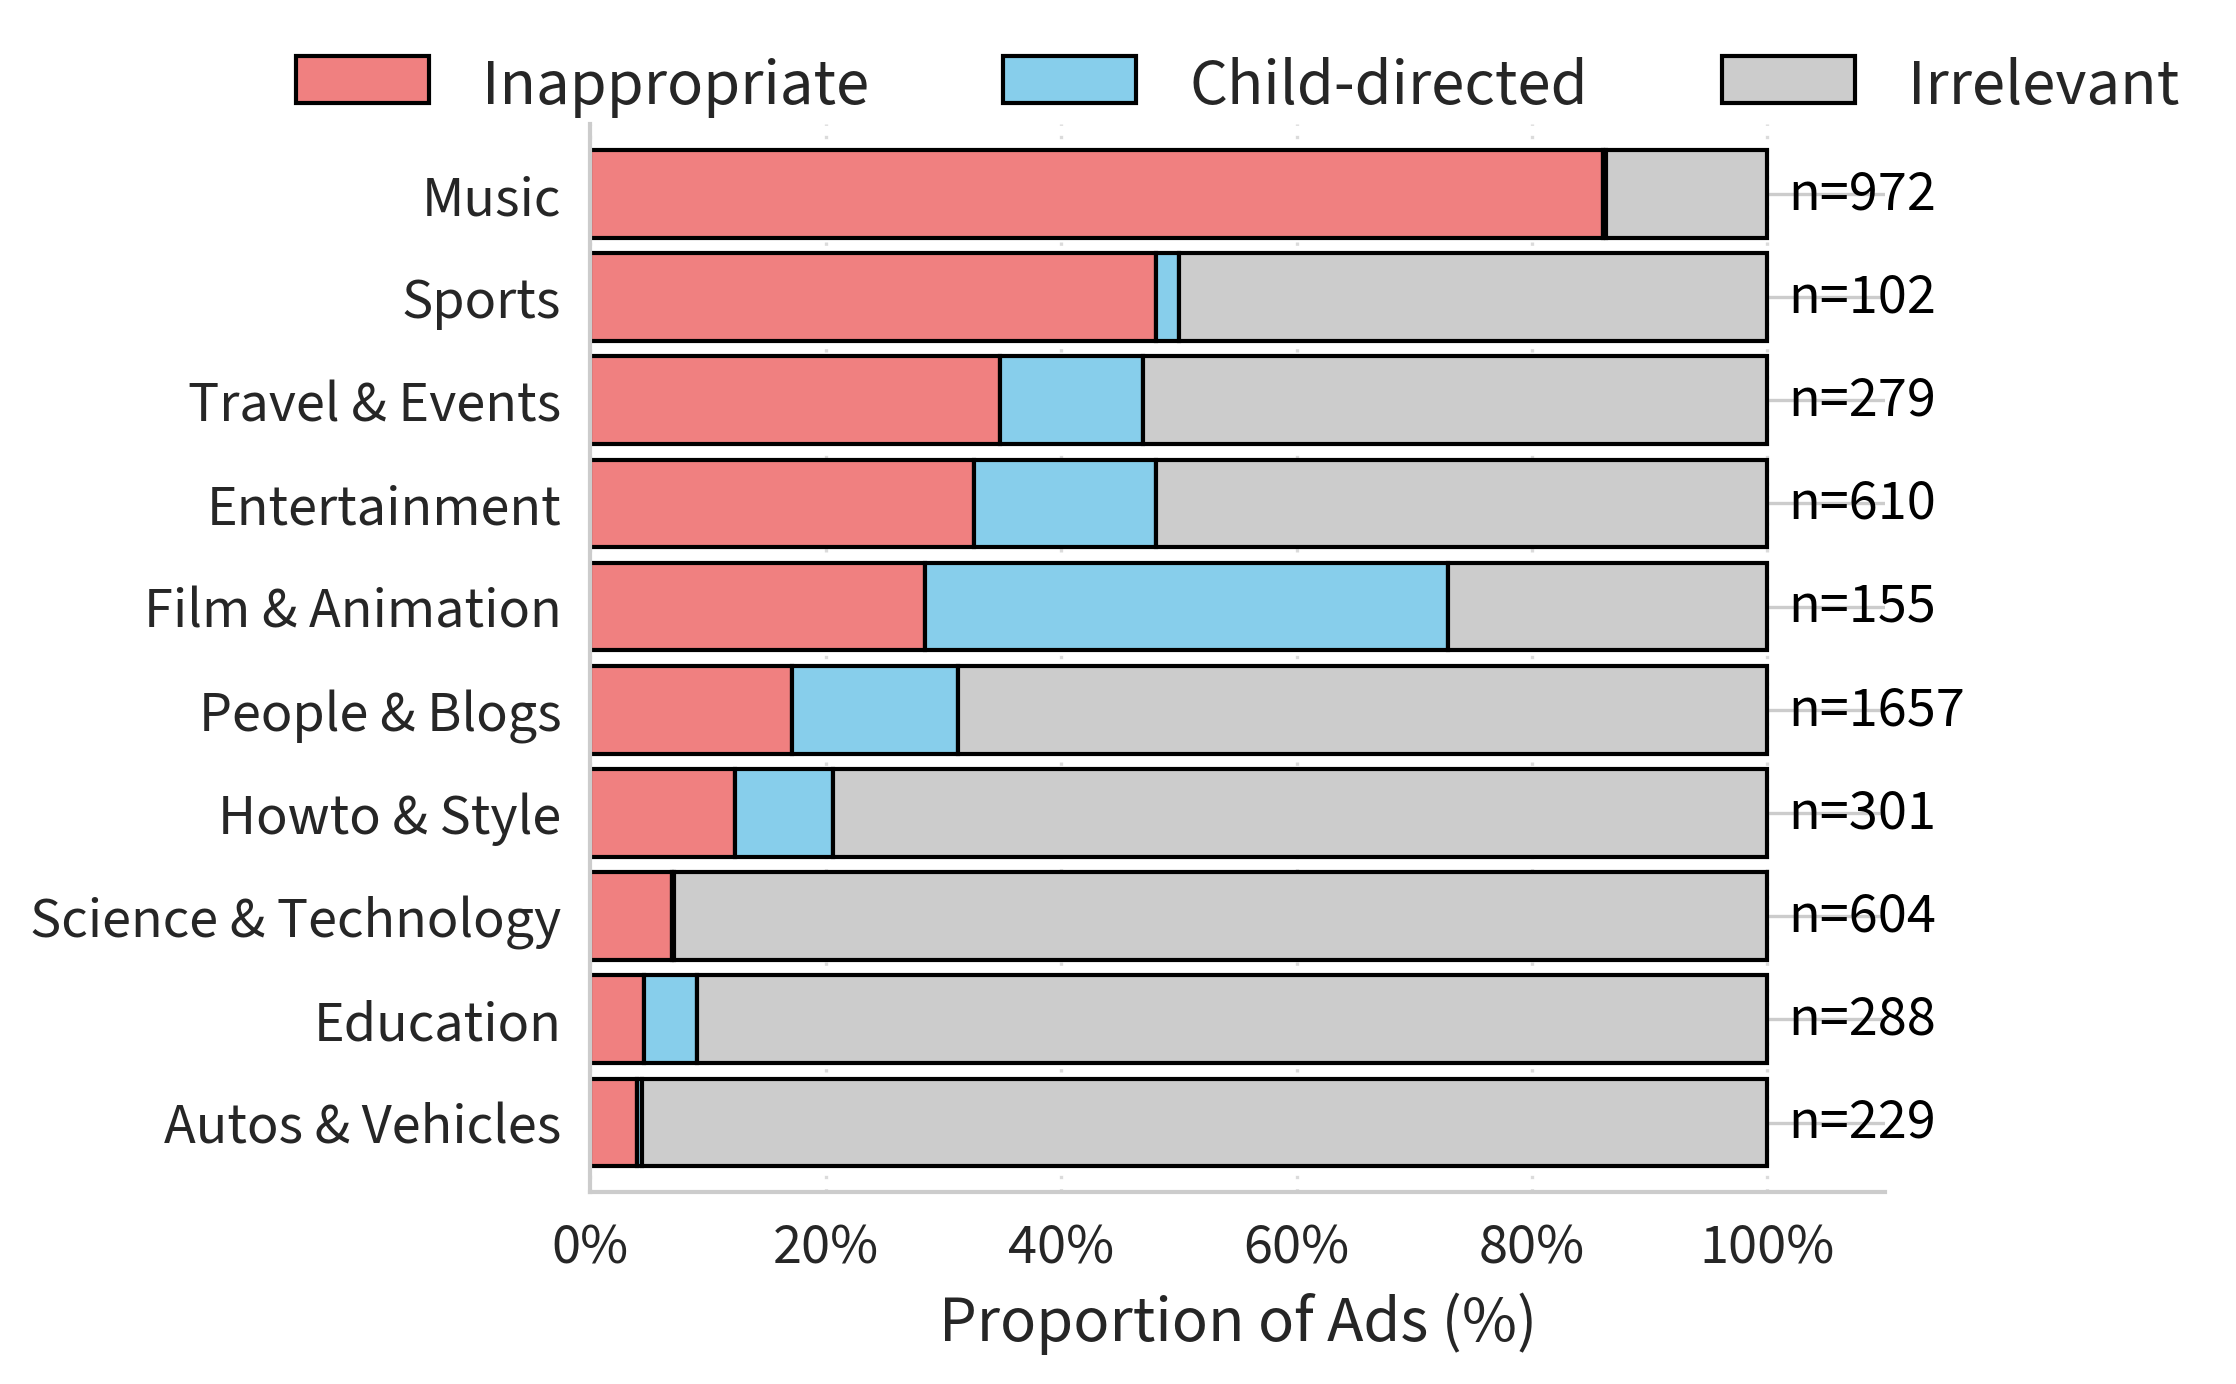

In [145]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



def plot_tag_proportion_stacked_by_category_horizontal(df: pd.DataFrame, min_sample_size: int = 50, save_path: str = None):
    """
    Analyzes and plots the proportion of tags WITHIN each category using a
    HORIZONTAL stacked bar chart with a custom stacking order.
    """
    # --- 1. Preprocessing and Feature Creation ---
    df_processed = df.copy()
    df_processed['Category Name'] = df_processed['Category Name'].fillna('Uncategorized').replace({'': 'Uncategorized'})
    df_processed['is_inappropriate'] = (df_processed['primary_tag'] == 'Inappropriate').astype(int)
    df_processed['is_child_directed'] = (df_processed['primary_tag'] == 'Child-directed').astype(int)

    # --- 2. Calculate Proportions PER Category ---
    summary = df_processed.groupby('Category Name').agg(
        inappropriate_count=('is_inappropriate', 'sum'),
        child_directed_count=('is_child_directed', 'sum'),
        total_count=('is_inappropriate', 'count')
    ).reset_index()

    summary_filtered = summary[summary['total_count'] >= min_sample_size].copy()
    if summary_filtered.empty:
        print(f"No categories found with at least {min_sample_size} ads. Cannot generate plot.")
        return

    summary_filtered['inappropriate_prop'] = summary_filtered['inappropriate_count'] / summary_filtered['total_count']
    summary_filtered['child_directed_prop'] = summary_filtered['child_directed_count'] / summary_filtered['total_count']
    summary_filtered['appropriate_prop'] = 1 - summary_filtered['inappropriate_prop'] - summary_filtered['child_directed_prop']

    # --- CHANGE 1: Sort ascending to have the highest bar at the top ---
    summary_filtered['risk_score'] = summary_filtered['inappropriate_prop']
    summary_filtered = summary_filtered.sort_values('risk_score', ascending=True)

    # --- 3. Prepare Data for Plotting ---
    plot_data = summary_filtered.set_index('Category Name')[['inappropriate_prop', 'child_directed_prop', 'appropriate_prop']]

    # --- 4. Plotting ---
    # Adjusted figsize to be taller
    fig, ax = plt.subplots(figsize=(7, 5))

    plot_colors = ['lightcoral', 'skyblue', '#cccccc']
    
    # --- CHANGE 2: Switched back to 'barh' ---
    plot_data.plot(kind='barh', stacked=True, ax=ax, color=plot_colors, edgecolor='black', width=0.85)

    # --- 5. Style and Finalize ---
    # --- CHANGE 3: Swapped axes labels and formatting ---
    ax.set_xlabel("Proportion of Ads (%)")
    ax.set_ylabel("")
    ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0))
    # Y-tick labels are now the category names, no rotation needed
    ax.grid(axis='x', linestyle=(0, (1, 3)), linewidth=0.8, alpha=0.7)
    
    # --- 6. Annotation logic for HORIZONTAL bars ---
    n_map = summary_filtered.set_index('Category Name')['total_count']
    for i, category_name in enumerate(plot_data.index):
        total_n = n_map.get(category_name, 0)
        n_text = f"n={total_n}"
        
        # Place text at y=i, and x=1.0 (right end of the stack)
        ax.annotate(
            n_text,
            xy=(1.0, i),
            xytext=(5, 0), # 5 points horizontal offset
            textcoords="offset points",
            ha='left',
            va='center',
            fontsize=14, # Slightly smaller for side-annotations
            color='black'
        )
    
    ax.set_xlim(0, 1.1)

    # --- 7. Customize Legend ---
    ax.legend(
        ['Inappropriate', 'Child-directed', 'Irrelevant'],
        loc='upper center', bbox_to_anchor=(0.5, 1.12),
        ncol=3, frameon=False, fontsize=16
    )
    
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # --- 8. Save Figure ---
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)
        print(f"Plot saved to: {save_path}")

    plt.show()

# Update the function call and save path
plot_tag_proportion_stacked_by_category_horizontal(
    df=labeled_sample,
    min_sample_size=100,
    save_path='categorical_proportions_horizontal.pdf'
)

Source Sans 3 font loaded successfully.
   Language_Clean  inappropriate_count  total_count  proportion Language_Full
0              ar                  338          435    0.777011        Arabic
1              bg                   45           82    0.548780     Bulgarian
4              de                   45          272    0.165441        German
6              en                  512         1814    0.282249       English
7              es                   24          191    0.125654       Spanish
10             fr                   36          133    0.270677        French
11             hi                   77           88    0.875000         Hindi
16             ko                  111          249    0.445783        Korean
18             lt                   16          114    0.140351    Lithuanian
19             lv                   15           77    0.194805       Latvian
22            nan                  130         1170    0.111111           N/A
24             nl       

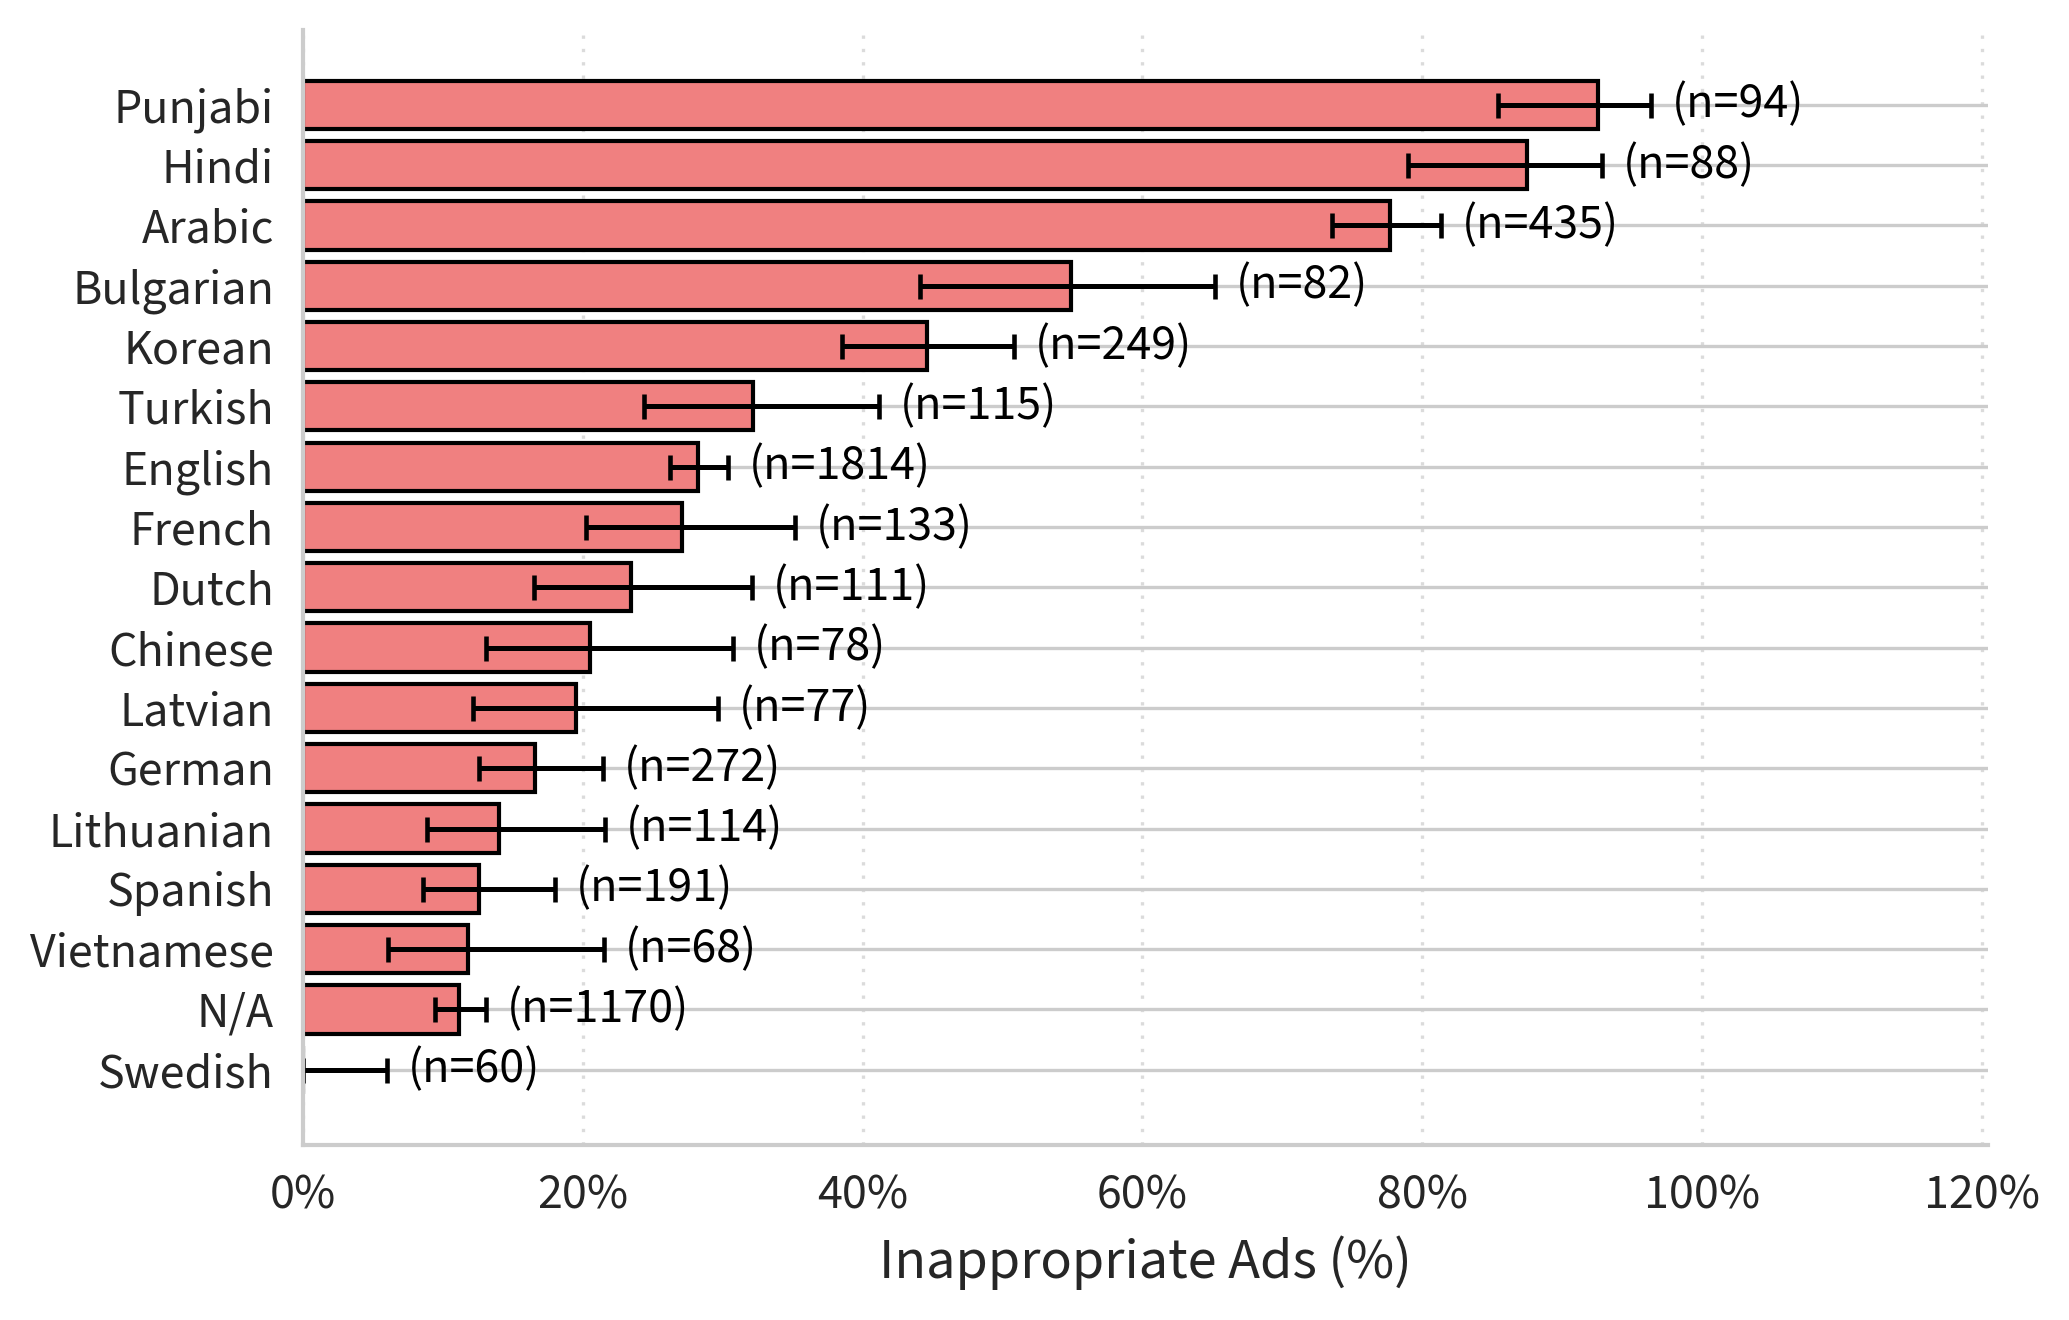

In [146]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.stats.proportion import proportion_confint



def plot_inappropriate_by_language_collated(df: pd.DataFrame, min_sample_size: int = 50, save_path: str = None):
    """
    Collates language dialects, plots the proportion of inappropriate ads using full language names,
    and annotates each bar with its sample size (n).
    """
    # --- 1. Preprocessing ---
    df_processed = df.copy()
    df_processed['Language_Clean'] = df_processed['Language'].astype(str).str.split('-').str[0]
    
    # --- 2. Data Aggregation ---
    summary = df_processed.groupby('Language_Clean').agg(
        inappropriate_count=('is_inappropriate', 'sum'),
        total_count=('is_inappropriate', 'count')
    ).reset_index()

    # --- 3. Filtering and Calculation ---
    summary_filtered = summary[summary['total_count'] > min_sample_size].copy()
    if summary_filtered.empty:
        print(f"No collated languages found with more than {min_sample_size} ads. Cannot generate plot.")
        return

    summary_filtered['proportion'] = summary_filtered['inappropriate_count'] / summary_filtered['total_count']
    
    # --- CHANGE 1: Create the language mapping dictionary ---
    language_map = {
        'pa': 'Punjabi', 'hi': 'Hindi', 'ar': 'Arabic', 'bg': 'Bulgarian',
        'ko': 'Korean', 'tr': 'Turkish', 'en': 'English', 'fr': 'French',
        'nl': 'Dutch', 'zh': 'Chinese', 'lv': 'Latvian', 'de': 'German',
        'lt': 'Lithuanian', 'es': 'Spanish', 'vi': 'Vietnamese', 'sv': 'Swedish',
        'nan': 'N/A' # Handle the 'nan' string from earlier
    }
    
    # Map the short codes to full names. Use the original code as a fallback.
    summary_filtered['Language_Full'] = summary_filtered['Language_Clean'].map(language_map).fillna(summary_filtered['Language_Clean'])

    print(summary_filtered)


    # --- 4. Calculate Confidence Intervals ---
    ci_low, ci_high = proportion_confint(
        count=summary_filtered['inappropriate_count'],
        nobs=summary_filtered['total_count'],
        method='wilson'
    )
    
    original_indices = summary_filtered.index
    summary_filtered = summary_filtered.sort_values('proportion', ascending=True)

    sorted_indices = summary_filtered.index
    ci_low_sorted = pd.Series(ci_low, index=original_indices).loc[sorted_indices]
    ci_high_sorted = pd.Series(ci_high, index=original_indices).loc[sorted_indices]
    
    errors = [
        summary_filtered['proportion'] - ci_low_sorted,
        ci_high_sorted - summary_filtered['proportion']
    ]

    # --- 5. Plotting ---
    fig, ax = plt.subplots(figsize=(7, 4.5))
    
    bars = ax.barh(
        summary_filtered['Language_Full'],
        summary_filtered['proportion'],
        xerr=errors,
        color='lightcoral',
        edgecolor='black',
        error_kw=dict(ecolor='black', lw=1.2, capsize=3, capthick=1.1)
    )

    for i, bar in enumerate(bars):
        sample_size = summary_filtered['total_count'].iloc[i]
        n_text = f"(n={sample_size})"
        
        x_pos = ci_high_sorted.iloc[i]
        y_pos = bar.get_y() + bar.get_height() / 2
        
        ax.annotate(
            n_text, xy=(x_pos, y_pos), xytext=(5, 0),
            textcoords="offset points", ha='left', va='center',
            color='black', fontsize=12
        )

    # --- 6. Style and Finalize ---
    ax.set_xlabel("Inappropriate Ads (%)")
    ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0))
    ax.set_xlim(0, max(ci_high_sorted) * 1.25)
    
    ax.grid(axis='x', linestyle=(0, (1, 3)), linewidth=0.8, alpha=0.7)
    fig.tight_layout()

    # --- 7. Save Figure ---
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)
        print(f"Plot saved to: {save_path}")

    plt.show()

plot_inappropriate_by_language_collated(
    df=labeled_sample,
    min_sample_size=50,
    save_path='language_proportions.pdf'
)

In [ ]:
df[df['Language'].isna()][['Country','Verified','Advertiser Location','Category Name','Language','Ad ID','primary_tag','secondary_tag']]['Category Name'].value_counts()

Category Name
People & Blogs           758
Science & Technology      84
Autos & Vehicles          70
Travel & Events           66
Entertainment             55
Howto & Style             53
Education                 27
Gaming                    26
News & Politics           12
Sports                     8
Music                      4
Comedy                     3
Film & Animation           2
Nonprofits & Activism      1
Name: count, dtype: int64

Figure saved to combined_ads_comparison_final_updated.pdf


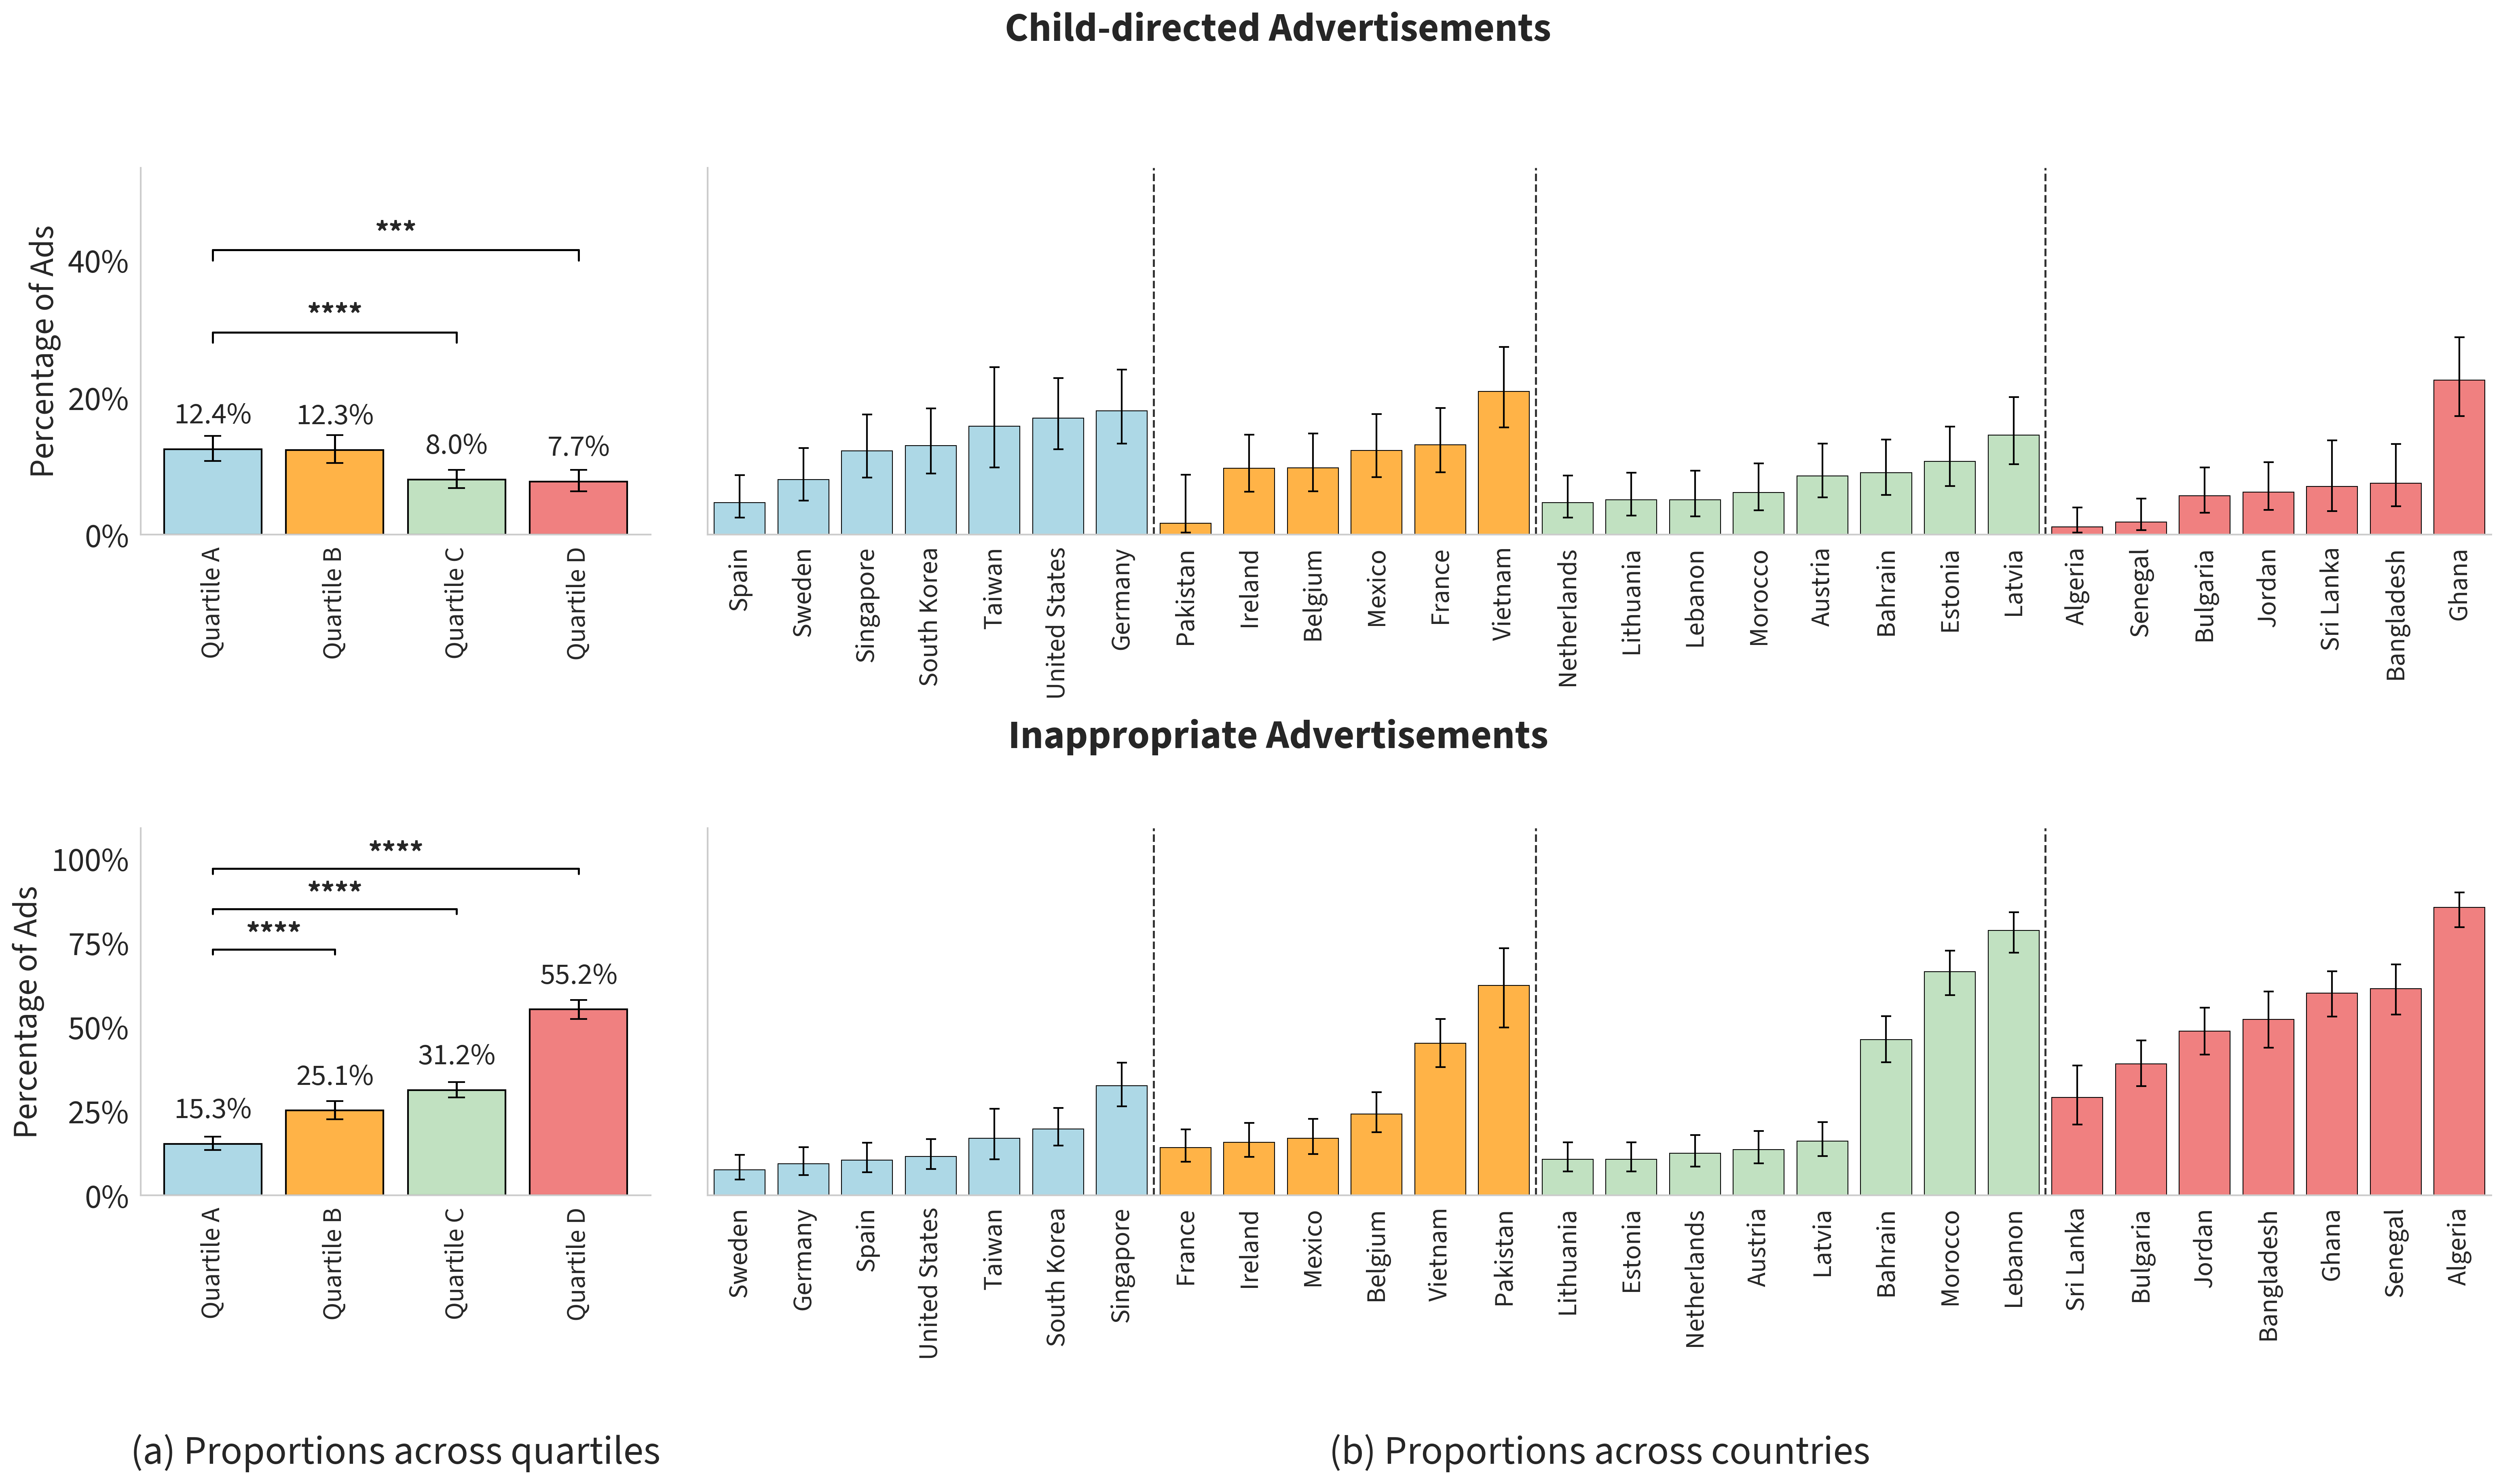

In [147]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
import matplotlib.gridspec as gridspec


# Helper function to draw significance brackets
def draw_sig_bracket(ax, x_start, x_end, y_level, text, tick_height=1.5):
    """
    Draws a significance bracket between two points on the plot.

    Args:
        ax: The matplotlib axes object to draw on.
        x_start (float): The starting x-coordinate (center of the first bar).
        x_end (float): The ending x-coordinate (center of the second bar).
        y_level (float): The y-coordinate for the horizontal line of the bracket.
        text (str): The significance annotation (e.g., '****').
        tick_height (float): The height of the vertical ticks on the bracket.
    """
    # Draw the horizontal line of the bracket
    ax.plot([x_start, x_end], [y_level, y_level], color='black', lw=1.2)
    # Draw the left vertical tick
    ax.plot([x_start, x_start], [y_level, y_level - tick_height], color='black', lw=1.2)
    # Draw the right vertical tick
    ax.plot([x_end, x_end], [y_level, y_level - tick_height], color='black', lw=1.2)
    
    # Place the significance text slightly above the horizontal line
    ax.text((x_start + x_end) / 2., y_level + 0.5, text, ha='center', va='bottom', fontsize=18, fontweight='bold')

def plot_combined_comparison(
    df: pd.DataFrame,
    ad_category_top: str,
    ad_category_bottom: str,
    save_path=None
):
    """
    Generates a single, wide figure with two vertically stacked panels.
    Each panel shows the percentage of an ad category by quartile (left) and country (right),
    with statistical significance annotations on the quartile plot.
    """
    # Create the main figure.
    fig = plt.figure(figsize=(25, 11))
    
    # hspace provides vertical spacing between the two rows of plots.
    outer_grid = gridspec.GridSpec(2, 1, figure=fig, hspace=0.8) # Increased hspace for titles

    quartiles = {
        'Quartile A': ['Singapore', 'Taiwan', 'South Korea', 'Germany', 'Spain', 'Sweden', 'United States'],
        'Quartile B': ['UAE', 'France', 'Belgium', 'Vietnam', 'Ireland', 'Mexico', 'Turkey', 'Pakistan'],
        'Quartile C': ['Bahrain', 'Lebanon', 'Lithuania', 'Latvia', 'Netherlands', 'Austria', 'Estonia', 'Morocco'],
        'Quartile D': ['Bulgaria', 'Algeria', 'Jordan', 'Sri Lanka', 'Bangladesh', 'Senegal', 'Ghana']
    }
    country_to_quartile = {country: q for q, countries in quartiles.items() for country in countries}
    quartile_order = ['Quartile A', 'Quartile B', 'Quartile C', 'Quartile D']
    quartile_colors = {'Quartile A': '#add8e6', 'Quartile B': '#ffb347', 'Quartile C': '#c1e1c1', 'Quartile D': '#f08080'}

    bottom_axes = []

    # Loop through the two ad categories
    for i, ad_category in enumerate([ad_category_top, ad_category_bottom]):
        # --- 1. Data Preparation ---
        df['Quartile'] = df['Country'].map(country_to_quartile)
        df_filtered = df.dropna(subset=['Quartile']).copy()
        df_filtered['is_target_category'] = (df_filtered['primary_tag'] == ad_category).astype(int)

        country_summary = df_filtered.groupby('Country').agg(Total_Ads=('Ad ID', 'count'), Target_Ads=('is_target_category', 'sum')).reset_index()
        country_summary['Percentage'] = (country_summary['Target_Ads'] / country_summary['Total_Ads']) * 100
        country_summary['Quartile'] = country_summary['Country'].map(country_to_quartile)
        ci_low_country, ci_high_country = proportion_confint(country_summary['Target_Ads'], country_summary['Total_Ads'], method='wilson')
        country_summary['y_err_lower'] = country_summary['Percentage'] - ci_low_country * 100
        country_summary['y_err_upper'] = ci_high_country * 100 - country_summary['Percentage']
        country_summary['Quartile'] = pd.Categorical(country_summary['Quartile'], categories=quartile_order, ordered=True)
        country_summary = country_summary.sort_values(by=['Quartile', 'Percentage'], ascending=[True, True]).reset_index(drop=True)

        quartile_summary = df_filtered.groupby('Quartile').agg(Total_Ads=('Ad ID', 'count'), Target_Ads=('is_target_category', 'sum')).reindex(quartile_order)
        quartile_summary['Percentage'] = (quartile_summary['Target_Ads'] / quartile_summary['Total_Ads']) * 100
        ci_low_q, ci_high_q = proportion_confint(quartile_summary['Target_Ads'], quartile_summary['Total_Ads'], method='wilson')
        y_err_q = [quartile_summary['Percentage'] - ci_low_q * 100, ci_high_q * 100 - quartile_summary['Percentage']]

        # --- 2. Create a nested GridSpec ---
        # CHANGE 1: Swap plot order by changing width_ratios
        inner_grid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_grid[i], width_ratios=[1, 3.5], wspace=0.05)
        ax1 = fig.add_subplot(inner_grid[0]) # ax1 is now the left (quartile) plot
        ax2 = fig.add_subplot(inner_grid[1], sharey=ax1) # ax2 is the right (country) plot

        if i == 1:
             bottom_axes.extend([ax1, ax2])

        # Add a single title for the entire row of subplots
        row_y_pos = 0.97 if i == 0 else 0.44
        fig.text(0.5, row_y_pos, f'{ad_category} Advertisements', ha='center', va='bottom', fontsize=24, fontweight='bold')

        # --- 3. Plotting ---
        # Left Plot: Per-Quartile
        ax1.bar(quartile_summary.index, quartile_summary['Percentage'], yerr=y_err_q, color=[quartile_colors[q] for q in quartile_order], edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5))
        
        for p in ax1.patches:
            height = p.get_height()
            ax1.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=18)
        
        ax1.set_ylabel("Percentage of Ads")
        ax1.tick_params(axis='x', rotation=90, labelsize=16)
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
        ax1.grid(False)

        # CHANGE 2: Add statistical significance brackets
        max_h = (quartile_summary['Percentage'] + pd.Series(y_err_q[1], index=quartile_summary.index)).max()
        y_start = max_h + 15  # Start drawing brackets above the tallest bar/errorbar
        y_increment = 12      # Vertical spacing between brackets
        
        comparisons = [('Quartile A', 'Quartile B'), ('Quartile A', 'Quartile C'), ('Quartile A', 'Quartile D')]
        quartile_x_pos = {q: i for i, q in enumerate(quartile_order)}
        
        for ref_q, comp_q in comparisons:
            if ref_q not in quartile_summary.index or comp_q not in quartile_summary.index: continue
            
            ref_counts = quartile_summary.loc[ref_q]
            comp_counts = quartile_summary.loc[comp_q]

            stat, pval = proportions_ztest([ref_counts['Target_Ads'], comp_counts['Target_Ads']],
                                           [ref_counts['Total_Ads'], comp_counts['Total_Ads']])

            if pval < 0.0001: sig_text = '****'
            elif pval < 0.001: sig_text = '***'
            elif pval < 0.01: sig_text = '**'
            elif pval < 0.05: sig_text = '*'
            else: continue # Don't draw a bracket if p >= 0.05 (which satisfies p<0.1 requirement)

            draw_sig_bracket(ax1, quartile_x_pos[ref_q], quartile_x_pos[comp_q], y_start, sig_text)
            y_start += y_increment
            
        ax1.set_ylim(top=y_start) # Adjust y-axis limit to fit annotations

        # Right Plot: Per-Country
        country_palette_list = country_summary['Quartile'].map(quartile_colors).tolist()
        ax2.bar(country_summary['Country'], country_summary['Percentage'], color=country_palette_list, edgecolor='black', linewidth=0.5)
        ax2.errorbar(x=np.arange(len(country_summary)), y=country_summary['Percentage'], yerr=[country_summary['y_err_lower'], country_summary['y_err_upper']], fmt='none', ecolor='black', capsize=3, lw=1)
        
        ax2.tick_params(axis='x', rotation=90, labelsize=16)
        plt.setp(ax2.get_yticklabels(), visible=False)
        ax2.grid(False)
        
        q_values = country_summary['Quartile'].values
        change_indices = np.flatnonzero(q_values[:-1] != q_values[1:])
        for idx in change_indices:
            ax2.axvline(x=idx + 0.5, color='black', linestyle='--', linewidth=1.2, alpha=0.8)
        
        ax2.set_xlim(-0.5, len(country_summary) - 0.5)

    # CHANGE 3: Swap subcaption labels
    bottom_axes[0].text(0.5, -0.65, '(a) Proportions across quartiles', ha='center', va='top', transform=bottom_axes[0].transAxes, fontsize=24)
    bottom_axes[1].text(0.5, -0.65, '(b) Proportions across countries', ha='center', va='top', transform=bottom_axes[1].transAxes, fontsize=24)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)
        print(f"Figure saved to {save_path}")

    plt.show()

# This function call creates the combined plot with all the requested changes.
plot_combined_comparison(
    df=labeled_sample,
    ad_category_top='Child-directed',
    ad_category_bottom='Inappropriate',
    save_path='combined_ads_comparison_final_updated.pdf'
)

Figure saved to combined_advertiser_analysis.pdf


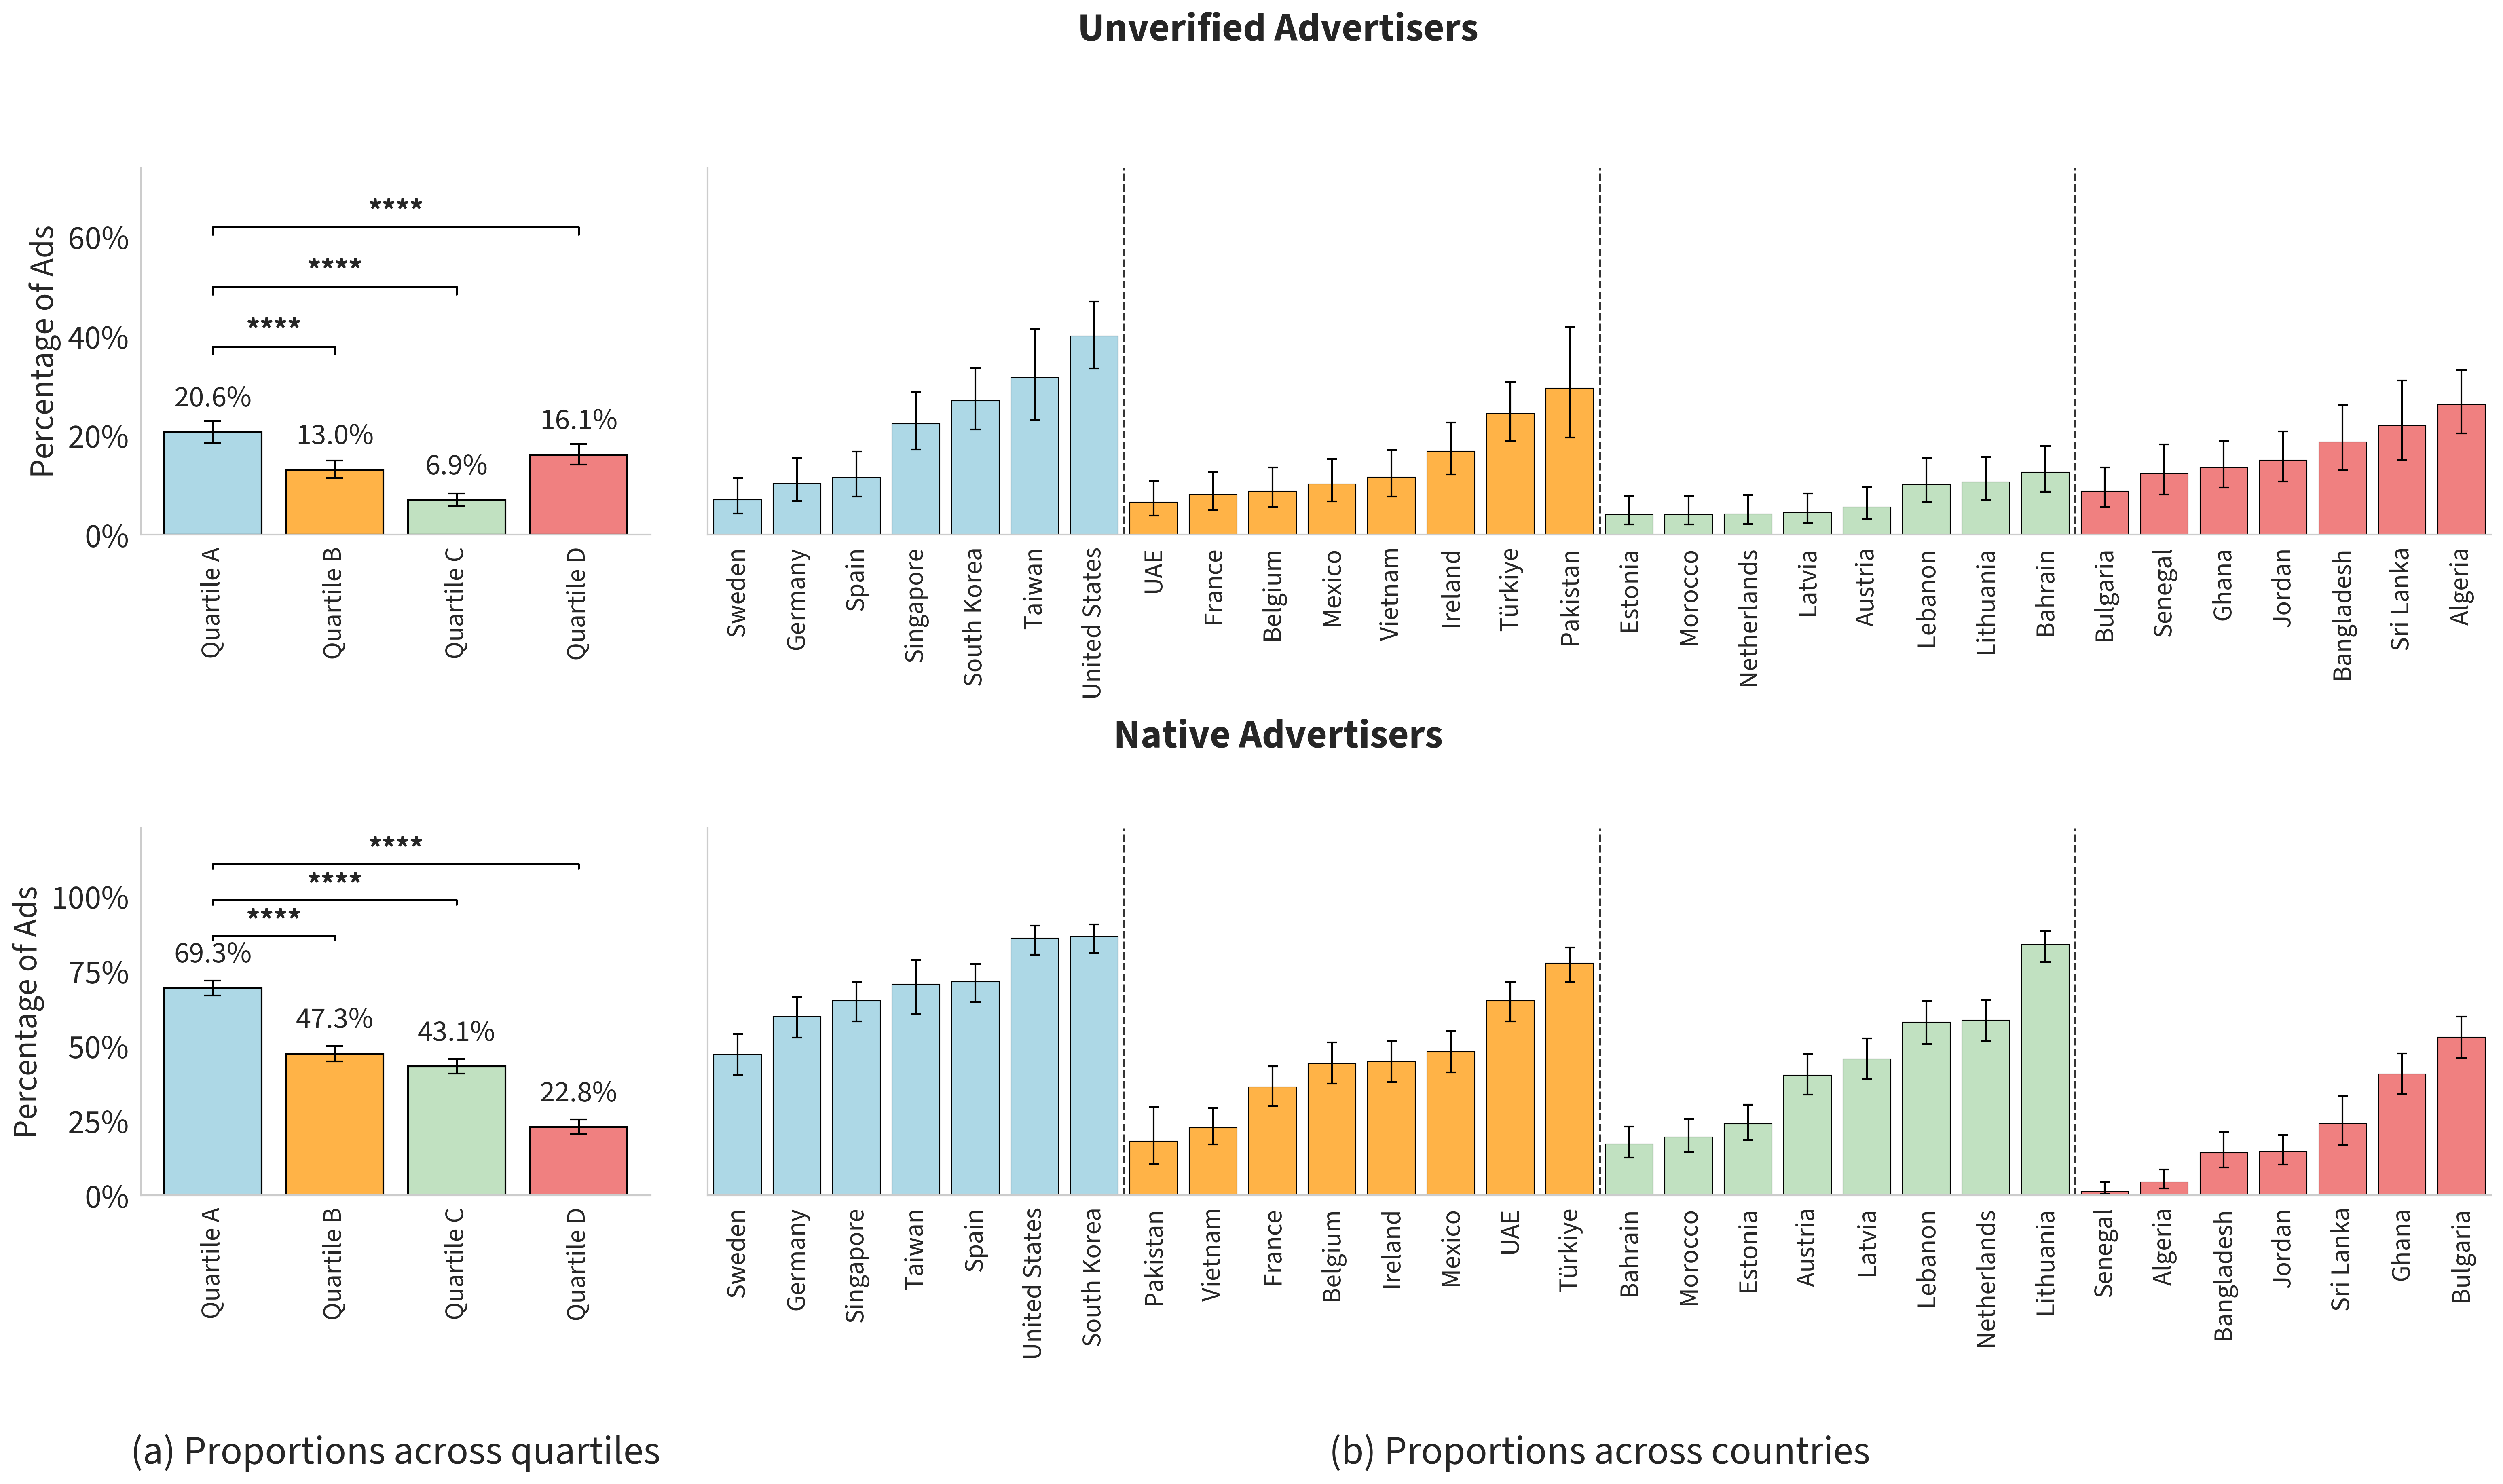

In [148]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
import matplotlib.gridspec as gridspec

# Helper function to draw significance brackets
def draw_sig_bracket(ax, x_start, x_end, y_level, text, tick_height=1.5):
    """Draws a significance bracket between two points on the plot."""
    ax.plot([x_start, x_end], [y_level, y_level], color='black', lw=1.2)
    ax.plot([x_start, x_start], [y_level, y_level - tick_height], color='black', lw=1.2)
    ax.plot([x_end, x_end], [y_level, y_level - tick_height], color='black', lw=1.2)
    ax.text((x_start + x_end) / 2., y_level + 0.5, text, ha='center', va='bottom', fontsize=18, fontweight='bold')

def plot_combined_advertiser_analysis(df: pd.DataFrame, save_path=None):
    """
    Generates a single figure with two vertically stacked panels for 'Unverified'
    and 'Native' advertiser metrics, each showing quartile and country-level data.
    """
    # Create the main figure.
    fig = plt.figure(figsize=(25, 11))
    
    # hspace provides vertical spacing between the two rows of plots.
    outer_grid = gridspec.GridSpec(2, 1, figure=fig, hspace=0.8)

    quartiles = {
        'Quartile A': ['Singapore', 'Taiwan', 'South Korea', 'Germany', 'Spain', 'Sweden', 'United States'],
        'Quartile B': ['United Arab Emirates', 'France', 'Belgium', 'Vietnam', 'Ireland', 'Mexico', 'Türkiye', 'Pakistan'],
        'Quartile C': ['Bahrain', 'Lebanon', 'Lithuania', 'Latvia', 'Netherlands', 'Austria', 'Estonia', 'Morocco'],
        'Quartile D': ['Bulgaria', 'Algeria', 'Jordan', 'Sri Lanka', 'Bangladesh', 'Senegal', 'Ghana']
    }
    country_to_quartile = {country: q for q, countries in quartiles.items() for country in countries}
    quartile_order = ['Quartile A', 'Quartile B', 'Quartile C', 'Quartile D']
    quartile_colors = {'Quartile A': '#add8e6', 'Quartile B': '#ffb347', 'Quartile C': '#c1e1c1', 'Quartile D': '#f08080'}

    bottom_axes = []

    # Define the two analyses to perform in the loop
    analyses = [
        {'column': 'Verified', 'title': 'Unverified Advertisers', 'invert': True},
        {'column': 'Native Advertiser', 'title': 'Native Advertisers', 'invert': False}
    ]

    for i, analysis_params in enumerate(analyses):
        # --- 1. Data Preparation ---
        df['Quartile'] = df['Country'].map(country_to_quartile)
        df_filtered = df.dropna(subset=['Quartile']).copy()

        # Use the logic from plot_quartile_metric to define the target for analysis
        if analysis_params['invert']:
            df_filtered['is_target'] = (~df_filtered[analysis_params['column']]).astype(int)
        else:
            df_filtered['is_target'] = df_filtered[analysis_params['column']].astype(int)

        # Country-level summary
        country_summary = df_filtered.groupby('Country').agg(Total_Ads=('Ad ID', 'count'), Target_Ads=('is_target', 'sum')).reset_index()
        country_summary['Percentage'] = (country_summary['Target_Ads'] / country_summary['Total_Ads']) * 100
        country_summary['Quartile'] = country_summary['Country'].map(country_to_quartile)
        ci_low_country, ci_high_country = proportion_confint(country_summary['Target_Ads'], country_summary['Total_Ads'], method='wilson')
        country_summary['y_err_lower'] = country_summary['Percentage'] - ci_low_country * 100
        country_summary['y_err_upper'] = ci_high_country * 100 - country_summary['Percentage']
        country_summary['Quartile'] = pd.Categorical(country_summary['Quartile'], categories=quartile_order, ordered=True)
        country_summary = country_summary.sort_values(by=['Quartile', 'Percentage'], ascending=[True, True]).reset_index(drop=True)

        # Quartile-level summary
        quartile_summary = df_filtered.groupby('Quartile').agg(Total_Ads=('Ad ID', 'count'), Target_Ads=('is_target', 'sum')).reindex(quartile_order)
        quartile_summary['Percentage'] = (quartile_summary['Target_Ads'] / quartile_summary['Total_Ads']) * 100
        ci_low_q, ci_high_q = proportion_confint(quartile_summary['Target_Ads'], quartile_summary['Total_Ads'], method='wilson')
        y_err_q = [quartile_summary['Percentage'] - ci_low_q * 100, ci_high_q * 100 - quartile_summary['Percentage']]

        # --- 2. Create a nested GridSpec ---
        inner_grid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_grid[i], width_ratios=[1, 3.5], wspace=0.05)
        ax1 = fig.add_subplot(inner_grid[0]) # Quartile plot
        ax2 = fig.add_subplot(inner_grid[1], sharey=ax1) # Country plot

        if i == 1:
             bottom_axes.extend([ax1, ax2])

        # Add a single title for the entire row
        row_y_pos = 0.97 if i == 0 else 0.44
        fig.text(0.5, row_y_pos, analysis_params['title'], ha='center', va='bottom', fontsize=24, fontweight='bold')

        # --- 3. Plotting ---
        # Left Plot: Per-Quartile
        ax1.bar(quartile_summary.index, quartile_summary['Percentage'], yerr=y_err_q, color=[quartile_colors[q] for q in quartile_order], edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5))
        
        for p in ax1.patches:
            height = p.get_height()
            ax1.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=18)
        
        ax1.set_ylabel("Percentage of Ads")
        ax1.tick_params(axis='x', rotation=90, labelsize=16)
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
        ax1.grid(False)

        # Add statistical significance brackets
        max_h = (quartile_summary['Percentage'] + pd.Series(y_err_q[1], index=quartile_summary.index)).max()
        y_start = max_h + 15
        y_increment = 12
        
        comparisons = [('Quartile A', 'Quartile B'), ('Quartile A', 'Quartile C'), ('Quartile A', 'Quartile D')]
        quartile_x_pos = {q: i for i, q in enumerate(quartile_order)}
        
        for ref_q, comp_q in comparisons:
            if ref_q not in quartile_summary.index or comp_q not in quartile_summary.index: continue
            
            ref_counts = quartile_summary.loc[ref_q]
            comp_counts = quartile_summary.loc[comp_q]

            stat, pval = proportions_ztest([ref_counts['Target_Ads'], comp_counts['Total_Ads']],
                                           [ref_counts['Total_Ads'], comp_counts['Total_Ads']])

            if pval < 0.0001: sig_text = '****'
            elif pval < 0.001: sig_text = '***'
            elif pval < 0.01: sig_text = '**'
            elif pval < 0.05: sig_text = '*'
            else: continue

            draw_sig_bracket(ax1, quartile_x_pos[ref_q], quartile_x_pos[comp_q], y_start, sig_text)
            y_start += y_increment
            
        ax1.set_ylim(top=y_start)

        # Right Plot: Per-Country
        country_palette_list = country_summary['Quartile'].map(quartile_colors).tolist()
        country_summary['Country'] = country_summary['Country'].str.replace('United Arab Emirates', 'UAE')

        ax2.bar(country_summary['Country'], country_summary['Percentage'], color=country_palette_list, edgecolor='black', linewidth=0.5)
        ax2.errorbar(x=np.arange(len(country_summary)), y=country_summary['Percentage'], yerr=[country_summary['y_err_lower'], country_summary['y_err_upper']], fmt='none', ecolor='black', capsize=3, lw=1)
        
        ax2.tick_params(axis='x', rotation=90, labelsize=16)
        plt.setp(ax2.get_yticklabels(), visible=False)
        ax2.grid(False)
        
        q_values = country_summary['Quartile'].values
        change_indices = np.flatnonzero(q_values[:-1] != q_values[1:])
        for idx in change_indices:
            ax2.axvline(x=idx + 0.5, color='black', linestyle='--', linewidth=1.2, alpha=0.8)
        
        ax2.set_xlim(-0.5, len(country_summary) - 0.5)

    # --- Final Touches ---
    bottom_axes[0].text(0.5, -0.65, '(a) Proportions across quartiles', ha='center', va='top', transform=bottom_axes[0].transAxes, fontsize=24)
    bottom_axes[1].text(0.5, -0.65, '(b) Proportions across countries', ha='center', va='top', transform=bottom_axes[1].transAxes, fontsize=24)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)
        print(f"Figure saved to {save_path}")

    plt.show()

df['Country'] = df['Country'].replace({'Turkey':'Türkiye', 'UAE':'United Arab Emirates'})
df['Native Advertiser'] = df.apply(lambda x: x['Advertiser Location'] == x['Country'], axis=1)


# --- Generate the combined plot ---
plot_combined_advertiser_analysis(
    df=labeled_sample,
    save_path='combined_advertiser_analysis.pdf'
)

In [ ]:
labeled_sample[(labeled_sample['Country']=='Ghana')]['Ad ID'].nunique()

51

In [ ]:
(labeled_sample[
    (labeled_sample['Country'] == 'Ghana') &
    (labeled_sample['primary_tag'] == 'Child-directed')
])['Ad ID'].nunique()


12

Source Sans 3 font loaded successfully.
Plot saved to: ad_uniqueness_ratio_by_country.pdf


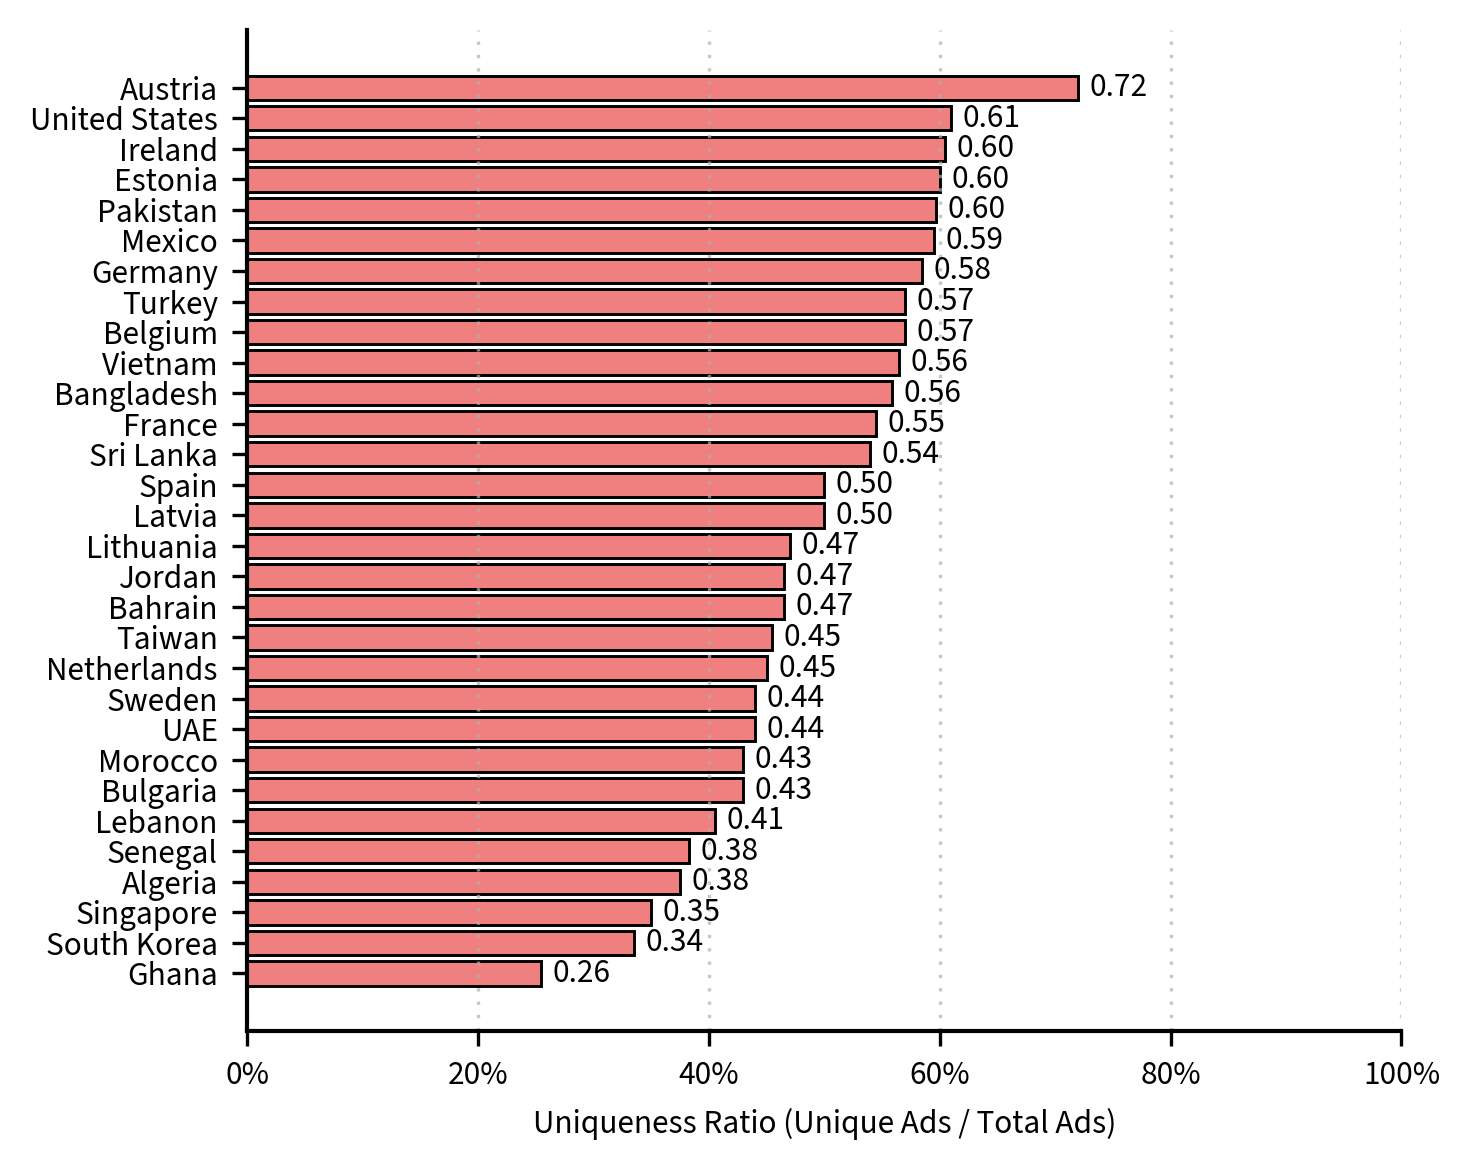

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



def plot_uniqueness_ratio(df: pd.DataFrame, save_path: str = None):
    """
    Calculates and plots the ad uniqueness ratio per country in a
    professional, horizontal bar chart format.
    """
    # --- 1. Data Aggregation and Calculation ---
    # Group by country and get both unique and total counts
    uniqueness_summary = df.groupby('Country')['Ad ID'].agg(
        unique_ads='nunique',
        total_ads='count'
    ).reset_index()

    # Calculate the uniqueness ratio
    uniqueness_summary['uniqueness_ratio'] = uniqueness_summary['unique_ads'] / uniqueness_summary['total_ads']

    # Sort by the ratio for a clean, ordered plot
    uniqueness_summary = uniqueness_summary.sort_values('uniqueness_ratio', ascending=True)

    # --- 2. Plotting ---
    fig, ax = plt.subplots(figsize=(5, 4))

    ax.barh(
        uniqueness_summary['Country'],
        uniqueness_summary['uniqueness_ratio'],
        color='lightcoral',
        edgecolor='black',
        linewidth=0.7
    )

    # --- 3. Style and Finalize ---
    # NO TITLE as per request
    
    ax.set_xlabel("Uniqueness Ratio (Unique Ads / Total Ads)")
    # ax.set_ylabel("Country")

    # Format x-axis as percentages for intuitive reading
    ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1.0))
    ax.set_xlim(0, 1.0) # Ratio is between 0 and 1

    # Add subtle gridlines, styled like the reference plot
    ax.grid(axis='x', linestyle=(0, (1, 3)), linewidth=0.8, alpha=0.7)
    
    # Annotate bars with their precise ratio values
    for bar in ax.patches:
        width = bar.get_width()
        ax.text(
            width + ax.get_xlim()[1] * 0.01, # Position text to the right of the bar
            bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}', # Display ratio with 2 decimal places
            va='center',
            ha='left',
            fontsize=8
        )

    fig.tight_layout()

    # --- 4. Save Figure ---
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)
        print(f"Plot saved to: {save_path}")

    plt.show()


# Call the new plotting function
plot_uniqueness_ratio(
    df=labeled_sample,
    save_path='ad_uniqueness_ratio_by_country.pdf'
)

### Sankey

In [ ]:
sankey_data = df[df['primary_tag']=='Inappropriate']
display(sankey_data['Country'].value_counts())

counts = sankey_data['Country'].value_counts()

# Keep only countries with more than 30
filtered = sankey_data[sankey_data['Country'].isin(counts[counts > 30].index)]
filtered_countries = filtered['Country'].tolist()
display(filtered.value_counts('Country'))


Country
Algeria          153
Lebanon          140
Morocco          130
Ghana            120
Senegal          100
Jordan            94
Bahrain           92
Vietnam           82
Bulgaria          76
Bangladesh        70
Singapore         64
Turkey            62
Belgium           47
Pakistan          38
South Korea       38
Mexico            33
Latvia            32
Ireland           31
Sri Lanka         29
France            28
Austria           27
Netherlands       24
United States     23
Estonia           21
Lithuania         21
Spain             20
Germany           18
Taiwan            16
Sweden            15
UAE               15
Name: count, dtype: int64

Country
Algeria        153
Lebanon        140
Morocco        130
Ghana          120
Senegal        100
Jordan          94
Bahrain         92
Vietnam         82
Bulgaria        76
Bangladesh      70
Singapore       64
Turkey          62
Belgium         47
Pakistan        38
South Korea     38
Mexico          33
Latvia          32
Ireland         31
Name: count, dtype: int64

In [ ]:

filtered = sankey_data[sankey_data['Country'].isin(filtered_countries)]
paired_counts = filtered.groupby(['Advertiser Location', 'Country']).size().reset_index(name='count')
paired_counts_sorted = paired_counts.sort_values(by='count', ascending=False)

# Print the resulting CSV to the console.
display(paired_counts_sorted.head(20))

Advertiser Location      Country  count
100               Lebanon      Lebanon     86
55                  Ghana        Ghana     59
141             Singapore    Singapore     53
101               Lebanon      Morocco     52
169               Türkiye       Turkey     50
23                Ecuador      Algeria     47
99                Lebanon       Jordan     41
12               Bulgaria     Bulgaria     39
152           South Korea  South Korea     35
174  United Arab Emirates      Bahrain     31
97                Lebanon      Algeria     28
191         United States        Ghana     26
151           South Korea      Senegal     24
198         United States      Senegal     23
123               Morocco      Morocco     22
29                Ecuador      Lebanon     21
6                 Belgium      Belgium     21
98                Lebanon      Bahrain     21
149           South Korea      Morocco     20
144           South Korea   Bangladesh     18

In [ ]:
# Define the activity threshold 'n'
n = 20

advertiser_totals = paired_counts_sorted.groupby('Advertiser Location')['count'].transform('sum')
high_activity_pairs = paired_counts_sorted[advertiser_totals >= n]
final_counts_sorted = high_activity_pairs.sort_values(by='count', ascending=False)
csv_output = final_counts_sorted.to_csv('country_location.csv',index=False)
display(final_counts_sorted)

Advertiser Location      Country  count
100               Lebanon      Lebanon     86
55                  Ghana        Ghana     59
141             Singapore    Singapore     53
101               Lebanon      Morocco     52
169               Türkiye       Turkey     50
..                    ...          ...    ...
178  United Arab Emirates     Pakistan      1
170               Türkiye      Vietnam      1
176  United Arab Emirates       Jordan      1
190         United States      Belgium      1
199         United States  South Korea      1

[113 rows x 3 columns]

In [ ]:
print(final_counts_sorted['Country'].nunique())
print(final_counts_sorted['Advertiser Location'].nunique())

18
17


In [ ]:
import pandas as pd

input_filename = 'country_location.csv'
output_filename = 'formatted_output.csv'

try:

    temp = pd.read_csv(input_filename)


    temp['Formatted Output'] = temp.apply(
        lambda row: f"{row['Advertiser Location']} [{row['count']}] {row['Country']}",
        axis=1
    )


    print("--- Formatted Data ---")
    for line in temp['Formatted Output']:
        print(line)


    temp[['Formatted Output']].to_csv(output_filename, index=False, header=True)

    print(f"\n--- SCRIPT FINISHED ---")
    print(f"Successfully processed the data and saved it to '{output_filename}'")

except FileNotFoundError:
    print(f"Error: The file '{input_filename}' was not found.")
    print("Please make sure the CSV file is in the same directory as the script.")
except KeyError as e:
    print(f"Error: A required column was not found in the CSV file: {e}")
    print("Please ensure your CSV has the columns: 'Advertiser Location', 'Country', and 'count'")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Formatted Data ---
Lebanon [86] Lebanon
Ghana [59] Ghana
Singapore [53] Singapore
Lebanon [52] Morocco
Türkiye [50] Turkey
Ecuador [47] Algeria
Lebanon [41] Jordan
Bulgaria [39] Bulgaria
South Korea [35] South Korea
United Arab Emirates [31] Bahrain
Lebanon [28] Algeria
United States [26] Ghana
South Korea [24] Senegal
United States [23] Senegal
Morocco [22] Morocco
Ecuador [21] Lebanon
Belgium [21] Belgium
Lebanon [21] Bahrain
South Korea [20] Morocco
South Korea [18] Bangladesh
United Arab Emirates [16] Algeria
Ecuador [15] Pakistan
South Korea [15] Vietnam
United States [15] Vietnam
Ecuador [11] Ghana
United States [11] Pakistan
Ecuador [11] Senegal
Ecuador [10] Jordan
Spain [10] Senegal
Egypt [10] Jordan
Ecuador [9] Bangladesh
Egypt [9] Bahrain
Ecuador [9] Vietnam
United Arab Emirates [9] Bangladesh
United States [9] Algeria
South Korea [8] Bahrain
Mauritius [8] Vietnam
Ecuador [8] Bahrain
United Kingdom [8] Belgium
South Korea [8] Algeria
South Korea [8] Jordan
United States [

In [ ]:
conflicting = (
    df.groupby(["Advertiser Name", "Advertiser Location"])["Verified"]
    .nunique()
    .reset_index()
)

# keep only those with >1 unique verification status
conflicting = conflicting[conflicting["Verified"] > 1]

# get the advertiser names and locations
result = conflicting[["Advertiser Name", "Advertiser Location"]]

result['Advertiser Name'].unique()

array(['(주)디엠씨미디어', 'ADRIAN 2040', 'ALBERT ANTHONY KAYAL FOUNDATION',
       'B3XWISER FOUNDATION TRUST', 'BARANA HANABNEIHO',
       'Construcciones S.A.I. Baba S.A.', 'Create Media Services DMCC',
       'DISTRIBUIDORA LIVERPOOL', 'Dentsu Lithuania UAB',
       'HUNTS FOR HEALING INC',
       'INGAGE DİJİTAL PAZARLAMA HİZMETLERİ ANONİM ŞİRKETI',
       'LAUNTEL PTY LTD', 'Premier Solutions Inc.', 'Rkj Media LLC',
       'SIA MBD Latvia', 'TLG INDIA PRIVATE LIMITED',
       'TRKKN Netherlands B.V',
       'TURKCELL İLETİŞİM HİZMETLERİ ANONİM ŞİRKETİ',
       'Textiles Continental E.P.', 'Tile Tech LLC',
       'Transportes Del Pacífico Cía. Ltda.',
       'VİVAKİ TURKEY MEDYA HİZMETLERİ A.Ş', '주식회사 케이티나스미디어'],
      dtype=object)

In [ ]:
ad_hoc = pd.read_csv('ad_hoc_analysis.csv')
# ad_hoc[~ad_hoc['Advertiser Name'].isin(result['Advertiser Name'].unique())]

In [ ]:
ad_hoc = ad_hoc.drop(columns=['Transparency Link'])

In [ ]:
ad_hoc.drop_duplicates(subset=['Advertiser Name', 'Country', 'Advertiser Location', 'Ad ID'], inplace=True)
ad_hoc

Country                                Advertiser Name  \
0    Algeria                            EVO ALU & STEEL LTD   
1    Algeria                     Latisol Production FZE-LLC   
2    Algeria                                     Arama S.A.   
3    Algeria                                 Merfat Alidrus   
4    Algeria  Nuevas Operaciones Comerciales (NUCOPSA) S.A.   
..       ...                                            ...   
170  Vietnam       Premier Inn Sunderland City Centre hotel   
171  Vietnam                       Avex Music Creative Inc.   
172  Vietnam                               Waykifood S.A.S.   
174  Vietnam                           株式会社MOEグループ・ホールディングス   
175  Vietnam                      Jn Nutri Alimentos S.A.S.   

      Advertiser Location  Verified        Ad ID  \
0               Mauritius     False  nRdXPJcvf2M   
1    United Arab Emirates     False  TuDtCzL99GY   
2                 Ecuador     False  71t7O89Bjw8   
3    United Arab Emirates     False  PiYWSbDrwa8   
4                 Ecuador     False  a662HcsTDWs   
..                    ...       ...          ...   
170        United Kingdom     False  ce2YFDrfb0g   
171                 Japan     False  qJcyV5lY-3U   
172               Ecuador     False  iDH0gJNV6Yo   
174                 Japan     False  aYOcBAEc5ME   
175               Ecuador     False  iDH0gJNV6Yo   

                                   Thumbnail Standard Category Name  \
0    https://i.ytimg.com/vi/nRdXPJcvf2M/sddefault.jpg         Music   
1    https://i.ytimg.com/vi/TuDtCzL99GY/sddefault.jpg         Music   
2    https://i.ytimg.com/vi/71t7O89Bjw8/sddefault.jpg         Music   
3    https://i.ytimg.com/vi/PiYWSbDrwa8/sddefault.jpg         Music   
4    https://i.ytimg.com/vi/a662HcsTDWs/sddefault.jpg         Music   
..                                                ...           ...   
170  https://i.ytimg.com/vi/ce2YFDrfb0g/sddefault.jpg         Music   
171  https://i.ytimg.com/vi/qJcyV5lY-3U/sddefault.jpg         Music   
172  https://i.ytimg.com/vi/iDH0gJNV6Yo/sddefault.jpg         Music   
174  https://i.ytimg.com/vi/aYOcBAEc5ME/sddefault.jpg         Music   
175  https://i.ytimg.com/vi/iDH0gJNV6Yo/sddefault.jpg         Music   

    Present on ATC Concerned Ad Found Multiple advertisers with same name  \
0              Yes                Yes                                 Yes   
1               No                NaN                                 NaN   
2              Yes                Yes                                  No   
3               No                NaN                                 NaN   
4               No                NaN                                 NaN   
..             ...                ...                                 ...   
170            Yes                Yes                                  No   
171            Yes                 No                                 Yes   
172             No                NaN                                 NaN   
174             No                NaN                                 NaN   
175             No                NaN                                 NaN   

                                        Advertiser IDs  \
0    AR11446013266027872257 (unverified)\nAR1138634...   
1                                                  NaN   
2                               AR12982783625740156929   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
170                             AR17843815241847144449   
171                                                NaN   
172                                                NaN   
174                                                NaN   
175                                                NaN   

    Latest Verification Status Last Shown Date Total Ads  \
0                   Unverified         July 22         5   
1                          N

In [ ]:
ad_hoc['Present on ATC'].value_counts()

Present on ATC
No     84
Yes    81
Name: count, dtype: int64

In [ ]:
ad_hoc[['Advertiser Name']].drop_duplicates()

Advertiser Name
0                              EVO ALU & STEEL LTD
1                       Latisol Production FZE-LLC
2                                       Arama S.A.
3                                   Merfat Alidrus
4    Nuevas Operaciones Comerciales (NUCOPSA) S.A.
..                                             ...
168                                        Sohan 1
169                       Avex Music Creative Inc.
170       Premier Inn Sunderland City Centre hotel
172                               Waykifood S.A.S.
175                      Jn Nutri Alimentos S.A.S.

[131 rows x 1 columns]

In [ ]:
ad_hoc[(ad_hoc['Present on ATC']=='Yes')]['Concerned Ad Found'].value_counts()

Concerned Ad Found
No     41
Yes    40
Name: count, dtype: int64

In [ ]:
ad_hoc[(ad_hoc['Present on ATC']=='Yes') & (ad_hoc['Concerned Ad Found']=='No')]['Country'].value_counts()

Country
Bangladesh       6
Turkey           5
Sri Lanka        5
Singapore        4
Pakistan         4
United States    4
Lebanon          2
South Korea      2
Algeria          1
Senegal          1
Morocco          1
Mexico           1
Lithuania        1
France           1
Spain            1
Taiwan           1
Vietnam          1
Name: count, dtype: int64

In [ ]:
ad_hoc[(ad_hoc['Present on ATC']=='Yes') & (ad_hoc['Concerned Ad Found']=='Yes')]['Latest Verification Status'].value_counts()

Latest Verification Status
Unverified    30
Verified      10
Name: count, dtype: int64

In [ ]:
ad_hoc[(ad_hoc['Present on ATC']=='Yes') ]['Multiple advertisers with same name'].value_counts()

Multiple advertisers with same name
Yes    56
No     25
Name: count, dtype: int64

In [ ]:
ad_hoc[(ad_hoc['Present on ATC']=='Yes') & (ad_hoc['Concerned Ad Found']=='No')]['Multiple advertisers with same name'].value_counts()

Multiple advertisers with same name
Yes    29
No     12
Name: count, dtype: int64

In [ ]:

ad_hoc[(ad_hoc['Present on ATC']=='Yes') & (ad_hoc['Concerned Ad Found']=='No') & (ad_hoc['Multiple advertisers with same name']=='No')]['Latest Verification Status'].value_counts()

Latest Verification Status
Verified      8
Unverified    3
Name: count, dtype: int64

In [ ]:
df[df['primary_tag']=='Inappropriate']['Country'].value_counts()

Country
Algeria          153
Lebanon          140
Morocco          130
Ghana            120
Senegal          100
Jordan            94
Bahrain           92
Vietnam           82
Bulgaria          76
Bangladesh        70
Singapore         64
Turkey            62
Belgium           47
Pakistan          38
South Korea       38
Mexico            33
Latvia            32
Ireland           31
Sri Lanka         29
France            28
Austria           27
Netherlands       24
United States     23
Estonia           21
Lithuania         21
Spain             20
Germany           18
Taiwan            16
Sweden            15
UAE               15
Name: count, dtype: int64

In [ ]:
df[df['Country']=='Turkey']

Main Video Details Main Video ID Country  \
4643  {'Url': 'https://www.youtube.com/watch?v=fnSBl...   fnSBl46w82g  Turkey   
4644  {'Url': 'https://www.youtube.com/watch?v=Ws2NX...   Ws2NXmtp61Y  Turkey   
4645  {'Url': 'https://www.youtube.com/watch?v=sHqnX...   sHqnX_z2288  Turkey   
4646  {'Url': 'https://www.youtube.com/watch?v=KcgjT...   KcgjTO19Z2k  Turkey   
4647  {'Url': 'https://www.youtube.com/watch?v=mrjIq...   mrjIqM2ARJk  Turkey   
...                                                 ...           ...     ...   
4835  {'Url': 'https://www.youtube.com/watch?v=mJj1P...   mJj1PX1wnJ0  Turkey   
4836  {'Url': 'https://www.youtube.com/watch?v=TKrO6...   TKrO6xOUggs  Turkey   
4837  {'Url': 'https://www.youtube.com/watch?v=0EFrI...   0EFrIcUEd3o  Turkey   
4838  {'Url': 'https://www.youtube.com/watch?v=pNVvg...   pNVvg4wHNP8  Turkey   
4839  {'Url': 'https://www.youtube.com/watch?v=c8-o3...   c8-o3jdiXZs  Turkey   

                                              Video Ads        Ad ID  \
4643  {'ad_id': 'Kp_xcvEeOwA ', 'Count': 1, 'Skippab...  Kp_xcvEeOwA   
4644  {'ad_id': 'xfJjK_giLZk ', 'Count': 30, 'Skippa...  xfJjK_giLZk   
4645  {'ad_id': 'cpBIzT9ZZ6g ', 'Count': 1, 'Skippab...  cpBIzT9ZZ6g   
4646  {'ad_id': 'HD2GTkS0T-c ', 'Count': 1, 'Skippab...  HD2GTkS0T-c   
4647  {'ad_id': '1CoiPHCRY4s ', 'Count': 1, 'Skippab...  1CoiPHCRY4s   
...                                                 ...          ...   
4835  {'ad_id': 'o8XPvqtGvw8 ', 'Count': 1, 'Skippab...  o8XPvqtGvw8   
4836  {'ad_id': 'sERoNYD8rqw ', 'Count': 1316, 'Skip...  sERoNYD8rqw   
4837  {'ad_id': 'tpo5DEw9H_Q ', 'Count': 1, 'Skippab...  tpo5DEw9H_Q   
4838  {'ad_id': 'qrNpgoII3HE ', 'Count': 1, 'Skippab...  qrNpgoII3HE   
4839  {'ad_id': '23u2FE09iOQ ', 'Count': 1, 'Skippab...  23u2FE09iOQ   

      Skippable SkipDuration  \
4643          1          NaN   
4644          0           -1   
4645          1         0:32   
4646          0         0:06   
4647          1          NaN   
...         ...          ...   
4835          1         0:14   
4836          1           -1   
4837          0         0:15   
4838          1         0:31   
4839          0         0:10   

                                        Advertiser Name Advertiser Location  \
4643                        TEMPO MEDYA HIZMETLERI A.S.             Türkiye   
4644                     Vodafone Telekomünikasyon A.Ş.             Türkiye   
4645              PAPARA ELEKTRONİK PARA ANONİM ŞİRKETİ             Türkiye   
4646        TURKCELL İLETİŞİM HİZMETLERİ ANONİM ŞİRKETİ             Türkiye   
4647                 VİVAKİ TURKEY MEDYA HİZMETLERİ A.Ş             Türkiye   
...                                                 ...                 ...   
4835  Enuygun Com Internet Bilgi Hizmetleri Teknoloj...             Türkiye   
4836                                 MISUMI Europa GmbH             Germany   
4837                 VİVAKİ TURKEY MEDYA HİZMETLERİ A.Ş             Türkiye   
4838                                         FINELO LTD              Cyprus   
4839        TURKCELL İLETİŞİM HİZMETLERİ ANONİM ŞİRKETİ             Türkiye   

      Verified  ... Actual End Concurrent Viewers Active Live Chat ID  \
4643     False  ...        NaN                NaN                 NaN   
4644      True  ...        NaN                NaN                 NaN   
4645      True  ...        NaN                NaN                 NaN   
4646     False  ...        NaN                NaN                 NaN   
4647     False  ...        NaN                NaN                 NaN   
...        ...  ...        ...                ...                 ...   
4835      True  ...        NaN                NaN                 NaN   
4836      True  ...        NaN                NaN                 NaN   
4837     False  ...        NaN                NaN                 NaN   
4838      True  ...        NaN                NaN                 NaN   
4839      True  ...        NaN                NaN             

In [ ]:
labeled_sample[ (labeled_sample['Verified']==False)  &  (labeled_sample['primary_tag']=='Inappropriate')].merge(ad_hoc, on=['Advertiser Name','Country','Advertiser Location','Ad ID'], how='inner')

Main Video Details Main Video ID  Country  \
0    {'Url': 'https://www.youtube.com/watch?v=5qbXf...   5qbXfXgYE9A  Algeria   
1    {'Url': 'https://www.youtube.com/watch?v=Bus61...   Bus61F7HX-0  Algeria   
2    {'Url': 'https://www.youtube.com/watch?v=3NPbQ...   3NPbQVkG6ro  Algeria   
3    {'Url': 'https://www.youtube.com/watch?v=OEyxg...   OEyxgzw1GiU  Algeria   
4    {'Url': 'https://www.youtube.com/watch?v=cO8SA...   cO8SA_miz2c  Algeria   
..                                                 ...           ...      ...   
255  {'Url': 'https://www.youtube.com/watch?v=1_R6I...   1_R6IxImcmI  Vietnam   
256  {'Url': 'https://www.youtube.com/watch?v=pLjhf...   pLjhfExtXjo  Vietnam   
257  {'Url': 'https://www.youtube.com/watch?v=EHBA0...   EHBA0LhuEew  Vietnam   
258  {'Url': 'https://www.youtube.com/watch?v=aggjw...   aggjwRTY3XY  Vietnam   
259  {'Url': 'https://www.youtube.com/watch?v=81v_o...   81v_oDtTaB4  Vietnam   

                                             Video Ads        Ad ID  \
0    {'ad_id': 'nRdXPJcvf2M ', 'Count': 1, 'Skippab...  nRdXPJcvf2M   
1    {'ad_id': 'TuDtCzL99GY ', 'Count': 1, 'Skippab...  TuDtCzL99GY   
2    {'ad_id': '71t7O89Bjw8 ', 'Count': 1, 'Skippab...  71t7O89Bjw8   
3    {'ad_id': 'PiYWSbDrwa8 ', 'Count': 1, 'Skippab...  PiYWSbDrwa8   
4    {'ad_id': 'a662HcsTDWs ', 'Count': 1, 'Skippab...  a662HcsTDWs   
..                                                 ...          ...   
255  {'ad_id': 'aYOcBAEc5ME ', 'Count': 1, 'Skippab...  aYOcBAEc5ME   
256  {'ad_id': 'iDH0gJNV6Yo ', 'Count': 1, 'Skippab...  iDH0gJNV6Yo   
257  {'ad_id': 'rn3ThVFuhNY ', 'Count': 1, 'Skippab...  rn3ThVFuhNY   
258  {'ad_id': 'iDH0gJNV6Yo ', 'Count': 1, 'Skippab...  iDH0gJNV6Yo   
259  {'ad_id': 'nTvIxSRQ57U ', 'Count': 1, 'Skippab...  nTvIxSRQ57U   

     Skippable SkipDuration                                Advertiser Name  \
0            1         3:26                            EVO ALU & STEEL LTD   
1            1         3:53                     Latisol Production FZE-LLC   
2            1         4:59                                     Arama S.A.   
3            1         5:05                                 Merfat Alidrus   
4            1         3:25  Nuevas Operaciones Comerciales (NUCOPSA) S.A.   
..         ...          ...                                            ...   
255          1         3:30                           株式会社MOEグループ・ホールディングス   
256          0         3:46                               Waykifood S.A.S.   
257          1         3:20                             SABINE SHRINE CLUB   
258          0         3:46                      Jn Nutri Alimentos S.A.S.   
259          1         4:59                       Avex Music Creative Inc.   

      Advertiser Location  Verified_x  ... Category Name Present on ATC  \
0               Mauritius       False  ...         Music            Yes   
1    United Arab Emirates       False  ...         Music             No   
2                 Ecuador       False  ...         Music            Yes   
3    United Arab Emirates       False  ...         Music             No   
4                 Ecuador       False  ...         Music             No   
..                    ...         ...  ...           ...            ...   
255                 Japan       False  ...         Music             No   
256               Ecuador       False  ...         Music             No   
257         United States       False  ...         Music            Yes   
258               Ecuador       False  ...         Music             No   
259                 Japan       False  ...         Music            Yes   

    Concerned Ad Found Multiple advertisers with same name  \
0                  Yes                                 Yes   
1                  NaN                                 NaN   
2                  Yes                                  No   
3                  NaN                                 NaN   
4                  NaN                                 NaN   


In [ ]:
labeled_sample[ (labeled_sample['Verified']==False)  &  (labeled_sample['primary_tag']=='Inappropriate')]

Main Video Details Main Video ID  \
0     {'Url': 'https://www.youtube.com/watch?v=5qbXf...   5qbXfXgYE9A   
1     {'Url': 'https://www.youtube.com/watch?v=Bus61...   Bus61F7HX-0   
3     {'Url': 'https://www.youtube.com/watch?v=3NPbQ...   3NPbQVkG6ro   
7     {'Url': 'https://www.youtube.com/watch?v=OEyxg...   OEyxgzw1GiU   
13    {'Url': 'https://www.youtube.com/watch?v=cO8SA...   cO8SA_miz2c   
...                                                 ...           ...   
5367  {'Url': 'https://www.youtube.com/watch?v=1_R6I...   1_R6IxImcmI   
5396  {'Url': 'https://www.youtube.com/watch?v=pLjhf...   pLjhfExtXjo   
5400  {'Url': 'https://www.youtube.com/watch?v=EHBA0...   EHBA0LhuEew   
5406  {'Url': 'https://www.youtube.com/watch?v=aggjw...   aggjwRTY3XY   
5416  {'Url': 'https://www.youtube.com/watch?v=81v_o...   81v_oDtTaB4   

      Country                                          Video Ads        Ad ID  \
0     Algeria  {'ad_id': 'nRdXPJcvf2M ', 'Count': 1, 'Skippab...  nRdXPJcvf2M   
1     Algeria  {'ad_id': 'TuDtCzL99GY ', 'Count': 1, 'Skippab...  TuDtCzL99GY   
3     Algeria  {'ad_id': '71t7O89Bjw8 ', 'Count': 1, 'Skippab...  71t7O89Bjw8   
7     Algeria  {'ad_id': 'PiYWSbDrwa8 ', 'Count': 1, 'Skippab...  PiYWSbDrwa8   
13    Algeria  {'ad_id': 'a662HcsTDWs ', 'Count': 1, 'Skippab...  a662HcsTDWs   
...       ...                                                ...          ...   
5367  Vietnam  {'ad_id': 'aYOcBAEc5ME ', 'Count': 1, 'Skippab...  aYOcBAEc5ME   
5396  Vietnam  {'ad_id': 'iDH0gJNV6Yo ', 'Count': 1, 'Skippab...  iDH0gJNV6Yo   
5400  Vietnam  {'ad_id': 'rn3ThVFuhNY ', 'Count': 1, 'Skippab...  rn3ThVFuhNY   
5406  Vietnam  {'ad_id': 'iDH0gJNV6Yo ', 'Count': 1, 'Skippab...  iDH0gJNV6Yo   
5416  Vietnam  {'ad_id': 'nTvIxSRQ57U ', 'Count': 1, 'Skippab...  nTvIxSRQ57U   

      Skippable SkipDuration                                Advertiser Name  \
0             1         3:26                            EVO ALU & STEEL LTD   
1             1         3:53                     Latisol Production FZE-LLC   
3             1         4:59                                     Arama S.A.   
7             1         5:05                                 Merfat Alidrus   
13            1         3:25  Nuevas Operaciones Comerciales (NUCOPSA) S.A.   
...         ...          ...                                            ...   
5367          1         3:30                           株式会社MOEグループ・ホールディングス   
5396          0         3:46                               Waykifood S.A.S.   
5400          1         3:20                             SABINE SHRINE CLUB   
5406          0         3:46                      Jn Nutri Alimentos S.A.S.   
5416          1         4:59                       Avex Music Creative Inc.   

       Advertiser Location  Verified  ...            Scheduled Start  \
0                Mauritius     False  ...                        NaN   
1     United Arab Emirates     False  ...  2025-07-23 11:00:00+00:00   
3                  Ecuador     False  ...  2025-07-20 16:45:00+00:00   
7     United Arab Emirates     False  ...                        NaN   
13                 Ecuador     False  ...  2025-06-12 16:30:00+00:00   
...                    ...       ...  ...                        ...   
5367                 Japan     False  ...                        NaN   
5396               Ecuador     False  ...                        NaN   
5400         United States     False  ...                        NaN   
5406               Ecuador     False  ...                        NaN   
5416                 Japan     False  ...  2025-07-04 13:00:00+00:00   

                   Actual Start                 Actual End Concurrent Viewers  \
0                           NaN                        NaN                NaN   
1     2025-07-23 11:00:07+00:00  2025-07-23 11:06:30+00:00                NaN   
3     2025-07-20 16:45:07+00:00  2025-07-20 16:52:13+00:00                NaN   
7                           NaN                  

### Complete Sample

In [ ]:
ad_hoc = pd.read_csv('ad_hoc_analysis.csv')
ad_hoc = ad_hoc.drop(columns=['Transparency Link'])
ad_hoc.drop_duplicates(subset=['Advertiser Name', 'Country', 'Advertiser Location', 'Ad ID'], inplace=True)


ad_hoc_sample = labeled_sample[ (labeled_sample['Verified']==False)  &  (labeled_sample['primary_tag']=='Inappropriate')].merge(ad_hoc, on=['Advertiser Name','Country','Advertiser Location','Ad ID'], how='inner')
print(len(ad_hoc_sample))

display(ad_hoc_sample['Present on ATC'].value_counts())
display(ad_hoc_sample[(ad_hoc_sample['Present on ATC']=='Yes')]['Concerned Ad Found'].value_counts())
display(ad_hoc_sample[(ad_hoc_sample['Present on ATC']=='Yes') & (ad_hoc_sample['Concerned Ad Found']=='Yes')]['Latest Verification Status'].value_counts())
display(ad_hoc_sample[(ad_hoc_sample['Present on ATC']=='Yes') & (ad_hoc_sample['Concerned Ad Found']=='No')]['Multiple advertisers with same name'].value_counts())        
display(ad_hoc_sample[(ad_hoc_sample['Present on ATC']=='Yes') & (ad_hoc_sample['Concerned Ad Found']=='No') & (ad_hoc_sample['Multiple advertisers with same name']=='No')]['Latest Verification Status'].value_counts())

260


Present on ATC
Yes    139
No     121
Name: count, dtype: int64

Concerned Ad Found
No     82
Yes    57
Name: count, dtype: int64

Latest Verification Status
Unverified    45
Verified      12
Name: count, dtype: int64

Multiple advertisers with same name
Yes    62
No     20
Name: count, dtype: int64

Latest Verification Status
Verified      13
Unverified     6
Name: count, dtype: int64

In [ ]:
ad_hoc_sample[(ad_hoc_sample['Present on ATC']=='Yes') & (ad_hoc_sample['Concerned Ad Found']=='Yes') & (ad_hoc_sample['Latest Verification Status']=='Verified')]

Main Video Details Main Video ID  \
2    {'Url': 'https://www.youtube.com/watch?v=3NPbQ...   3NPbQVkG6ro   
11   {'Url': 'https://www.youtube.com/watch?v=D4N7o...   D4N7oet44AM   
13   {'Url': 'https://www.youtube.com/watch?v=6swZf...   6swZfwrev5A   
16   {'Url': 'https://www.youtube.com/watch?v=vX9Zc...   vX9Zc6coWno   
17   {'Url': 'https://www.youtube.com/watch?v=ByOpQ...   ByOpQXYzEKs   
18   {'Url': 'https://www.youtube.com/watch?v=J86oc...   J86ocw0gOIU   
66   {'Url': 'https://www.youtube.com/watch?v=GvIlX...   GvIlXB-b32E   
68   {'Url': 'https://www.youtube.com/watch?v=hj1PW...   hj1PWTkVs3I   
73   {'Url': 'https://www.youtube.com/watch?v=Qoxl_...   Qoxl_azjR4Q   
74   {'Url': 'https://www.youtube.com/watch?v=hDe23...   hDe23bBSErg   
160  {'Url': 'https://www.youtube.com/watch?v=Cfd6P...   Cfd6PknS0Fw   
218  {'Url': 'https://www.youtube.com/watch?v=NQOAj...   NQOAjHsgKTA   

        Country                                          Video Ads  \
2       Algeria  {'ad_id': '71t7O89Bjw8 ', 'Count': 1, 'Skippab...   
11      Algeria  {'ad_id': '71t7O89Bjw8 ', 'Count': 1, 'Skippab...   
13      Algeria  {'ad_id': '71t7O89Bjw8 ', 'Count': 1, 'Skippab...   
16      Algeria  {'ad_id': 'JvnRYwj5JUI ', 'Count': 1, 'Skippab...   
17      Algeria  {'ad_id': '71t7O89Bjw8 ', 'Count': 1, 'Skippab...   
18      Algeria  {'ad_id': 'O9_ReMtAT7U ', 'Count': 1, 'Skippab...   
66   Bangladesh  {'ad_id': 'cSV30FbKp9c ', 'Count': 1, 'Skippab...   
68   Bangladesh  {'ad_id': '6J1TNUOpGKA ', 'Count': 1, 'Skippab...   
73   Bangladesh  {'ad_id': 'Wuk-w-kFji0 ', 'Count': 1, 'Skippab...   
74   Bangladesh  {'ad_id': '6J1TNUOpGKA ', 'Count': 1, 'Skippab...   
160    Pakistan  {'ad_id': '-YlmnPh-6rE ', 'Count': 1, 'Skippab...   
218      Turkey  {'ad_id': '7STbaZRYVh8 ', 'Count': 1, 'Skippab...   

           Ad ID  Skippable SkipDuration                      Advertiser Name  \
2    71t7O89Bjw8          1         4:59                           Arama S.A.   
11   71t7O89Bjw8          1         4:59  Pc Construcciones Pcconst Cia LTDA.   
13   71t7O89Bjw8          1         4:59      Construcciones S.A.I. Baba S.A.   
16   JvnRYwj5JUI          0         3:11                         MIDDLE BEATS   
17   71t7O89Bjw8          1         4:59  Pc Construcciones Pcconst Cia LTDA.   
18   O9_ReMtAT7U          1         3:03     Goyal Industries Private Limited   
66   cSV30FbKp9c          0         3:00                    M. G. F. TEXTILES   
68   6J1TNUOpGKA          1         3:12   Rentería y Villarreal S.A. de C.V.   
73   Wuk-w-kFji0          1         4:17                      LAUNTEL PTY LTD   
74   6J1TNUOpGKA          1         3:12   Rentería y Villarreal S.A. de C.V.   
160  -YlmnPh-6rE          1         3:08         Haider Solutions Enterprises   
218  7STbaZRYVh8          1         2:48  Transportes Del Pacífico Cía. Ltda.   

    Advertiser Location  Verified_x  ... Category Name_y Present on ATC  \
2               Ecuador       False  ...           Music            Yes   
11              Ecuador       False  ...           Music            Yes   
13              Ecuador       False  ...           Music            Yes   
16              Lebanon       False  ...           Music            Yes   
17              Ecuador       False  ...           Music            Yes   
18              Ecuador       False  ...           Music            Yes   
66               France       False  ...           Music            Yes   
68              Ecuador       False  ...           Music            Yes   
73            Australia       False  ...   Entertainment            Yes   
74              Ecuador       False  ...           Music            Yes   
160             Ecuador       False  ...           Music            Yes   
218             Ecuador       False  ...           Music            Yes   

    Concerned Ad Found Multiple advertisers with same name  \
2                  Yes                                  No   
11                 Yes            